 # <span style='color:#20185e'>Projet 2 - Analysez des données de systèmes éducatifs</span>
 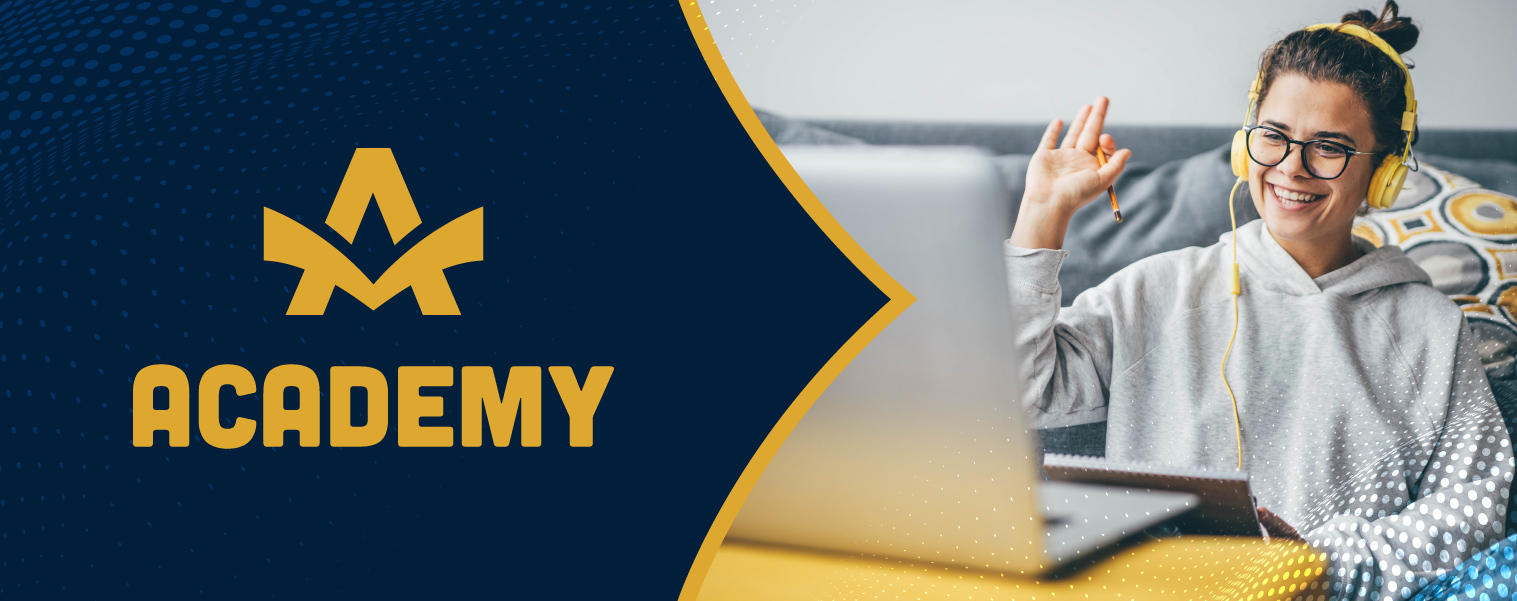
 
Start-up de la EdTech, nommée academy propose des contenus de formation en ligne pour un public de niveau lycée et université.

## <span style='background:#c29c31'>Table des Matieres</span>

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## <span style='background:#c29c31'>1. Introduction</span>


**Mission**
*****

L'entreprise souhaite effectuer un projet d’expansion à l’international. Pour cela, en tant que Data scientist, mon manager m'a confié une mission de réaliser une pré-analyse exploratoire à partir des données de la Banque mondiale afin de répondre aux interrogations suivantes :

- Quels sont les **pays avec un fort potentiel** de clients pour nos services ?
- Pour chacun de ces pays, comment **ce potentiel** pourrait évoluer ?



**Source**
*****

[Banque mondiale](https://datacatalog.worldbank.org/dataset/education-statistics)


**Axes d'orientations**
*****

Mon travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. La pré-analyse va consister à: 


- Valider la qualité, la quantité et la cohérence de ce jeu de données (comporte-t-il beaucoup de **données manquantes**, **dupliquées** , **...**?)
- Sélection des **indicateurs** les plus **pertinents** pour répondre à la problématique :
    - démographique : nous allons nous concentrer dans la tranche des **15-24 ans** 
    - éducatif : pour cette meme tranche voir les niveaux **lycée et universitaire**
    - économique : le niveau de vie de la population
    - numérique : nous allons nous concentrer principalement sur l'accés à **internet** et l'accés à **l'éléctricité**
- **Score** pour classer le potentiel des pays

- **Conclusions**


 


## <span style='background:#c29c31'>2. Bibliothèques d'analyse Python</span>

In [3]:
#Cet environnement Python 3 est livré avec de nombreuses bibliothèques d'analyse utiles installées
#Par exemple, voici plusieurs packages utiles à charger

import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, E/S de fichier CSV (par exemple pd.read_csv)
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore") #Ignorer les Warnings
    
import matplotlib.pyplot as plt #Visualisations graphiques des données
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline
#!pip3 install plotly #installer plotly
import plotly.express as px 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler # pour effectuer la normalisations min-max
from sklearn.compose import make_column_transformer # Applique des transformateurs aux colonnes d'un tableau
from sklearn.preprocessing import OneHotEncoder #pour le recodage des variables catégorielles 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
import matplotlib.patches as mpatches
import collections
import folium
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import pi

# Versions de quelques librairies 
print('Version de quelques librairies utilisées :')
print('Python        : ' + sys.version)
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Seaborn    : ' + sns.__version__)

import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le : ' + now)


Version de quelques librairies utilisées :
Python        : 3.11.3 (main, Apr  7 2023, 19:25:52) [Clang 14.0.0 (clang-1400.0.29.202)]
NumPy         : 1.24.3
Pandas        : 2.0.1
Seaborn    : 0.12.2
Lancé le : 2023-06-22T15:14:29.852752


## <span style='background:#c29c31'>3. Analyse des jeux de données</span>

### <span style='colour:#20185e'>3.1. Analyse du jeu de données EdStatsCountry.csv</span>

In [4]:
#importer les données 
#chargement du fichier
dfCountry = pd.read_csv('EdStatsCountry.csv' ,sep = ',')

In [5]:
#Afficher les 5 premieres lignes du dataset
dfCountry.head()

Country Code   Short Name   Table Name                     Long Name   
0          ABW        Aruba        Aruba                         Aruba  \
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit   
0           AW   Aruban florin  \
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes   
0  SNA data for 2000-2011 are updated from offici...  \
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...   
0  Latin America & Caribbean  High income: nonOECD        AW  ...  \
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard   
0                                       NaN  \
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census   
0                                               2010  \
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey   
0                                                NaN  \
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data   
0                                                NaN  \
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census   
0                         Yes                        NaN  \
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data   
0                    NaN            2012.0                          NaN  \
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [6]:
#afficher le nombre de colonnes et de lignes 
nbligne, nbcolonne = dfCountry.shape

print(f'Le dataset contient {nbligne} lignes et {nbcolonne} colonnes.')

Le dataset contient 241 lignes et 32 colonnes.


In [7]:
#liste des colonnes 
dfCountry.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [8]:
#Résumé des variables quantitatives
dfCountry.describe().T

count         mean       std     min   
National accounts reference year   32.0  2001.531250  5.248560  1987.0  \
Latest industrial data            107.0  2008.102804  2.616834  2000.0   
Latest trade data                 185.0  2010.994595  2.569675  1995.0   
Unnamed: 31                         0.0          NaN       NaN     NaN   

                                      25%     50%     75%     max  
National accounts reference year  1996.75  2002.0  2005.0  2012.0  
Latest industrial data            2007.50  2009.0  2010.0  2010.0  
Latest trade data                 2011.00  2012.0  2012.0  2012.0  
Unnamed: 31                           NaN     NaN     NaN     NaN

In [9]:
#Résumé des variables qualitatives(avec des chaînes de caractères)
dfCountry.describe(include='O').T

count unique   
Country Code                                        241    241  \
Short Name                                          241    241   
Table Name                                          241    241   
Long Name                                           241    241   
2-alpha code                                        238    238   
Currency Unit                                       215    152   
Special Notes                                       145    131   
Region                                              214      7   
Income Group                                        214      5   
WB-2 code                                           240    240   
National accounts base year                         205     43   
SNA price valuation                                 197      2   
Lending category                                    144      3   
Other groups                                         58      2   
System of National Accounts                         215      3   
Alternative conversion factor                        47     32   
PPP survey year                                     145      3   
Balance of Payments Manual in use                   181      1   
External debt Reporting status                      124      3   
System of trade                                     200      2   
Government Accounting concept                       161      2   
IMF data dissemination standard                     181      2   
Latest population census                            213     27   
Latest household survey                             141     60   
Source of most recent Income and expenditure data   160     75   
Vital registration complete                         111      2   
Latest agricultural census                          142     35   
Latest water withdrawal data                        179     20   

                                                                                                 top   
Country Code                                                                                     ABW  \
Short Name                                                                                     Aruba   
Table Name                                                                                     Aruba   
Long Name                                                                                      Aruba   
2-alpha code                                                                                      AW   
Currency Unit                                                                                   Euro   
Special Notes                                      April 2012 database update: Based on official ...   
Region                                                                         Europe & Central Asia   
Income Group                                                                     Upper middle income   
WB-2 code                                                                                         AW   
National accounts base year                                                                     2005   
SNA price valuation                                                Value added at basic prices (VAB)   
Lending category                                                                                IBRD   
Other groups                                                                                    HIPC   
System of National Accounts                        Country uses the 1993 System of National Accou...   
Alternative conversion factor                                                                1990–95   
PPP survey year                                                                                 2005   
Balance of Payments Manual in use                       IMF Balance of Payments Manual, 6th edition.   
External debt Reporting status                                                                Actual   
System of trade                                        

In [10]:
#Valeurs manquantes
dfCountry.isna().mean()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

<Axes: >

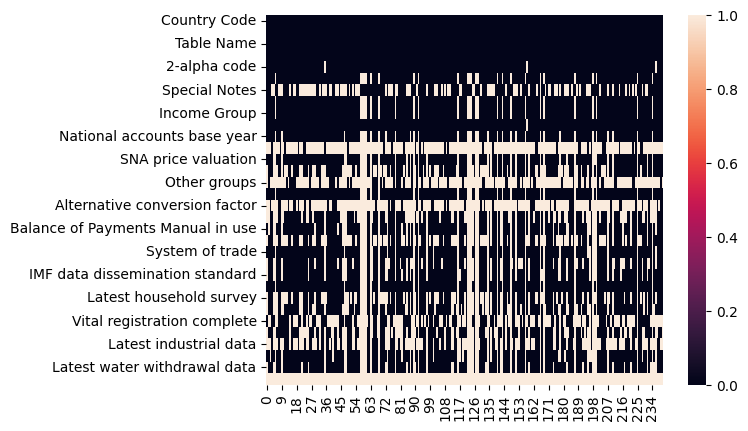

In [11]:
#répartition des valeurs manquantes
sns.heatmap(dfCountry.isna().T)

**Remarque** : A vue d'oeil la colonne **Unnamed: 31** n'a pas été renseigné. On pourra le supprimer si toutes fois nous utilisons ce jeux de données 

In [12]:
# Vérifions les Doublons pour les codes pays 
doublons = dfCountry[dfCountry.duplicated(['Country Code'], keep=False)]
nb_doublons_code_pays = doublons.shape[0]
print(f'Nombre de doublons sur le code pays : {nb_doublons_code_pays}')

Nombre de doublons sur le code pays : 0


In [13]:
#verifions les nan pour les regions 
vmRégions = dfCountry['Region'].isna().sum()
print(f'Nombre de Régions non-renseigné : {vmRégions}')


Nombre de Régions non-renseigné : 27


**Remarque** : Pour la colonne région , nous avons **27** lignes qui n'ont pas été renseignés. Pour la suite je vais remplacer ces régions non-renseignés par **Autres** au lieu de les supprimer avant de chercher la cause. 

In [14]:
# Remplacer la région 'NaN' par 'Autres'
dfCountry.loc[dfCountry['Region'].isnull(),'Region'] = 'Autres'
#La liste pour les régions
print('Régions :\n',dfCountry['Region'].unique())


Régions :
 ['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Autres' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


In [15]:
#Afficher les lignes dont les Régions n'ont pas été renseignées
dfCountry.loc[dfCountry['Region'] == 'Autres'] 

Country Code                                      Short Name   
5            ARB                                      Arab World  \
57           EAP           East Asia & Pacific (developing only)   
58           EAS         East Asia & Pacific (all income levels)   
59           ECA         Europe & Central Asia (developing only)   
60           ECS       Europe & Central Asia (all income levels)   
63           EMU                                       Euro area   
68           EUU                                  European Union   
78           GIB                                       Gibraltar   
89           HIC                                     High income   
92           HPC          Heavily indebted poor countries (HIPC)   
116          LAC     Latin America & Caribbean (developing only)   
122          LCN   Latin America & Caribbean (all income levels)   
123          LDC    Least developed countries: UN classification   
124          LIC                                      Low income   
127          LMC                             Lower middle income   
128          LMY                             Low & middle income   
140          MEA  Middle East & North Africa (all income levels)   
143          MIC                                   Middle income   
148          MNA    Middle East & North Africa (developing only)   
157          NAC                                   North America   
166          NRU                                           Nauru   
168          OED                                    OECD members   
187          SAS                                      South Asia   
198          SSA            Sub-Saharan Africa (developing only)   
200          SSF          Sub-Saharan Africa (all income levels)   
225          UMC                             Upper middle income   
234          WLD                                           World   

                                         Table Name   
5                                        Arab World  \
57                              East Asia & Pacific   
58          East Asia & Pacific (all income levels)   
59                            Europe & Central Asia   
60        Europe & Central Asia (all income levels)   
63                                        Euro area   
68                                   European Union   
78                                        Gibraltar   
89                                      High income   
92           Heavily indebted poor countries (HIPC)   
116                       Latin America & Caribbean   
122   Latin America & Caribbean (all income levels)   
123    Least developed countries: UN classification   
124                                      Low income   
127                             Lower middle income   
128                             Low & middle income   
140  Middle East & North Africa (all income levels)   
143                                   Middle income   
148                      Middle East & North Africa   
157                                   North America   
166                                           Nauru   
168                                    OECD members   
187                                      South Asia   
198                              Sub-Saharan Africa   
200          Sub-Saharan Africa (all income levels)   
225                             Upper middle income   
234                                           World   

                                          Long Name 2-alpha code   
5                                        Arab World           1A  \
57            East Asia & Pacific (developing only)           4E   
58          East Asia & Pacific (all income levels)           Z4   
59          Europe & Central Asia (developing only)           7E   
60        Europe & Central Asia (all income levels)           Z7   
63                                        Euro area           XC   
68                                   European Union           EU   
78            

**Remarque** : Il y'a des groupes de revenus renseignés  et des groupes de codes pays. A nettoyer au cas ou on utilise ce jeux de données.

In [16]:
#Le nombre de code pays pour chaque région
print('Country Code pour chaque ',dfCountry.groupby('Region')['Country Code'].count())
print(dfCountry.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False))

Country Code pour chaque  Region
Autres                        27
East Asia & Pacific           36
Europe & Central Asia         57
Latin America & Caribbean     41
Middle East & North Africa    21
North America                  3
South Asia                     8
Sub-Saharan Africa            48
Name: Country Code, dtype: int64
                       Region  Short Name
2       Europe & Central Asia          57
7          Sub-Saharan Africa          48
3   Latin America & Caribbean          41
1         East Asia & Pacific          36
0                      Autres          27
4  Middle East & North Africa          21
6                  South Asia           8
5               North America           3


In [19]:
#La liste pour les groupes de revenus 
print('Régions :\n',dfCountry['Income Group'].unique())

Régions :
 ['High income: nonOECD' 'Low income' 'Upper middle income' nan
 'Lower middle income' 'High income: OECD']


In [20]:
#groupement des revenus par region 
dfCountry.groupby('Income Group')['Region'].count()

Income Group
High income: OECD       31
High income: nonOECD    44
Low income              34
Lower middle income     50
Upper middle income     55
Name: Region, dtype: int64

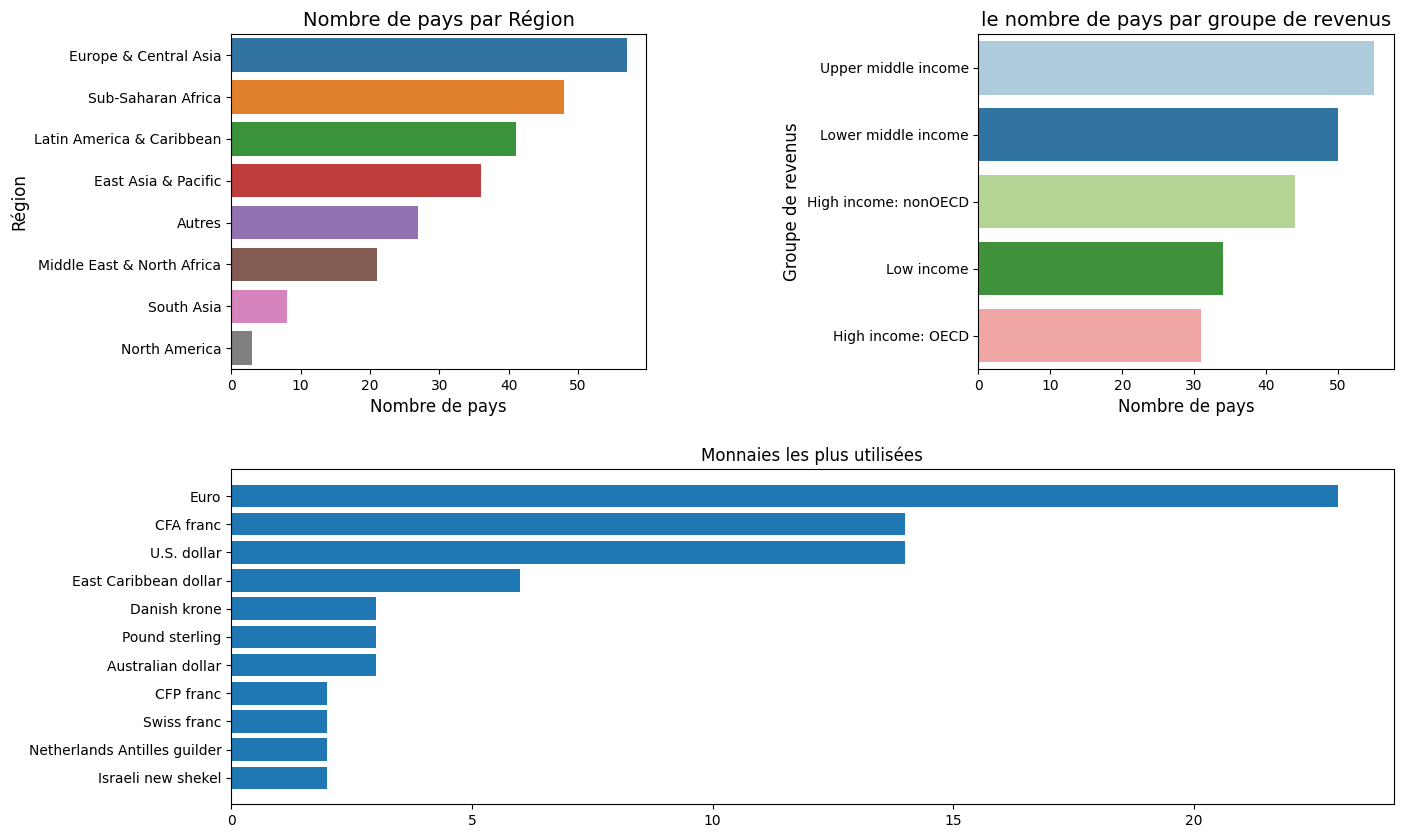

In [21]:
# Regroupement des pays/régions/groupes de revenus/monnaies

fig=plt.figure(figsize=(15,10))
grid = plt.GridSpec(2, 2, wspace=0.8, hspace=0.3)

# figure ligne 1, colonne 1 ------------------
plt.subplot(grid[0, 0])
# Regroupement des pays par régions
nb_pays_par_region=dfCountry.groupby('Region')[['Country Code']].count().reset_index().sort_values(by='Country Code', ascending=False)
sns.barplot(x=nb_pays_par_region['Country Code'].sort_values(), y=nb_pays_par_region['Region'], palette=sns.color_palette("tab10"))
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Région', fontsize=12)
plt.title('Nombre de pays par Région', fontsize=14)

# figure ligne 1, colonne 2 ------------------
plt.subplot(grid[0, 1])
# Regroupement des revenus par régions
revenus_region = dfCountry.groupby('Income Group')[['Region']].count().reset_index().sort_values(by='Region',ascending=False)
sns.barplot(x = revenus_region['Region'].sort_values(),y= revenus_region['Income Group'],palette =sns.color_palette("Paired") )
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenus', fontsize=12)
plt.title('le nombre de pays par groupe de revenus', fontsize=14)

# figure ligne 2  ------------------
plt.subplot(grid[1, :])
plt.barh(y = dfCountry.groupby('Currency Unit')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Currency Unit'].tail(11), width = dfCountry.groupby('Currency Unit')[['Short Name']].count()['Short Name'].sort_values().tail(11))
plt.title('Monnaies les plus utilisées')
plt.show() # Affiche le graphique


**Représentation des régions du monde avec les pays du dataset**

In [22]:
#Importation du dataset des pays du monde de geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 

# Dataset geopandas : code ISO-3166 alpha 3 et Nom court
df1=world.sort_values(by = ['iso_a3'])
df1=df1.loc[:,['iso_a3','name']]
df1=df1.rename(columns={'iso_a3':'ISO'})
df1=df1.set_index('ISO')

#  Dataset EdStatsCountry.csv : code ISO-3166 alpha 3 et Nom court
df2=dfCountry.sort_values(by = ['Country Code'])
df2=df2.loc[:,['Country Code','Short Name']]
df2=df2.rename(columns={'Country Code':'ISO'})
df2=df2.set_index('ISO')

# Fusion des 2 dataframes
df_comp_nom_pays= pd.merge(df1, df2, on='ISO', how='left')
df_comp_nom_pays.reset_index(inplace=True)

# Recherche des noms de pays différents entre geopandas et notre jeu de données
rows = df_comp_nom_pays[df_comp_nom_pays['name'] != df_comp_nom_pays['Short Name']]
rows.drop([0,7,8,39,50,56,144,163],inplace = True)

df_comp=rows[rows['Short Name'].notnull()].sort_values(by='ISO')
noms_a_changer=df_comp['Short Name'].tolist()
codes_iso=df_comp['ISO'].tolist()


# Récupération des index geopandas des noms de pays à changer
index_geo=world[world['iso_a3'].isin(codes_iso)].index
# Récupération des codes ISO 3 de geopandas
codes_isoa3=world.loc[index_geo,'iso_a3'].tolist()
# Parcours les codes ISO 3 pour avoir une liste de noms de pays dans l'ordre des index geopandas
noms_a_changer=[]
[noms_a_changer.append(df_comp[df_comp['ISO'] == iso]['Short Name'].tolist()[0]) for iso in codes_isoa3]
# Changement du libellé des noms courts des pays de geopandas par ceux de notre jeux de données
world.loc[world.index[index_geo.tolist()],'name']=noms_a_changer

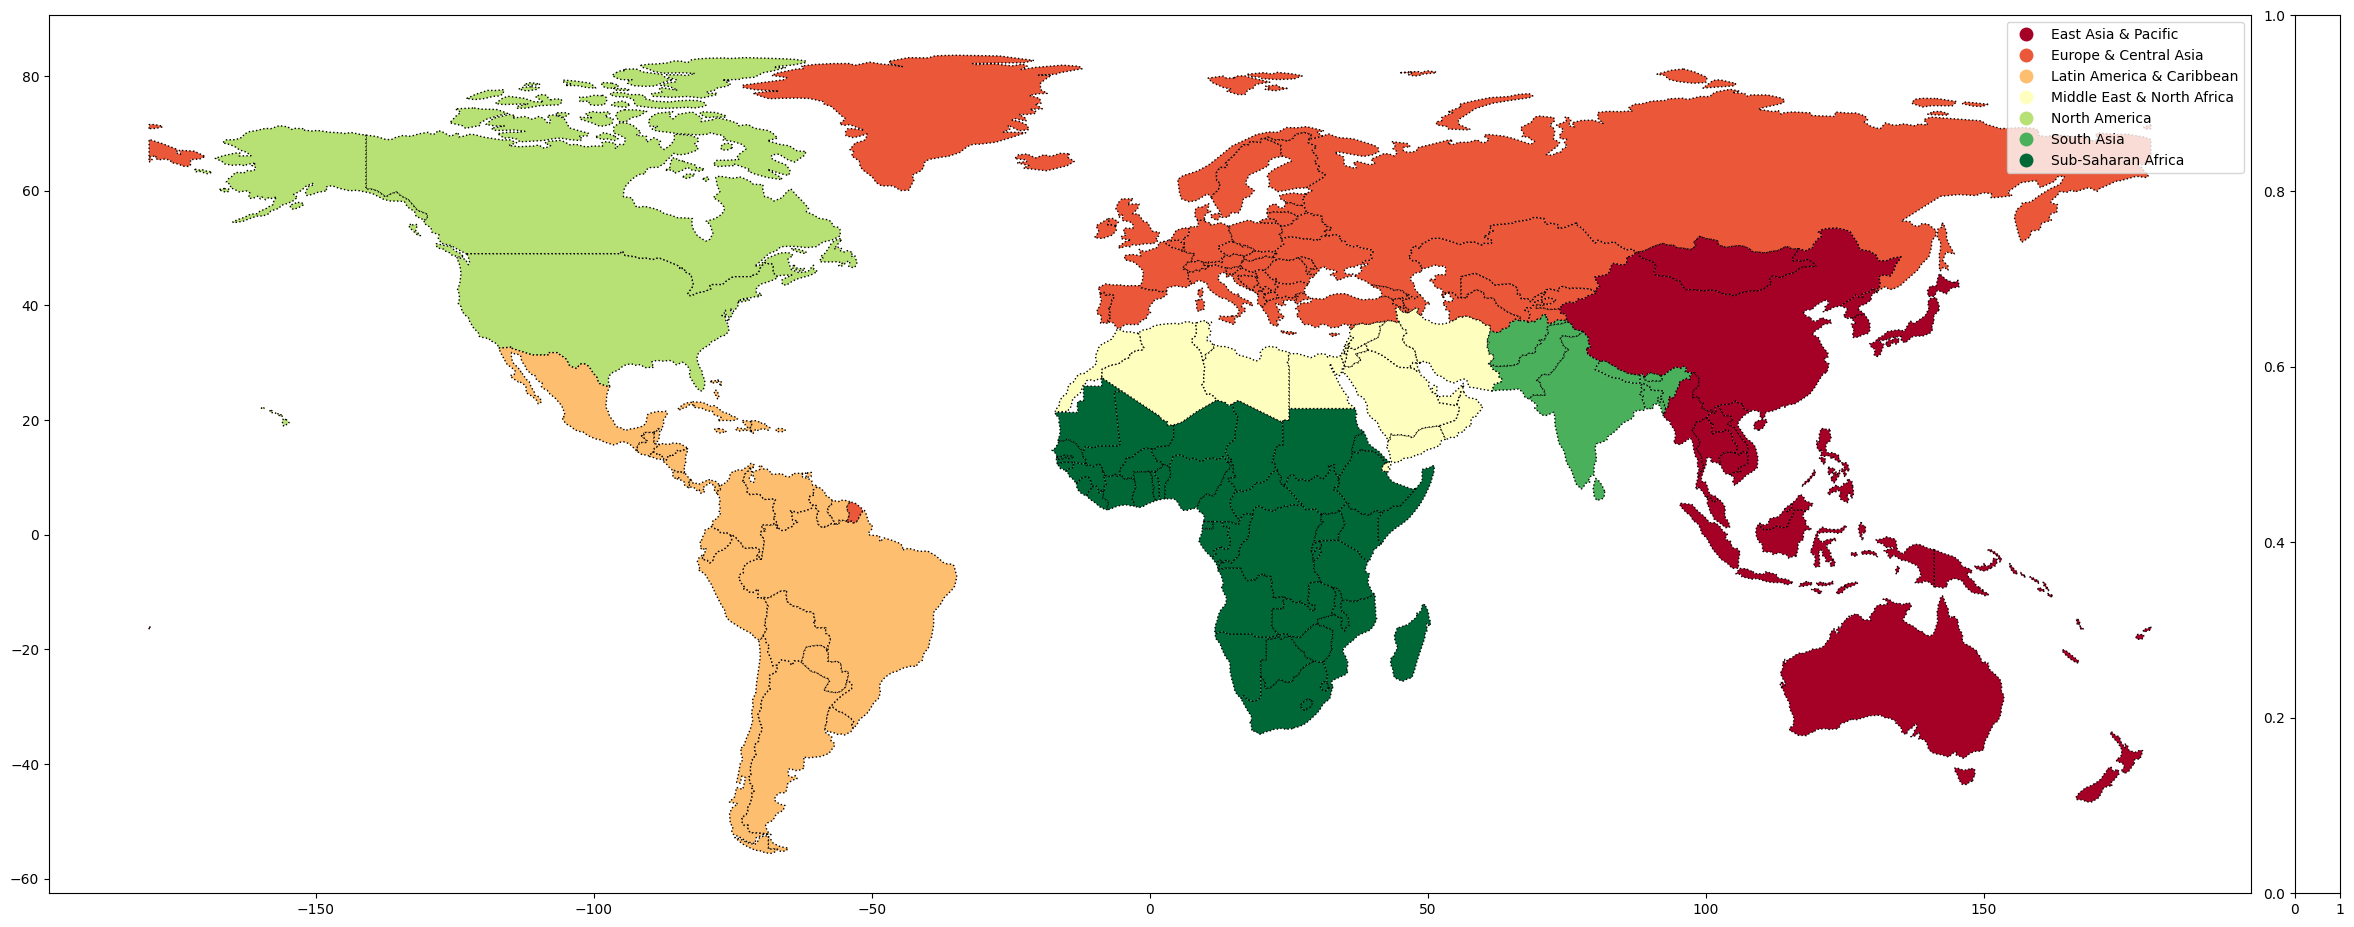

In [23]:
df_geo_region = world.merge(dfCountry, left_on = 'name', right_on = 'Short Name')[['geometry','Short Name','Region']]

fig, ax = plt.subplots()
fig.set_size_inches(30,18)

ax.set_facecolor('xkcd:white')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
df_geo_region.plot(column=df_geo_region['Region'], legend = True, ax=ax, cax=cax, cmap='RdYlGn',linestyle=":",edgecolor='black' )
plt.show()

**Représentation des groupes de revenus**

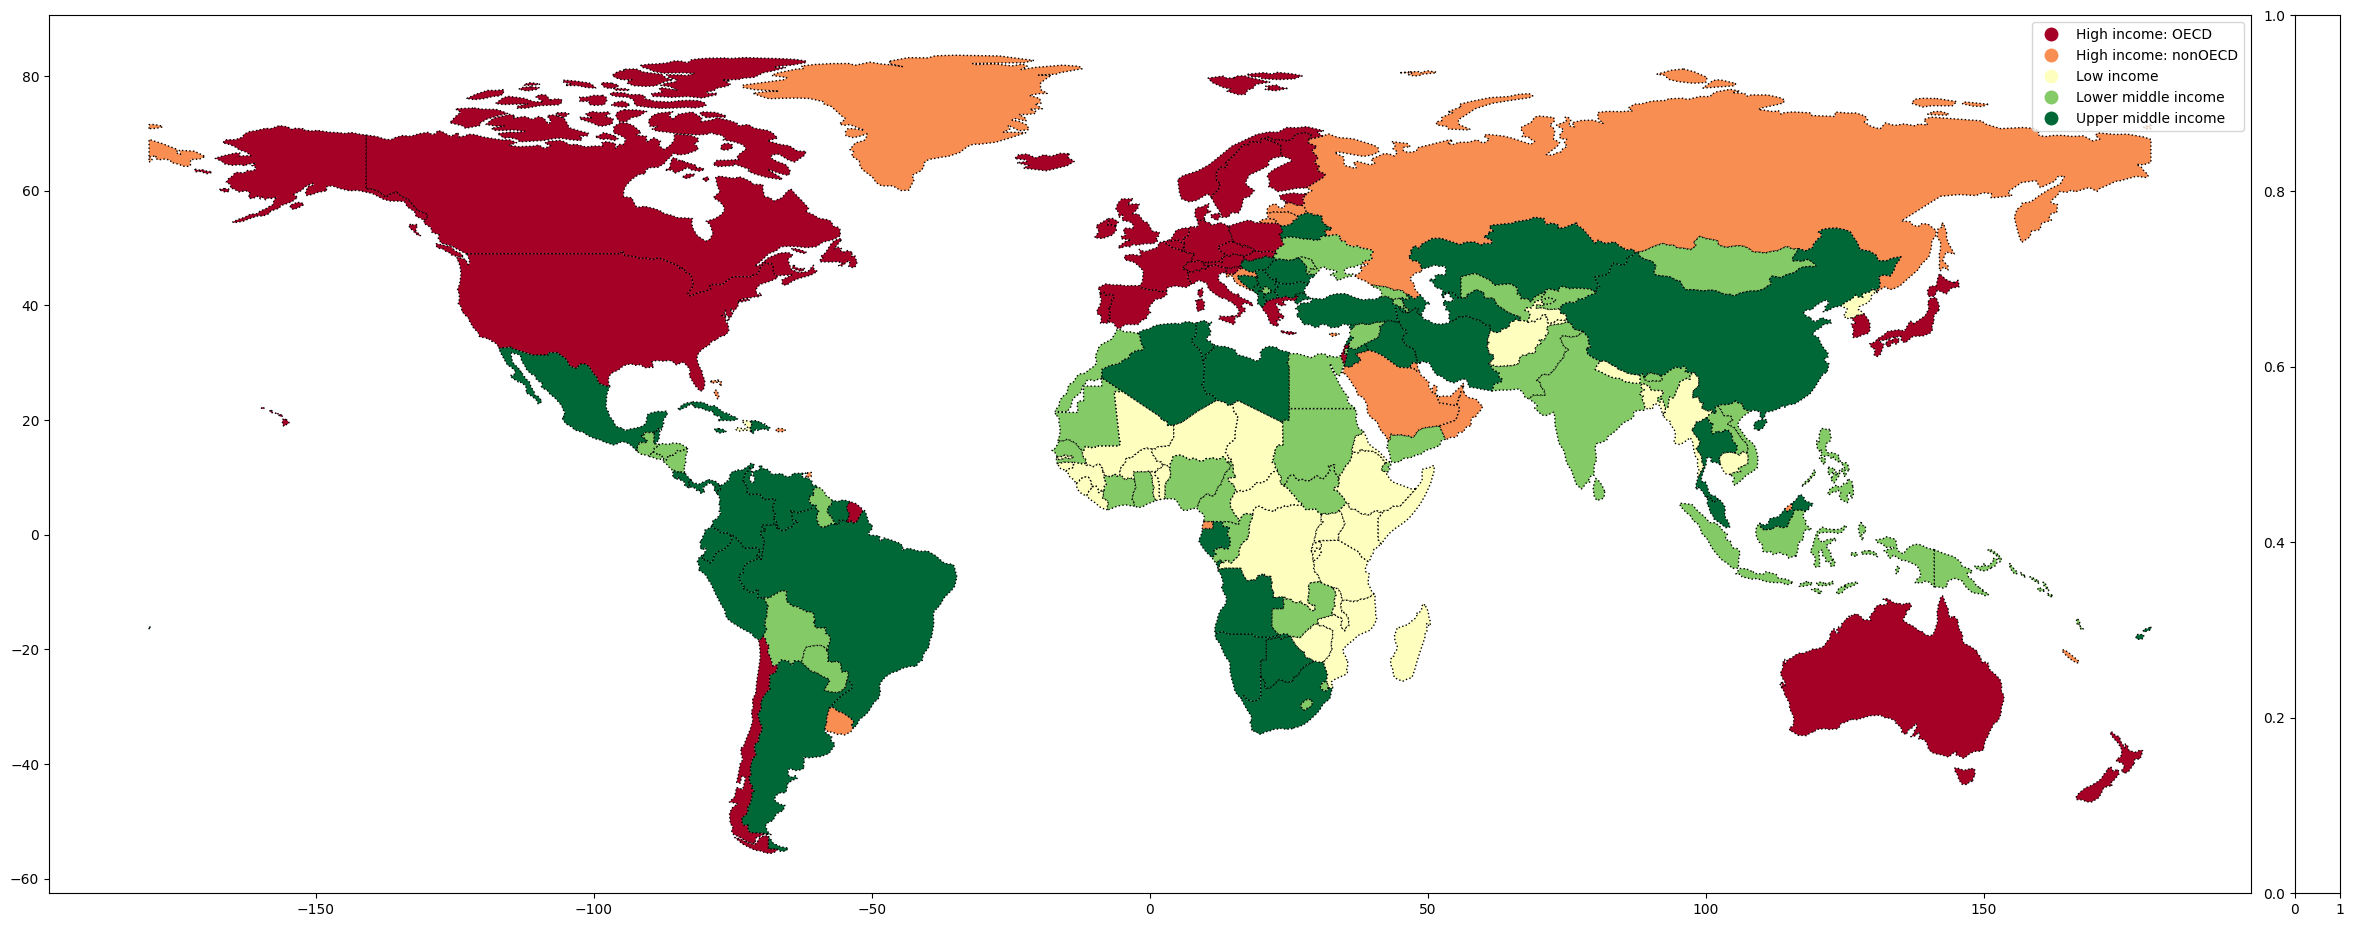

In [24]:
df_geo_revenu = world.merge(dfCountry, left_on = 'name', right_on = 'Short Name')[['geometry','Short Name','Income Group']]

fig, ax = plt.subplots()
fig.set_size_inches(30,18)

ax.set_facecolor('xkcd:white')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
df_geo_revenu.plot(column=df_geo_revenu['Income Group'], legend = True, ax=ax, cax=cax, cmap='RdYlGn',linestyle=":",edgecolor='black' )
plt.show()

**Remarque** : les groupes de revenus **'High Income: OECD'** et le **'High Income: nonOECD'** sont principalements concentrés dans les régions **'North America'**, la partie sud-est **'East Asia Pacific'** et une partie de **'Europe & Central Asia'**

Ce jeux de données **EdStatsCountry.csv** contient des informations globales sur l'économie de chaque pays du monde ainsi qu'un classement par région de chaque pays. D'autres informations concernent aussi des groupes de pays par région ou niveau de revenu. 

******
- **241 lignes et 32 colonnes**.
- **pas de doublons**. 
- Il y'a des **valeurs manquantes**.
- Toutes les regions du monde sont représentées
*****

**Note** : 
On va se concentrer sur les 3 variables pour le dataframe final du dataset **EdStatsCountry.csv** : 
- **Country Code** : Tous les Codes pays 
- **Region** : Les régions du monde
- **Income Group** : les groupes de revenus 

In [25]:
## Dataframe final pour dfCountry 
df_country_final = pd.DataFrame({'Country Code' : dfCountry['Country Code'].unique(),
                                 'Region' : dfCountry['Region'], 
                                 'Income Group' : dfCountry['Income Group']})

### <span style='colour:#20185e'>3.2. Analyse du jeu de données EdStatsData.csv</span>

In [26]:
#importer les données 
#chargement du fichier
dfData = pd.read_csv('EdStatsData.csv', sep = ',')

In [27]:
#Les 5 premieres lignes 
dfData.head()

Country Name Country Code   
0   Arab World          ARB  \
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code   
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2  \
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060   
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN  \
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [28]:
#Afficher le nombre de colonnes et de lignes 
nbligne, nbcolonne = dfData.shape
print(f'Le dataset contient {nbligne} lignes et {nbcolonne} colonnes.')

Le dataset contient 886930 lignes et 70 colonnes.


In [29]:
#Afficher les colonnes du dataset
dfData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [30]:
#Résumé des variables quantitatives
dfData.describe().T

count          mean           std       min       25%   
1970         72288.0  1.974772e+09  1.211687e+11 -1.435564  0.890000  \
1971         35537.0  4.253638e+09  1.804814e+11 -1.594625  8.853210   
1972         35619.0  4.592365e+09  1.914083e+11 -3.056522  9.240920   
1973         35545.0  5.105006e+09  2.059170e+11 -4.032582  9.595200   
1974         35730.0  5.401493e+09  2.112150e+11 -4.213563  9.861595   
...              ...           ...           ...       ...       ...   
2085         51436.0  7.176899e+02  2.496587e+04 -0.780000  0.010000   
2090         51436.0  7.113072e+02  2.530183e+04 -0.650000  0.010000   
2095         51436.0  7.034274e+02  2.556069e+04 -0.550000  0.010000   
2100         51436.0  6.940296e+02  2.574189e+04 -0.450000  0.010000   
Unnamed: 69      0.0           NaN           NaN       NaN       NaN   

                   50%         75%           max  
1970          6.317724     62.5125  1.903929e+13  
1971         63.162399  56552.0000  1.986457e+13  
1972         66.551392  58636.5000  2.100916e+13  
1973         69.695953  62029.0000  2.238367e+13  
1974         70.877602  63836.7500  2.282991e+13  
...                ...         ...           ...  
2085          0.230000      6.0800  3.337871e+06  
2090          0.230000      5.4625  3.354746e+06  
2095          0.230000      4.6800  3.351887e+06  
2100          0.220000      4.0325  3.330484e+06  
Unnamed: 69        NaN         NaN           NaN  

[66 rows x 8 columns]

In [31]:
#Résumé des valeurs quanlitatives 
dfData.describe(include = 'O').T

count unique   
Country Name    886930    242  \
Country Code    886930    242   
Indicator Name  886930   3665   
Indicator Code  886930   3665   

                                                              top  freq  
Country Name                                           Arab World  3665  
Country Code                                                  ARB  3665  
Indicator Name  Adjusted net enrolment rate, lower secondary, ...   242  
Indicator Code                                         UIS.NERA.2   242

In [32]:
pd.set_option('display.max_columns', None ) #pour afficher toutes les colonnes
pd.set_option('display.max_rows', None ) #pour afficher toutes les lignes
dfData.isna().mean(axis=0)*100 #Pour afficher le % de valeurs manquantes pour chaque variables


Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
1971               95.993258
1972               95.984012
1973               95.992356
1974               95.971497
1975               90.156382
1976               95.773849
1977               95.763589
1978               95.763364
1979               95.849842
1980               89.951631
1981               95.627953
1982               95.770692
1983               95.663694
1984               95.647233
1985               89.819264
1986               95.560867
1987               95.643286
1988               95.653321
1989               95.767422
1990               85.973527
1991               91.607342
1992               91.482642
1993               91.454455
1994               91.266278
1995               85.189248
1996               91.340128
1997               91.718287
1998               90.426076
1999               86.601085
2000          

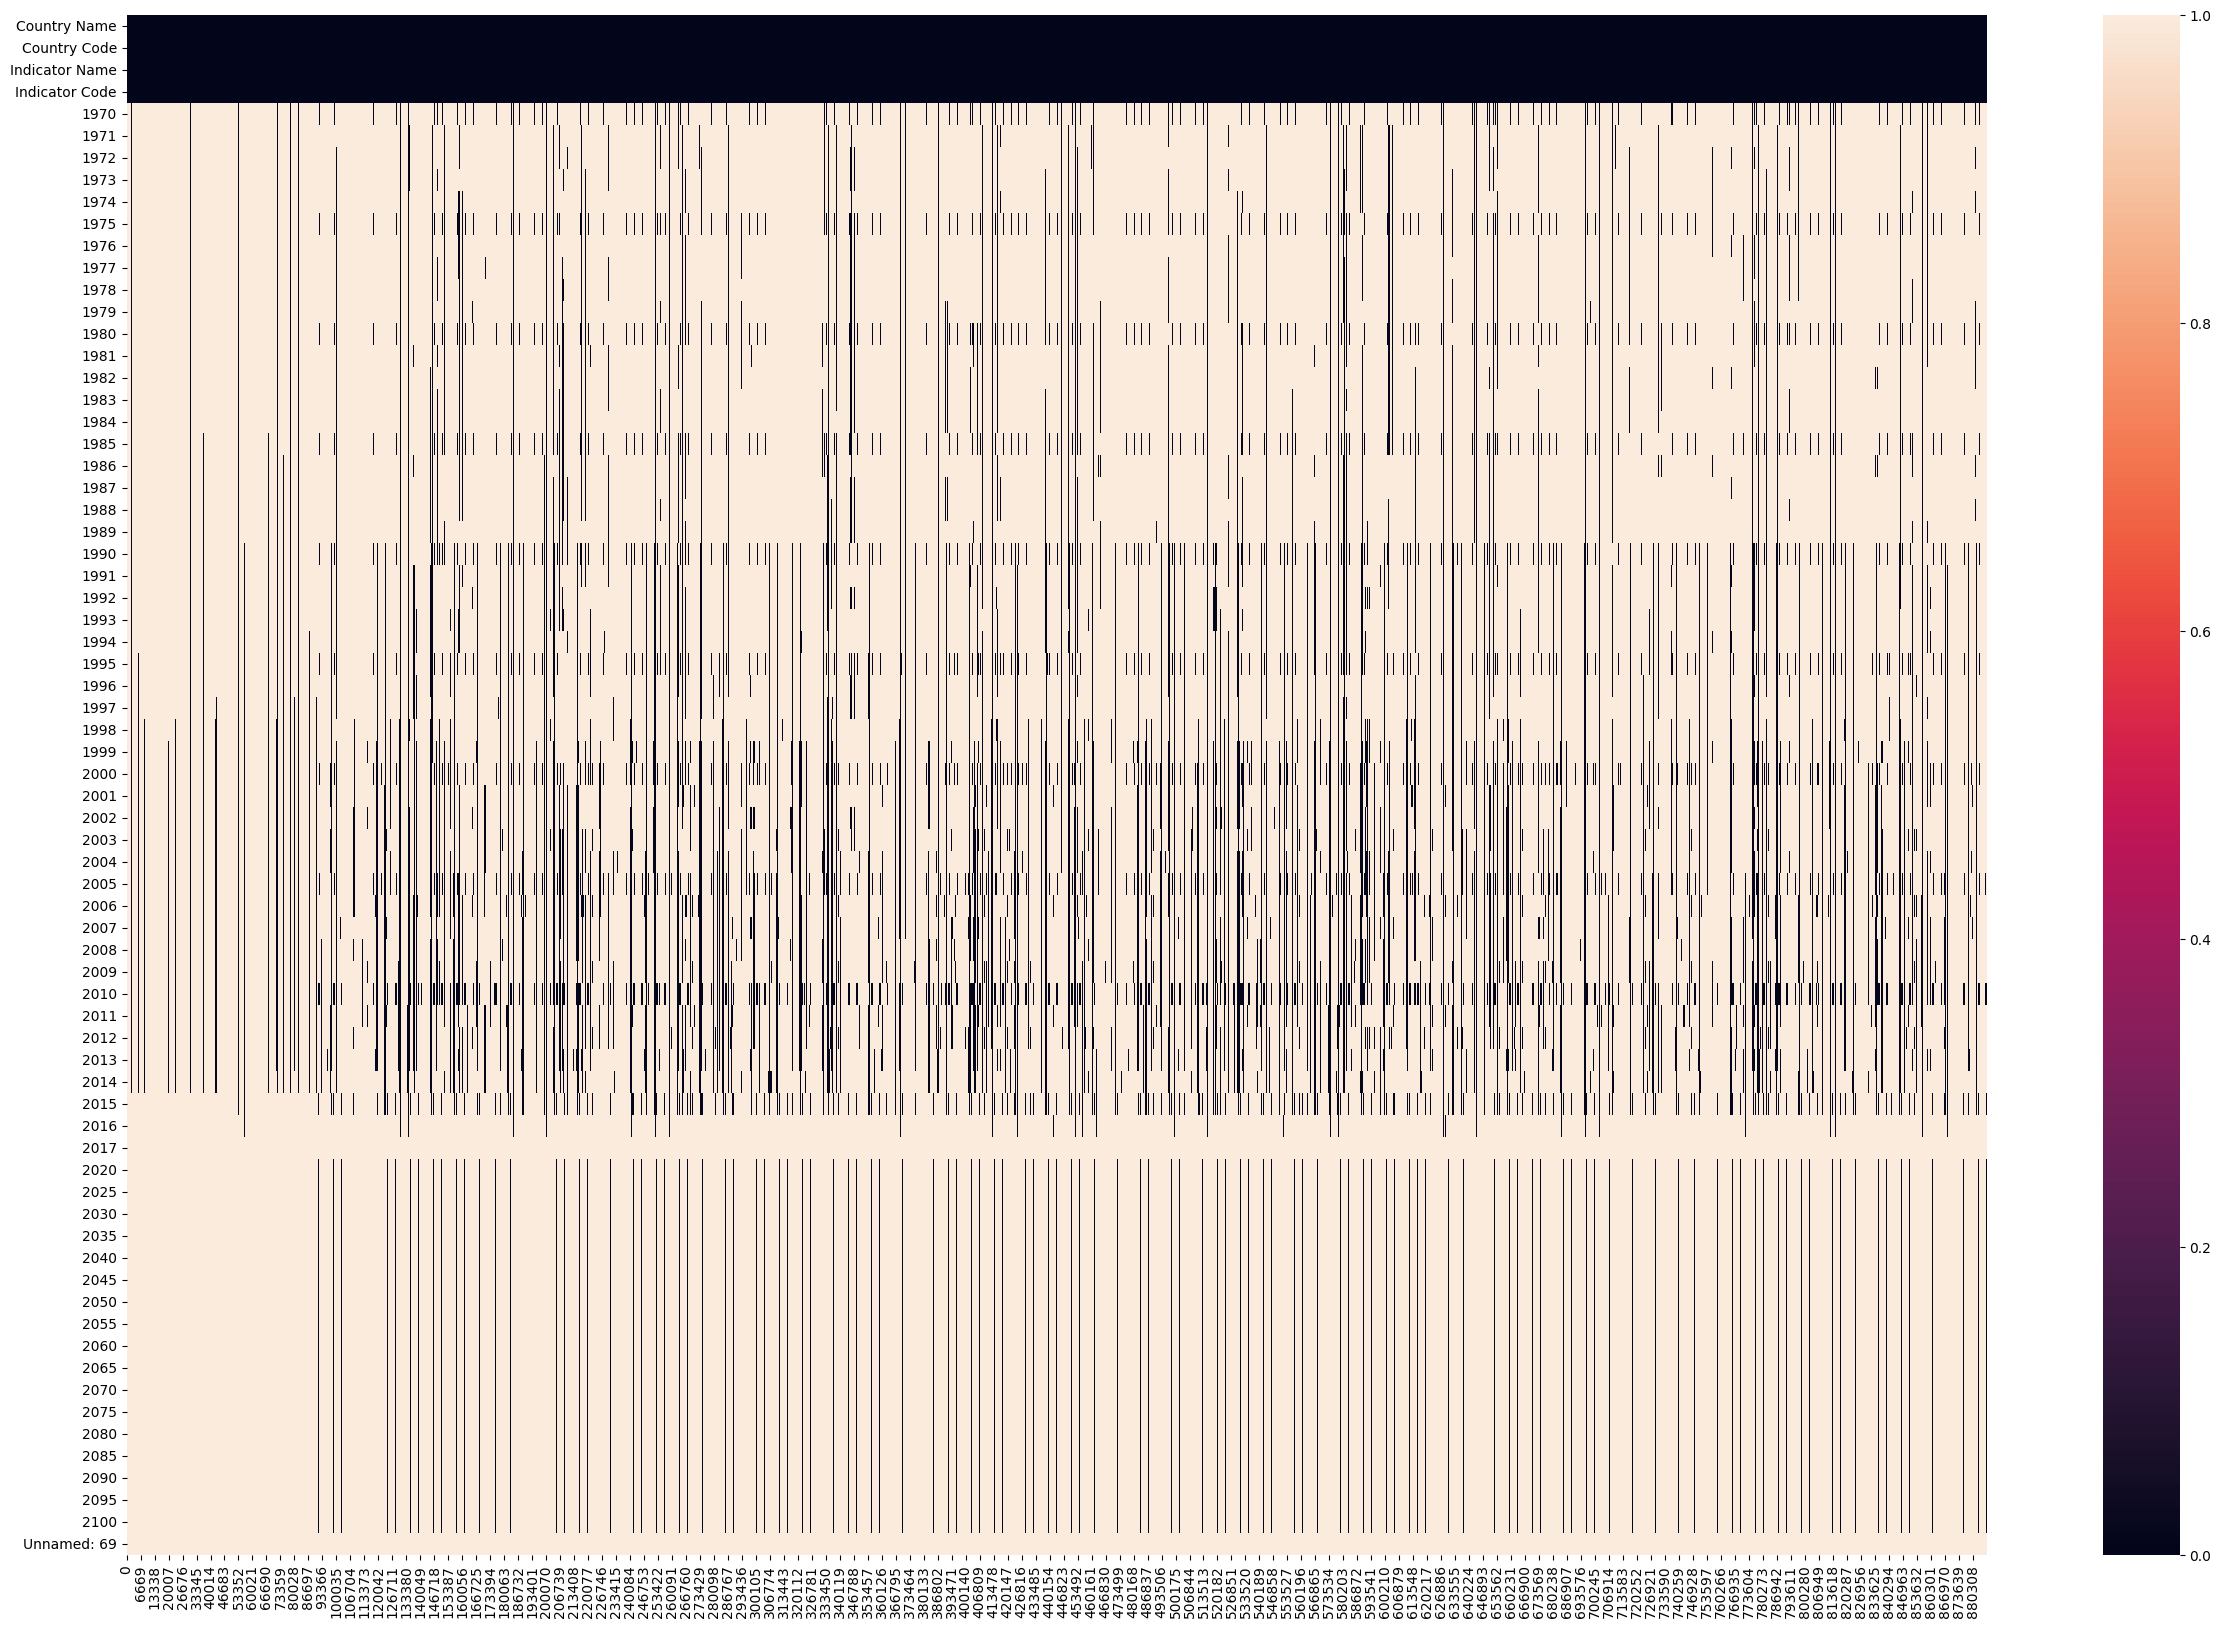

In [33]:
#répartition des valeurs manquantes
plt.figure(figsize=(30, 20))
pd.set_option('display.max_columns', None ) #pour afficher toutes les colonnes
pd.set_option('display.max_rows', None ) #pour afficher toutes les lignes
sns.heatmap(dfData.isna().T)
plt.show()

A vue d'oeil il y'a beaucoup de données manquantes sur les années. Mais sur une plage, il y'a des données exploitables par exemple de 2005-2015

In [34]:
#Doublons avec toutes les colonnes du dataframe
dfData[dfData.duplicated(keep= False)].shape[0]

0

In [35]:
# Vérifions les Doublons pour les codes pays et les indicateurs
doublons = dfData[dfData.duplicated(['Country Code','Indicator Code'], keep=False)]
nb_doublons_code_pays = doublons.shape[0]
print(f'Nombre de doublons sur le code pays et les indicateurs : {nb_doublons_code_pays}')

Nombre de doublons sur le code pays et les indicateurs : 0


In [36]:
#Les Codes Régions uniques
uCRegion = dfData['Country Code'].unique()
print(f'Nombre de codes pays renseigné : {len(uCRegion)}')

Nombre de codes pays renseigné : 242


Il y'a un code pays de plus qui a été renseigné dans ce dataset 

In [37]:
# Recherche du pays présent dansEdStatsData.csv mais pas dans EdStatsCountry.csv
df_plus=dfData[~dfData['Country Code'].isin(df_country_final['Country Code'])][['Country Name']]
df_plus.drop_duplicates(inplace=True)
df_plus

Country Name
190580  British Virgin Islands

Il y'a le pays **British Virgin Islands** qui n'a pas été rensigné dans  EdStatsCountry-Series.csv. A ajouter au cas ou dans le dataset final pour un jeux de données plus représentatif 

In [38]:
#Les Indicateurs uniques
uInd = dfData['Indicator Code'].unique()
print(f'Nombre dindicateurs renseigné : {len(uInd)}')

Nombre dindicateurs renseigné : 3665


In [39]:
#Liste des indicateurs avec plus d'occurences
liste_mots_indicateurs = [i.split(' ', 1)[0] for i in dfData['Indicator Name'].tolist()]
mots_indicateurs_populaires = collections.Counter(liste_mots_indicateurs).most_common(30)

In [40]:
mots_indicateurs_populaires
mots_indicateurs_populaires.reverse()

In [41]:
df_mots_indicateurs_populaires = pd.DataFrame(mots_indicateurs_populaires, columns = ['Mot', 'Nombre d\'occurences']).sort_values(by='Nombre d\'occurences', ascending=False)


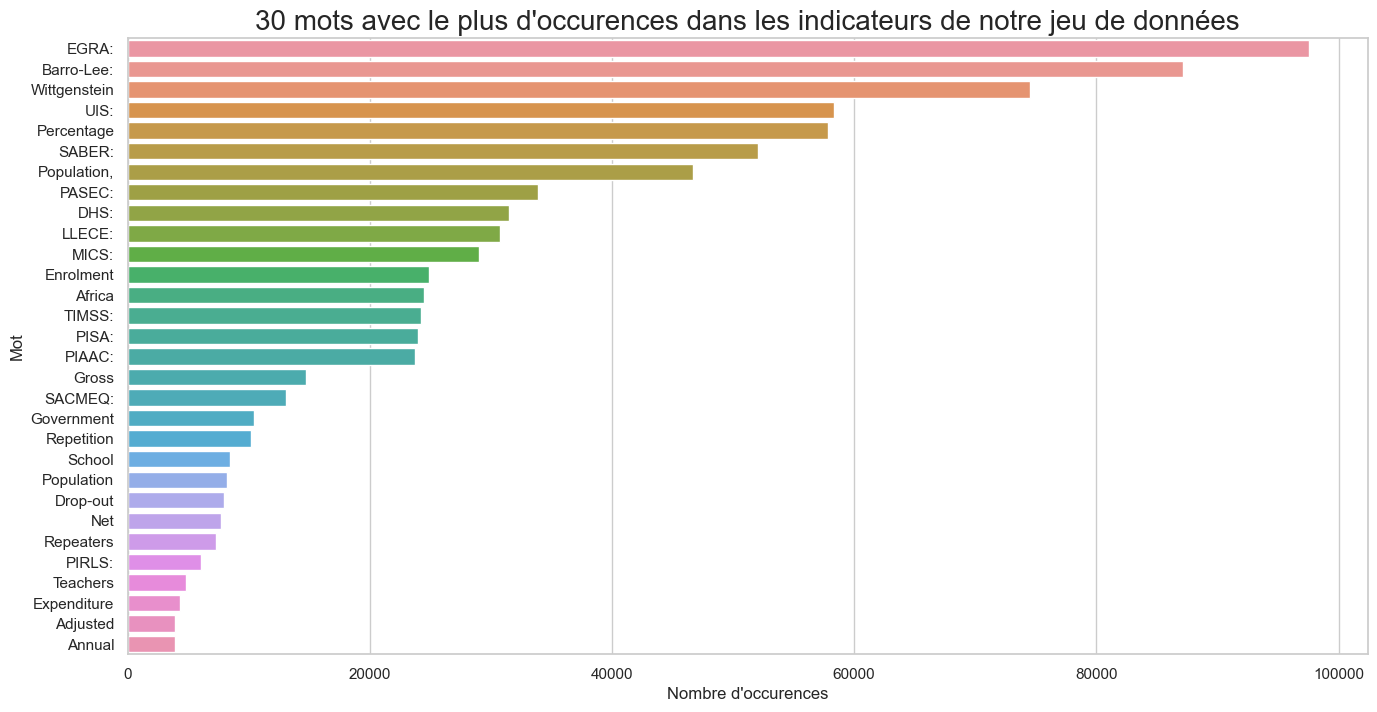

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.barplot(y = 'Mot', x='Nombre d\'occurences', data = df_mots_indicateurs_populaires)
plt.title('30 mots avec le plus d\'occurences dans les indicateurs de notre jeu de données', size=20)
plt.show()

La recherche des mots les plus populaires dans les noms des indicateurs confirme bien que le jeu de données contient des données relatives à l'éducation. Pour les mots avec le plus d'occurence, par exemple :

- EGRA : Early Grade Reading Assessment
- Barro-lee : Dataset relatif à l'éducation
- Wittgenstein : Wittgenstein Centre Human Capital Data Explore
- UIS : UNESCO Institut de Statistiques
- PISA : Tests comparatifs de compétences pour les élèves
- Teachers
- School
*******
**EdStatsData.csv** donne l'évolution de plusieurs indicateurs pour tous les pays et zones géographiques du monde.

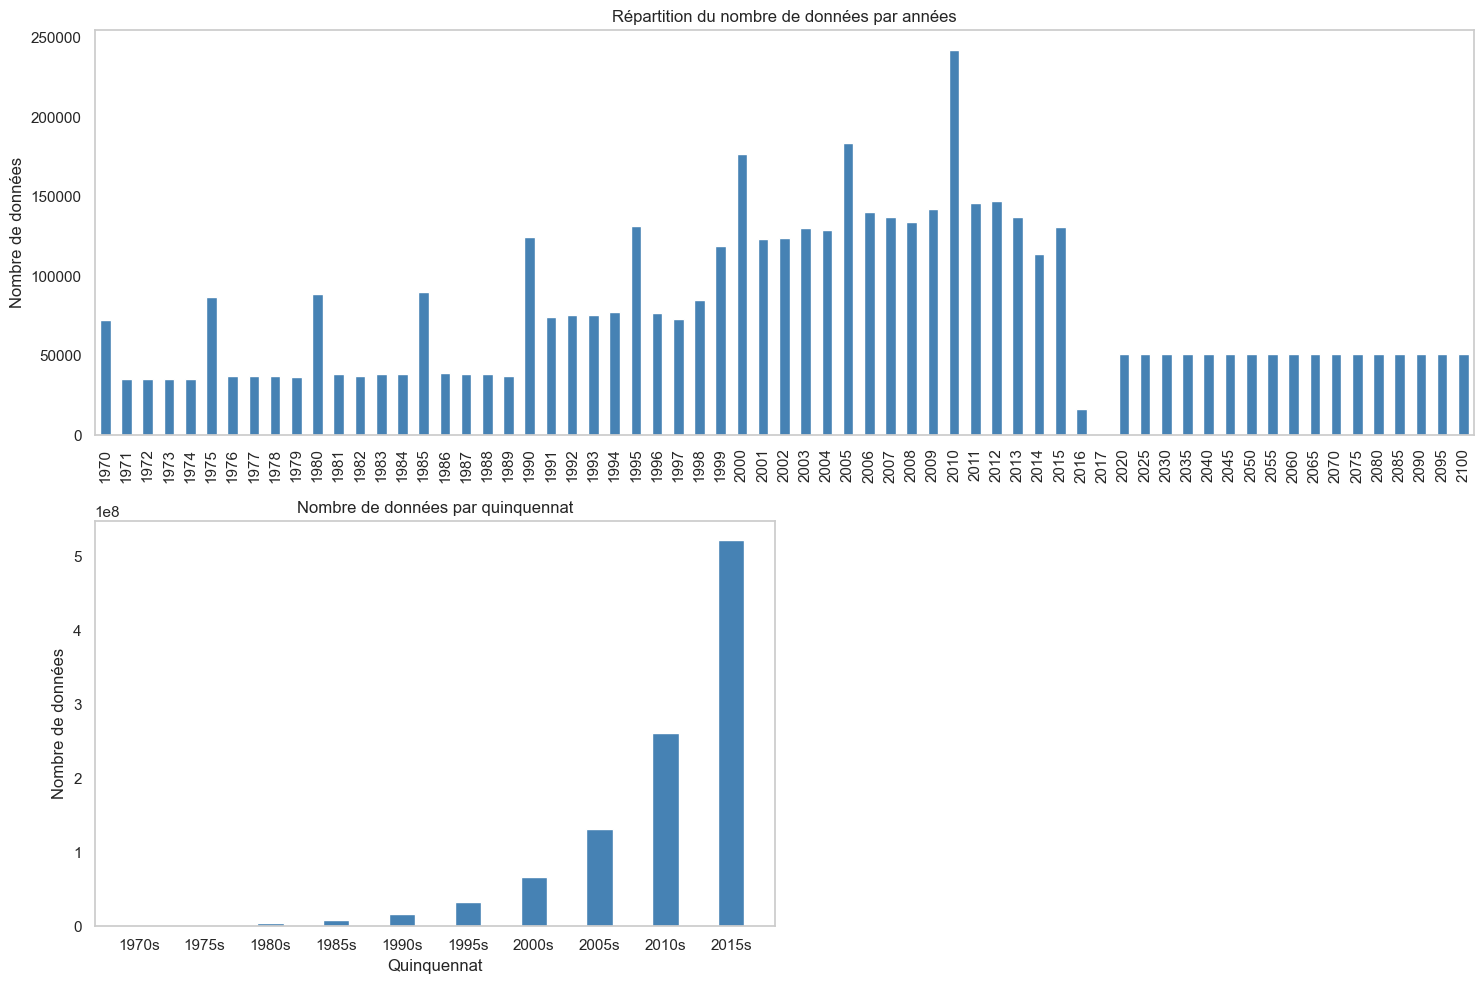

In [44]:
plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 2)

#ligne 1
ax1 = plt.subplot(G[0, :])
# Répartition du nombre de données renseignées par années pour tous les indicateurs et tous les pays
present = dfData.loc[:,'1970':'2100'].notnull().sum()
ax1 = present.plot(kind='bar', color='SteelBlue')
ax1.set_title('Répartition du nombre de données par années')
ax1.set_ylabel('Nombre de données')
ax1.grid(False)

# ligne 2
ax2 = plt.subplot(G[1, 0])
# Regroupement du nombre de données par quinquennat, les années 70, 75...
cinq_ans=dfData.loc[:,'1970':'2020'].copy().count()
ans=['1970s','1975s','1980s','1985s','1990s','1995s','2000s','2005s','2010s','2015s']
for i in range(10):
    j=i*5
    k=j*5
    cinq_ans[ans[i]]=cinq_ans[j:k,].sum()
# Affihage de la répartitions des données exploitables par quinquennat
width = 0.4   
ax2.bar(cinq_ans[ans].index, cinq_ans[ans].values, width, color='SteelBlue')
# ax2 = sns.barplot(y = decade[ans].values, x = decade[ans].index, color='SteelBlue')
ax2.set_xlabel('Quinquennat')
ax2.set_ylabel('Nombre de données')
ax2.set_title('Nombre de données par quinquennat', size=12)
ax2.grid(False)

plt.tight_layout()
plt.show()

**Remarque** : On observe un pic de données à chaque quinquenat. Il y'a plus de représentativité de données renseignées entre 2005-2015 sur les indicateurs de chaque Région.

In [45]:
#La plage d'année retenue
annee_retenue=dfData.columns[39:-20].tolist()
annee_retenue

['2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

**Remarque** :Ce jeux de données montre l'évolution des indicateurs par pays ou regroupement sur plusieurs années avec une projection jusqu'en 2100. Il y'a 886930 lignes, 70 variables (entre 70% et 100% NaN, pas de doublons).

*****
**Note**: La prochaine étape sera de chercher les mots clés sur les indicateurs pour trouver les plus pertinent en se basant sur la plage d'année retenue. La variable Country Name semble avoir des données autres que les noms de pays.

### <span style='colour:#20185e'>3.3. Analyse du jeu de données EdStatsCountry-Series.csv</span>

In [46]:
#importer les données 
#chargement du fichier
dfCountrySeries = pd.read_csv('EdStatsCountry-Series.csv', sep = ',')

In [47]:
#Les 5 premieres lignes 
dfCountrySeries.head()

CountryCode         SeriesCode   
0         ABW        SP.POP.TOTL  \
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [48]:
#Afficher le nombre de colonnes et de lignes 
nbligne, nbcolonne = dfCountrySeries.shape

print(f'Le dataset contient {nbligne} lignes et {nbcolonne} colonnes.')

Le dataset contient 613 lignes et 4 colonnes.


In [49]:
#Afficher les colonnes
dfCountrySeries.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [50]:
#Résumé des variables quantitatives
dfCountrySeries.describe().T

count  mean  std  min  25%  50%  75%  max
Unnamed: 3    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [51]:
#Résumé des valeurs quanlitatives 
dfCountrySeries.describe(include = 'O').T

count unique                                                top   
CountryCode   613    211                                                MDA  \
SeriesCode    613     21                                        SP.POP.TOTL   
DESCRIPTION   613     97  Data sources : United Nations World Population...   

            freq  
CountryCode   18  
SeriesCode   211  
DESCRIPTION  154

In [52]:
pd.set_option('display.max_columns', None ) #pour afficher toutes les colonnes
pd.set_option('display.max_rows', None ) #pour afficher toutes les lignes
dfCountrySeries.isna().mean(axis=0)*100 #Pour afficher le % de valeurs manquantes pour chaque variables

CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64

<Axes: >

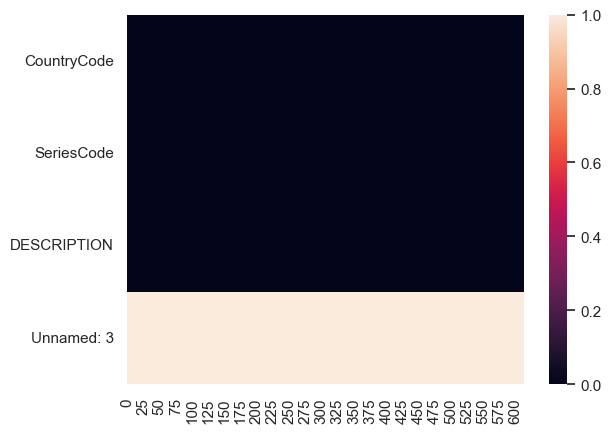

In [53]:
#répartition des valeurs manquantes
sns.heatmap(dfCountrySeries.isna().T)

**Remarque** : La colonne **Unnamed: 3** n'a pas été renseignée. On pourra le supprimer si toutes fois nous utilisons ce jeux de données 

In [54]:
#Pour avoir les memes nom de variable sur l'ensemble des datasets, renommer CountryCode et SeriesCode 
dfCountrySeries.rename(columns = {'SeriesCode' : 'Series Code', 'CountryCode' : 'Country Code'}, inplace = True)

In [55]:
#doublons sur tous le dataframe
dfCountrySeries[dfCountrySeries.duplicated(keep=False)].shape[0]

0

In [56]:
# Vérifions les Doublons pour les codes pays et les codes series
doublons = dfCountrySeries[dfCountrySeries.duplicated(['Country Code','Series Code'], keep=False)]
nb_doublons_code_pays_code_serie = doublons.shape[0]
print(f'Nombre de doublons sur le code pays et les codes series : {nb_doublons_code_pays_code_serie}')

Nombre de doublons sur le code pays et les codes series : 0


In [57]:
#Les Codes Pays uniques
uCPays = dfCountrySeries['Country Code'].unique()
print(f'Nombre de codes pays renseigné : {len(uCPays)}')

Nombre de codes pays renseigné : 211


In [58]:
# Recherche des pays présent dans EdStatsCountry.csv mais pas dans EdStatsCountry-Series.csv
df_plus=dfCountry[~dfCountry['Country Code'].isin(dfCountrySeries['Country Code'])][['Country Code']]
df_plus.drop_duplicates(inplace=True)
df_plus.count()

Country Code    30
dtype: int64

**Remarque** : 30 codes pays en plus non-renseignés dans EdStatsCountry-Series.csv

In [59]:
dfCountry['Country Code'].nunique() == dfCountrySeries['Country Code'].nunique()

False

In [60]:
#Les Indicateurs uniques
uInd = dfCountrySeries['Series Code'].unique()
print(f'Nombre de codes series renseigné : {len(uInd)}')

Nombre de codes series renseigné : 21


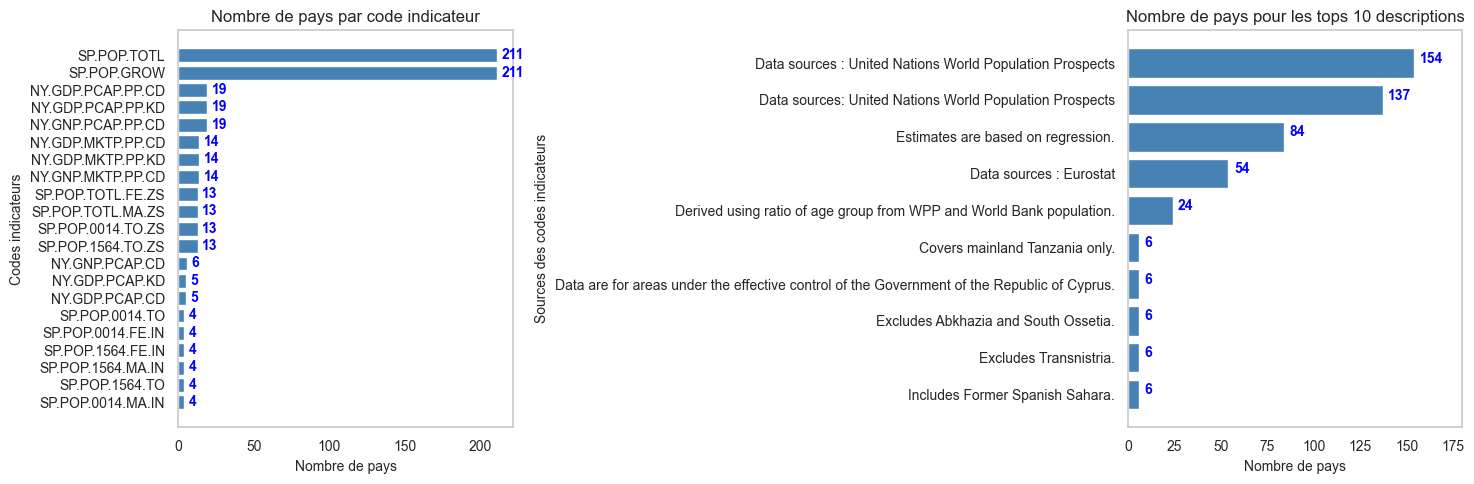

In [61]:

fig, ax = plt.subplots(1,2,figsize=(15, 5))  


# Regroupement des pays par code indicateur
ax1 = ax[0]
serie_code = dfCountrySeries.groupby('Series Code')[['Country Code']].count().reset_index().sort_values(by='Country Code')['Series Code']
nb_pays_par_serie_code=dfCountrySeries.groupby('Series Code')[['Country Code']].count()['Country Code'].sort_values()
ax1.barh(y = serie_code, width=nb_pays_par_serie_code, color='SteelBlue')
for i, v in enumerate(nb_pays_par_serie_code):
    ax1.text(v + 3, i - .22, str(v), color='blue', fontsize=10, fontweight='bold')
ax1.set_title('Nombre de pays par code indicateur', fontsize=12)
ax1.set_xlabel('Nombre de pays', fontsize=10)
ax1.set_ylabel('Codes indicateurs', fontsize=10)
ax1.tick_params(labelsize=10)
ax1.grid(False)

# Regroupement des pays par les 10 descriptions des sources des indicateurs les plus fréquentes
description = dfCountrySeries.groupby('DESCRIPTION')[['Country Code']].count().reset_index().sort_values(by='Country Code')['DESCRIPTION'].tail(10)
nb_pays_par_description=dfCountrySeries.groupby('DESCRIPTION')[['Country Code']].count()['Country Code'].sort_values().tail(10)
ax2=ax[1]
ax2.barh(y = description, width=nb_pays_par_description, color='SteelBlue')
for i, v in enumerate(nb_pays_par_description):
    ax2.text(v + 3, i + .01, str(v), color='blue', fontsize=10, fontweight='bold')
ax2.set_title('Nombre de pays pour les tops 10 descriptions', fontsize=12)
ax2.set_xlabel('Nombre de pays', fontsize=10)
ax2.set_ylabel('Sources des codes indicateurs', fontsize=10)
ax2.tick_params(labelsize=10)
ax2.set_xlim([0, 180])
ax2.grid(False)

fig.tight_layout()
plt.show()


Ce jeux de données contient 361 lignes et 4 colonnes.
Les 3 premieres colonnes n'ont pas de  valeurs manquantes.
****
**Note**: il y'a des pays en plus (30) présentent dans Country qui sont des noms de region ou de groupement de revenu ou certain regroupement de pays.
Le derniere variable Unnamed :3 est vide a supprimer.

### <span style='colour:#20185e'>3.4. Analyse du jeu de données EdStatsSeries.csv</span>

In [62]:
#importer les données 
#chargement du fichier
dfSeries = pd.read_csv('EdStatsSeries.csv', sep = ',')

In [63]:
#Les 5 premieres lignes 
dfSeries.head()

Series Code       Topic   
0  BAR.NOED.1519.FE.ZS  Attainment  \
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name   
0  Barro-Lee: Percentage of female population age...  \
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition   
0  Percentage of female population age 15-19 with...  \
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure   
0  Percentage of female population age 15-19 with...              NaN  \
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method   
0         NaN         NaN         NaN                NaN  \
1         NaN         NaN         NaN                NaN   
2         NaN         NaN         NaN                NaN   
3         NaN         NaN         NaN                NaN   
4         NaN         NaN         NaN                NaN   

  Limitations and exceptions  Notes from original source General comments   
0                        NaN                         NaN              NaN  \
1                        NaN                         NaN              NaN   
2                        NaN                         NaN              NaN   
3                        NaN                         NaN              NaN   
4                        NaN                         NaN              NaN   

                                              Source   
0  Robert J. Barro and Jong-Wha Lee: http://www.b...  \
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance   
0                                 NaN                   NaN  \
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links  Other web links  Related indicators  License Type   
0                  NaN              NaN                 NaN           NaN  \
1                  NaN              NaN                 NaN           NaN   
2                  NaN              NaN                 NaN           NaN   
3                  NaN              NaN                 NaN           NaN   
4                  NaN              NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [64]:
#Afficher le nombre de colonnes et de lignes 
nbligne, nbcolonne = dfSeries.shape
print(f'Le dataset contient {nbligne} lignes et {nbcolonne} colonnes.')

Le dataset contient 3665 lignes et 21 colonnes.


In [65]:
#Afficher les colonnes 
dfSeries.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [66]:
#Résumé des variables quantitatives
dfSeries.describe().T

count  mean  std  min  25%  50%  75%  max
Unit of measure               0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Notes from original source    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Other web links               0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Related indicators            0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
License Type                  0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
Unnamed: 20                   0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [67]:
#Résumé des valeurs quanlitatives 
dfSeries.describe(include = 'O').T

count unique   
Series Code                          3665   3665  \
Topic                                3665     37   
Indicator Name                       3665   3665   
Short definition                     2156   1169   
Long definition                      3665   2060   
Periodicity                            99      1   
Base Period                           314      4   
Other notes                           552     14   
Aggregation method                     47      3   
Limitations and exceptions             14      9   
General comments                       14      8   
Source                               3665     31   
Statistical concept and methodology    23      2   
Development relevance                   3      1   
Related source links                  215      1   

                                                                                   top   
Series Code                                                        BAR.NOED.1519.FE.ZS  \
Topic                                                                Learning Outcomes   
Indicator Name                       Barro-Lee: Percentage of female population age...   
Short definition                     Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
Long definition                      Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
Periodicity                                                                     Annual   
Base Period                                                 Projections (2010 to 2100)   
Other notes                                                                       EGRA   
Aggregation method                                                    Weighted average   
Limitations and exceptions           Data should be used cautiously because of diff...   
General comments                     When NEET rates are available for more than tw...   
Source                                                 UNESCO Institute for Statistics   
Statistical concept and methodology                                              TIMSS   
Development relevance                Unemployment and total employment are the broa...   
Related source links                              http://saber.worldbank.org/index.cfm   

                                     freq  
Series Code                             1  
Topic                                1046  
Indicator Name                          1  
Short definition                      215  
Long definition                       215  
Periodicity                            99  
Base Period                           308  
Other notes                           403  
Aggregation method                     31  
Limitations and exceptions              3  
General comments                        3  
Source                               1269  
Statistical concept and methodology    20  
Development relevance                   3  
Related source links                  215

In [68]:
pd.set_option('display.max_columns', None ) #pour afficher toutes les colonnes
pd.set_option('display.max_rows', None ) #pour afficher toutes les lignes
dfSeries.isna().mean(axis=0)*100 #Pour afficher le % de valeurs manquantes pour chaque variables

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000


<Axes: >

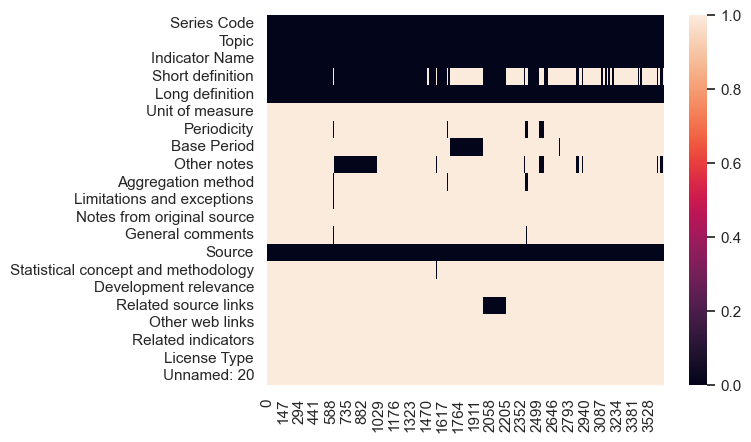

In [69]:
#répartition des valeurs manquantes
sns.heatmap(dfSeries.isna().T)

In [70]:
#doublons sur toutes les colonnes du dataframe 
dfSeries[dfSeries.duplicated(keep=False)].shape[0]

0

In [71]:
# Vérifions les Doublons pour les codes Series et les indicateurs  
doublons = dfSeries[dfSeries.duplicated(['Series Code','Indicator Name'], keep=False)]
nb_doublons_code_pays = doublons.shape[0]
print(f'Nombre de doublons sur les codes series et les indicateurs : {nb_doublons_code_pays}')

Nombre de doublons sur les codes series et les indicateurs : 0


In [72]:
#les themes uniques
theme_unique = dfSeries['Topic'].nunique()
print(f'{theme_unique} thémes sur les indicateurs')

37 thémes sur les indicateurs


In [73]:
#Les Codes series uniques
uCSeries = dfSeries['Series Code'].unique()
print(f'Nombre de codes series renseigné : {len(uCSeries)}')

Nombre de codes series renseigné : 3665


In [74]:
# Recherche des series codes présent dansEdStatsCountry.csv mais pas dans EdStatsCountry-Series.csv
df_plus=dfSeries[~dfSeries['Series Code'].isin(dfCountrySeries['Series Code'])][['Series Code']]
df_plus.drop_duplicates(inplace=True)
df_plus.count()

Series Code    3644
dtype: int64

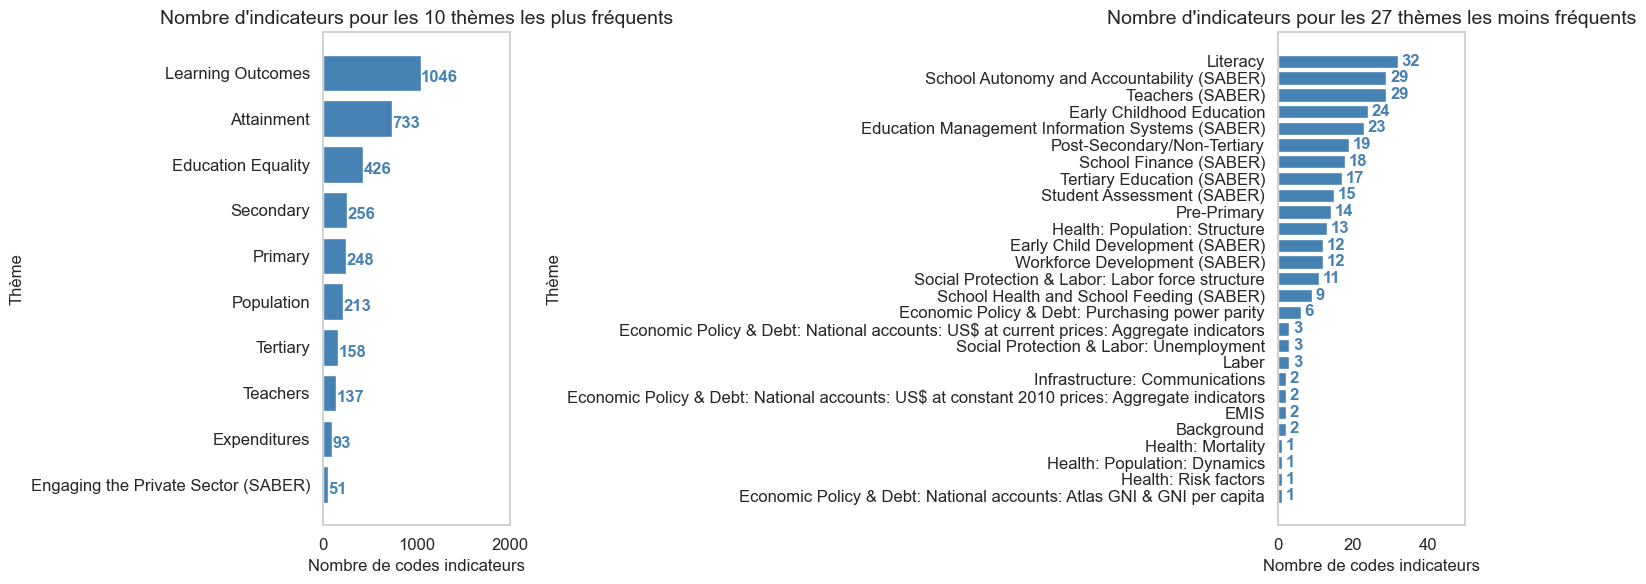

In [75]:
# Regroupement des pays par code indicateur et des pays par description

fig, ax = plt.subplots(1, 2, figsize=(15, 6))  

# Graphique ligne 1, colonne 1 ------------------
# Top 10 des thèmes les plus fréquents 
theme = dfSeries.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].tail(10)
nb_code_par_theme=dfSeries.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().tail(10)
ax1=ax[0]
ax1.barh(y = theme, width=nb_code_par_theme, color='SteelBlue')
for i, v in enumerate(nb_code_par_theme):
    ax1.text(v + 3, i - .2, str(v), color='SteelBlue', fontweight='bold', fontsize=12)
ax1.set_title('Nombre d\'indicateurs pour les 10 thèmes les plus fréquents', fontsize=14)
ax1.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax1.set_ylabel('Thème', fontsize=12)
ax1.tick_params(labelsize=12)
ax1.grid(False)
ax1.set_xlim([0, 2000])

# Graphique ligne 1, colonne 2 ------------------
# last 27 thèmes les moins fréquents
theme_moins = dfSeries.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].head(27)
nb_code_par_theme_moins=dfSeries.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().head(27)
ax2=ax[1]
ax2.barh(y = theme_moins, width=nb_code_par_theme_moins, color='SteelBlue')
for i, v in enumerate(nb_code_par_theme_moins):
    ax2.text(v + 1, i - .25, str(v), color='SteelBlue', fontweight='bold', fontsize=12)
ax2.set_title('Nombre d\'indicateurs pour les 27 thèmes les moins fréquents', fontsize=14)
ax2.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax2.set_ylabel('Thème', fontsize=12)
ax2.tick_params(labelsize=12)
ax2.grid(False)
ax2.set_xlim([0, 50])

fig.tight_layout()
plt.show()

**Remarque**: le jeux de données contient 3665 lignes et 21 colonnes. Aucun doublon. Ce jeux de données permet de renseigner les themes des indicateurs, les sources et les descriptions longues.
Il y'a que 5 principales colonnes qui sont à 100% compléte. Le reste des variables à supprimer.

### <span style='colour:#20185e'>3.4. Analyse du jeu de données EdStatsFootNote.csv</span>

In [76]:
#importer les données 
#chargement du fichier
dfFootNote = pd.read_csv('EdStatsFootNote.csv', sep = ',')

In [77]:
#Les 5 premeieres lignes 
dfFootNote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [78]:
#Afficher le nombre de colonnes et de lignes 
nbligne, nbcolonne = dfFootNote.shape
print(f'Le dataset contient {nbligne} lignes et {nbcolonne} colonnes.')

Le dataset contient 643638 lignes et 5 colonnes.


In [79]:
#Afficher les colonnes
dfFootNote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [80]:
#Résumé des variables quantitatives
dfFootNote.describe().T

count  mean  std  min  25%  50%  75%  max
Unnamed: 4    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [81]:
#Résumé des valeurs quanlitatives 
dfFootNote.describe(include = 'O').T

count unique           top    freq
CountryCode  643638    239           LIC    7320
SeriesCode   643638   1558   SH.DYN.MORT    9226
Year         643638     56        YR2004   27128
DESCRIPTION  643638   9102  Country Data  191188

In [82]:
#Pour afficher le % de valeurs manquantes pour chaque variables
dfFootNote.isna().mean(axis=0)*100 

CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64

<Axes: >

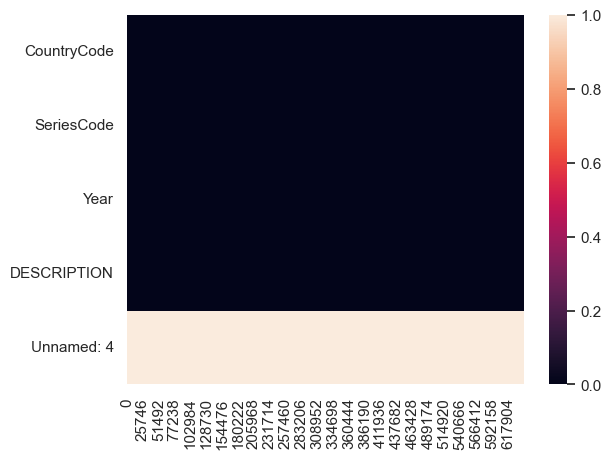

In [83]:
#répartition des valeurs manquantes
sns.heatmap(dfFootNote.isna().T)

In [84]:
#Pour avoir les memes nom de variable sur l'ensemble des datasets, renommer CountryCode et SeriesCode 
dfFootNote.rename(columns = {'SeriesCode' : 'Series Code', 'CountryCode' : 'Country Code'}, inplace = True)

In [85]:
#Doublons sur tout le dataframe 
dfFootNote[dfFootNote.duplicated(keep= False)].shape[0]

0

In [86]:
# Vérifions les Doublons pour les codes Series
doublons = dfFootNote[dfFootNote.duplicated(['Series Code'], keep=False)]
nb_doublons_code_series = doublons.shape[0]
print(f'Nombre de doublons sur les codes series : {nb_doublons_code_series}')

Nombre de doublons sur les codes series : 643490


In [87]:
# Vérifions les Doublons pour les codes pays 
doublons = dfFootNote[dfFootNote.duplicated(['Country Code'], keep=False)]
nb_doublons_code_pays = doublons.shape[0]
print(f'Nombre de doublons sur les codes pays : {nb_doublons_code_pays}')

Nombre de doublons sur les codes pays : 643638


In [88]:
#Les Codes series uniques
uCSeries = dfFootNote['Series Code'].unique()
print(f'Nombre de codes series renseigné : {len(uCSeries)}')

Nombre de codes series renseigné : 1558


In [89]:

dfCountry['Country Code'].nunique() == dfFootNote['Country Code'].nunique()

False

In [90]:
# Recherche des codes pays présent EdStatsCountry-Series.csv mais pas dans EdStatsFootNote.csv 
dfCountry[~dfCountry['Country Code'].isin(dfFootNote['Country Code'])][['Short Name']].sort_values(by = 'Short Name')

Short Name
85                   Greenland
207  Sint Maarten (Dutch part)
134   St. Martin (French part)

**Remarque** : les pays en plus dans ce jeux de donées sont des pays devenus autonomes.
    

le jeux de données contient 643638 lignes et 5 Colonnes. il représente les années de reference de mises a jour des indicateurs par pays et la description.
**Les pays non présent dans ce jeux de données sont Greenland Sint Maarten (Dutch part) et St. Martin (French part)**


(0.0, 10800.0)

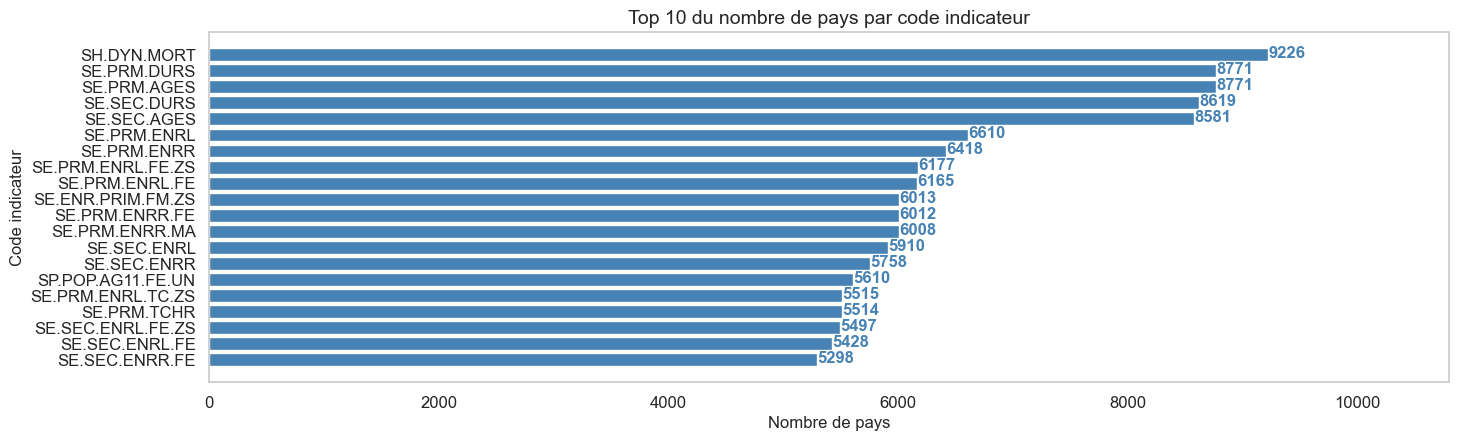

In [1059]:
# Regroupement des pays par code indicateur et des pays par description

plt.figure(figsize=(16, 10))
G = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(G[0, :])
# Top 10 du nombre de pays par code indicateur
serie_code = dfFootNote.groupby('Series Code')[['Country Code']].count().reset_index().sort_values(by='Country Code')['Series Code'].tail(20)
nb_pays_par_serie_code=dfFootNote.groupby('Series Code')[['Country Code']].count()['Country Code'].sort_values().tail(20)
ax1.barh(y = serie_code, width=nb_pays_par_serie_code,color='SteelBlue')
for i, v in enumerate(nb_pays_par_serie_code):
    ax1.text(v + 3, i - .2, str(v), color='SteelBlue', fontweight='bold', fontsize='12')
ax1.set_title('Top 10 du nombre de pays par code indicateur', fontsize=14)
ax1.set_xlabel('Nombre de pays', fontsize='12')
ax1.set_ylabel('Code indicateur', fontsize='12')
ax1.tick_params(labelsize=12)
ax1.grid(False)
ax1.set_xlim([0, 10800])

## <span style='background:#c29c31'>4. Bilan des jeux de données</span>

In [92]:
def Bilan(value):
    '''
    Format a percentage with 1 digit after comma 
    '''
    return "{0:.1f}%".format(value * 100)


# We create a table containing all information about the 5 files
files_description = pd.DataFrame(columns = ["Nb lignes", "Nb colonnes", "Taux remplissage moyen", "Doublons", "Description"],
                                 index = ["EdStatsCountry.csv", 
                                          "EdStatsSeries.csv", 
                                          "EdStatsData.csv", 
                                          "EdStatsCountry-Series.csv", 
                                          "EdStatsFootNote.csv"])

# les lignes
files_description["Nb lignes"] = [
    len(dfCountry.index),
    len(dfSeries.index),
    len(dfData.index),
    len(dfCountrySeries.index),
    len(dfFootNote.index)
]

# les colonnes
files_description["Nb colonnes"] = [
    len(dfCountry.columns),
    len(dfSeries.columns),
    len(dfData.columns),
    len(dfCountrySeries.columns),
    len(dfFootNote.columns)
]

# Taux de remplissage moyen
files_description["Taux remplissage moyen"] = [
    Bilan(dfCountry.notna().mean().mean()),
    Bilan(dfSeries.notna().mean().mean()),
    Bilan(dfData.notna().mean().mean()),
    Bilan(dfCountrySeries.notna().mean().mean()),
    Bilan(dfFootNote.notna().mean().mean())
]

# Doublons
files_description["Doublons"] = [
    dfCountry.duplicated(subset=["Country Code"]).sum(),
    dfSeries.duplicated(subset=["Indicator Name"]).sum(),
    dfData.duplicated(subset=["Country Code", "Indicator Name"]).sum(),
    dfCountrySeries.duplicated(subset=["Country Code", "Series Code"]).sum(),
    dfFootNote.duplicated(subset=["Country Code", "Series Code", "Year"]).sum(),
]

# Description
files_description["Description"] = [
    "Liste des pays avec leurs données principales",
    "Liste des indicateurs avec description, unité, période, etc...",
    "Données de chaque indicateur par pays et par année",
    "Description des différentes séries de données (majoritairement provenance)",
    "Commentaire pour chaque couple série de données / pays"
]


files_description

Nb lignes  Nb colonnes Taux remplissage moyen   
EdStatsCountry.csv               241           32                  69.8%  \
EdStatsSeries.csv               3665           21                  28.3%   
EdStatsData.csv               886930           70                  13.9%   
EdStatsCountry-Series.csv        613            4                  75.0%   
EdStatsFootNote.csv           643638            5                  80.0%   

                           Doublons   
EdStatsCountry.csv                0  \
EdStatsSeries.csv                 0   
EdStatsData.csv                   0   
EdStatsCountry-Series.csv         0   
EdStatsFootNote.csv               0   

                                                                 Description  
EdStatsCountry.csv             Liste des pays avec leurs données principales  
EdStatsSeries.csv          Liste des indicateurs avec description, unité,...  
EdStatsData.csv            Données de chaque indicateur par pays et par a...  
EdStatsCountry-Series.csv  Description des différentes séries de données ...  
EdStatsFootNote.csv        Commentaire pour chaque couple série de donnée...

Nous allons principalement nous concentrer sur les deux jeux de données :
****
- ***EdStatsData.csv*** : qui regroupe le Country Name et l'evolution des indicateurs par pays et par années.
- ***EdStatsCountry.csv*** : qui contient Short Name ainsi que les régions et les groupes de revenus.



## <span style='background:#c29c31'>5. Selection des indicateurs Pertinents</span>

Nous avons ciblé principalement : 
- **La population 15-24ans**
- **le niveau lycéé et universitaire**
- **le niveau de vie de la population**
- **l'accés a l'electricité et a internet** 

Suivant nos recherches dans le site de la banque mondiale de données, nous avons retenue : 
- SE : Social Education 
- SP : Social Population 
- IT : Infrastructure
- NY : Nation Accounts 
- EG : Energie
****
**Les différents mots clés à rechércher** : 
***
- 15 : pour la cible 15-19ans 
- 20 : pour la cible 20-24ans 
- SEC : pour les lycéens
- TER : pour le niveau universitaire
- EG : pour l'accés a l'energie 
- IT : pour l'accés aux infrastructures techniques

In [93]:
#La réduction de la plage d'années a étudier 
annee_retenue

['2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [94]:
# Recherche des codes pays des regroupements de pays dans EdStatsData.csv
df_pays_en_trop=dfData[~dfData['Country Code'].isin(dfCountrySeries['Country Code'])][['Country Name','Country Code']].sort_values(by = 'Country Name')
df_pays_en_trop.drop_duplicates(inplace=True)
df_pays_en_trop
suppr=df_pays_en_trop['Country Code'].to_list()
suppr.remove('VGB')
suppr.remove('CUW')
suppr.remove('NRU')
suppr.remove('SXM')
suppr.remove('SSD')
suppr.remove('MAF')    
print(f'Pays hors norme ISO : {suppr}')

Pays hors norme ISO : ['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD']


In [95]:
#Dataframe indicateurs
df_indicateurs = dfData.copy()
#Avant de travailler sur le dataframe indicateurs, on supprimme les pays hors normes 
df_indicateurs=df_indicateurs[~df_indicateurs['Country Code'].isin(suppr)]
#regroupe les indicateurs selon le remplissage des pays  
df_indicateurs = df_indicateurs.groupby('Indicator Code')[annee_retenue].count()
df_indicateurs=df_indicateurs.reset_index()


In [96]:
#Indicateurs dont le remplissage pour tous les pays pour toutes les années
df_indicateurs['TOUT']=df_indicateurs[annee_retenue].sum(axis=1)
df_indicateurs.describe().T

count        mean         std  min   25%    50%    75%     max
2005  3665.0   47.932060   65.292201  0.0   0.0   12.0   97.0   215.0
2006  3665.0   35.979536   56.229376  0.0   0.0    1.0   55.0   215.0
2007  3665.0   35.143520   57.131142  0.0   0.0    0.0   54.0   215.0
2008  3665.0   34.347340   58.223390  0.0   0.0    0.0   58.0   215.0
2009  3665.0   36.440928   58.455577  0.0   0.0    0.0   67.0   215.0
2010  3665.0   63.735334   70.015971  0.0   0.0   13.0  144.0   215.0
2011  3665.0   37.499591   57.961491  0.0   0.0    2.0   63.0   215.0
2012  3665.0   37.773533   57.387026  0.0   0.0    6.0   64.0   214.0
2013  3665.0   35.112688   57.002376  0.0   0.0    1.0   55.0   214.0
2014  3665.0   28.825102   51.850513  0.0   0.0    1.0   33.0   210.0
2015  3665.0   35.271760   63.345214  0.0   0.0    1.0   34.0   210.0
TOUT  3665.0  428.061392  575.813483  0.0  26.0  259.0  570.0  2353.0

In [97]:
#Les indicateurs dont TOUT > 500 
df_indicateurs = df_indicateurs.loc[df_indicateurs['TOUT'] > 500]

In [98]:
df_indicateurs.shape

(961, 13)

Il reste 961 indicateurs

In [99]:
#pd.options.mode.chained_assignment = None  # default='warn'
#Ajouter les noms courts pour la compréhension 
df_travail= pd.DataFrame({'Series Code' : dfSeries['Series Code'],
                          'Short definition' : dfSeries['Short definition'],
                                 'Topic' : dfSeries['Indicator Name'],
                         'Long definition' : dfSeries['Long definition']})
df_indicateurs = df_indicateurs.merge(df_travail, how = 'left', left_on = 'Indicator Code', right_on = 'Series Code')
df_indicateurs.drop(columns = ['Series Code'], inplace = True)

In [100]:
df_indicateurs.describe().T

count         mean         std    min    25%     50%     75%     max
2005  961.0   118.476587   54.570288    9.0   70.0   111.0   189.0   215.0
2006  961.0   116.476587   52.395687   32.0   68.0   109.0   187.0   215.0
2007  961.0   119.682622   49.073947   35.0   73.0   114.0   181.0   215.0
2008  961.0   122.401665   46.995733   38.0   79.0   119.0   181.0   215.0
2009  961.0   123.488033   46.257275   46.0   79.0   119.0   181.0   215.0
2010  961.0   123.468262   44.800406   51.0   83.0   117.0   181.0   215.0
2011  961.0   124.890739   44.325331   49.0   87.0   118.0   181.0   215.0
2012  961.0   123.234131   45.180060   50.0   85.0   118.0   181.0   214.0
2013  961.0   120.050989   46.875106   36.0   82.0   118.0   181.0   214.0
2014  961.0    96.887617   59.940108    0.0   59.0    96.0   136.0   210.0
2015  961.0    66.708637   77.784574    0.0    3.0     8.0   181.0   210.0
TOUT  961.0  1255.765869  533.214056  508.0  782.0  1161.0  1826.0  2353.0

In [101]:
#Recherche de la cible population 15-19ans 
#list_15_19ans = [rech for rech in df_indicateurs['Indicator Code'] if ('15' or '19') in rech]
list_15_19ans = [rech for rech in df_indicateurs['Indicator Code'] if ('15') in rech]
df_indicateurs[df_indicateurs['Indicator Code'].isin(list_15_19ans)][['Indicator Code','Topic','Long definition']]

Indicator Code                                   Topic   
240  SP.POP.1015.FE.UN          Population, ages 10-15, female  \
241  SP.POP.1015.MA.UN            Population, ages 10-15, male   
242  SP.POP.1015.TO.UN           Population, ages 10-15, total   
252  SP.POP.1115.FE.UN          Population, ages 11-15, female   
253  SP.POP.1115.MA.UN            Population, ages 11-15, male   
254  SP.POP.1115.TO.UN           Population, ages 11-15, total   
264  SP.POP.1215.FE.UN          Population, ages 12-15, female   
265  SP.POP.1215.MA.UN            Population, ages 12-15, male   
266  SP.POP.1215.TO.UN           Population, ages 12-15, total   
294  SP.POP.1524.FE.UN          Population, ages 15-24, female   
295  SP.POP.1524.MA.UN            Population, ages 15-24, male   
296  SP.POP.1524.TO.UN           Population, ages 15-24, total   
297  SP.POP.1564.FE.IN           Population ages 15-64, female   
298  SP.POP.1564.MA.IN             Population ages 15-64, male   
299     SP.POP.1564.TO            Population ages 15-64, total   
300  SP.POP.1564.TO.ZS      Population ages 15-64 (% of total)   
346  SP.POP.AG15.FE.UN  Age population, age 15, female, UNESCO   
347  SP.POP.AG15.MA.UN                Population, age 15, male   
348  SP.POP.AG15.TO.UN   Age population, age 15, total, UNESCO   

                                       Long definition  
240  Population, ages 10-15, female is the total nu...  
241  Population, ages 10-15, male is the total numb...  
242  Population, ages 10-15, total is the total pop...  
252  Population, ages 11-15, female is the total nu...  
253  Population, ages 11-15, male is the total numb...  
254  Population, ages 11-15, total is the total pop...  
264  Population, ages 12-15, female is the total nu...  
265  Population, ages 12-15, male is the total numb...  
266  Population, ages 12-15, total is the total pop...  
294  Population, ages 15-24, female is the total nu...  
295  Population, ages 15-24, male is the total numb...  
296  Population, ages 15-24, total is the total pop...  
297  Female population between the ages 15 to 64. P...  
298  Male population between the ages 15 to 64. Pop...  
299  Total population between the ages 15 to 64. Po...  
300  Total population between the ages 15 to 64 as ...  
346  Age population, female refers to female popula...  
347  Population, age 15, male refers to the male po...  
348  Age population, total refers to total populati...

**Remarque** : Dans les **SP.POP** nous n'avons pas directement la cible 15-19 mais plutot 15-24 en population totale selon l'UNESCO. Par conséquent l'indicateur démographique retenue est **SP.POP.1524.TO.UN**

In [102]:
#Recherche de la cible population  20-24 ans 
#list_20_24ans = [rech for rech in df_indicateurs['Indicator Code'] if ('20' or '24') in rech]
list_20_24ans = [rech for rech in df_indicateurs['Indicator Code'] if ('SP.POP.20')in rech]
df_indicateurs[df_indicateurs['Indicator Code'].isin(list_20_24ans)][['Indicator Code','Topic','Long definition']]

Empty DataFrame
Columns: [Indicator Code, Topic, Long definition]
Index: []

**Remarque** : Dans les **SP.POP** nous n'avons pas la population totale pour les 20-24 ans.Par conséquent, pas d'indicateur retenu.

In [103]:
#Recherche de la cible lycée
list_lycée = [rech for rech in df_indicateurs['Indicator Code'] if ( 'SE.SEC') in rech]
df_indicateurs[df_indicateurs['Indicator Code'].isin(list_lycée)][['Indicator Code','Topic','Long definition']]

Indicator Code                                              Topic   
84            SE.SEC.AGES  Official entrance age to lower secondary educa...  \
85   SE.SEC.CMPT.LO.FE.ZS        Lower secondary completion rate, female (%)   
86   SE.SEC.CMPT.LO.MA.ZS          Lower secondary completion rate, male (%)   
87      SE.SEC.CMPT.LO.ZS    Lower secondary completion rate, both sexes (%)   
88            SE.SEC.DURS  Theoretical duration of secondary education (y...   
89         SE.SEC.DURS.LO                                                NaN   
90         SE.SEC.DURS.UP  Theoretical duration of upper secondary educat...   
91            SE.SEC.ENRL  Enrolment in secondary education, both sexes (...   
92         SE.SEC.ENRL.FE  Enrolment in secondary education, female (number)   
93   SE.SEC.ENRL.FE.VO.ZS  Percentage of female students in secondary edu...   
94      SE.SEC.ENRL.FE.ZS  Percentage of students in secondary education ...   
95         SE.SEC.ENRL.GC  Enrolment in secondary general, both sexes (nu...   
96      SE.SEC.ENRL.GC.FE    Enrolment in secondary general, female (number)   
97   SE.SEC.ENRL.GC.FE.ZS  Percentage of students in secondary general ed...   
98   SE.SEC.ENRL.MA.VO.ZS  Percentage of male students in secondary educa...   
99      SE.SEC.ENRL.TC.ZS  Pupil-teacher ratio in secondary education (he...   
100        SE.SEC.ENRL.VO  Enrolment in secondary vocational, both sexes ...   
101     SE.SEC.ENRL.VO.FE  Enrolment in secondary vocational, female (num...   
102  SE.SEC.ENRL.VO.FE.ZS  Percentage of students in secondary vocational...   
103     SE.SEC.ENRL.VO.ZS  Percentage of students in secondary education ...   
104           SE.SEC.ENRR   Gross enrolment ratio, secondary, both sexes (%)   
105        SE.SEC.ENRR.FE       Gross enrolment ratio, secondary, female (%)   
106        SE.SEC.ENRR.LO  Gross enrolment ratio, lower secondary, both s...   
107     SE.SEC.ENRR.LO.FE  Gross enrolment ratio, lower secondary, female...   
108     SE.SEC.ENRR.LO.MA   Gross enrolment ratio, lower secondary, male (%)   
109        SE.SEC.ENRR.MA         Gross enrolment ratio, secondary, male (%)   
110        SE.SEC.ENRR.UP  Gross enrolment ratio, upper secondary, both s...   
111     SE.SEC.ENRR.UP.FE                                                NaN   
112     SE.SEC.ENRR.UP.MA   Gross enrolment ratio, upper secondary, male (%)   
113           SE.SEC.NENR      Net enrolment rate, secondary, both sexes (%)   
114        SE.SEC.NENR.FE          Net enrolment rate, secondary, female (%)   
115        SE.SEC.NENR.MA            Net enrolment rate, secondary, male (%)   
116        SE.SEC.PRIV.ZS  Percentage of enrolment in secondary education...   
117     SE.SEC.PROG.FE.ZS  Effective transition rate from primary to lowe...   
118     SE.SEC.PROG.MA.ZS  Effective transition rate from primary to lowe...   
119        SE.SEC.PROG.ZS  Effective transition rate from primary to lowe...   
120           SE.SEC.TCHR  Teachers in secondary education, both sexes (n...   
121        SE.SEC.TCHR.FE   Teachers in secondary education, female (number)   
122     SE.SEC.TCHR.FE.ZS  Percentage of teachers in secondary education ...   

                                       Long definition  
84   Age at which students would enter lower second...  
85   Total number of new female entrants in the las...  
86   Total number of new male entrants in the last ...  
87   Total number of new entrants in the last grade...  
88   Number of grades (years) in secondary educatio...  
89                                                 NaN  
90   Number of grades (years) in upper secondary ed...  
91   Total number of students enrolled at public an...  
92   Total number of female students enrolled at pu...  
93   Total number of female students enrolled in vo...  
94   Number of female students enrolled in all seco...  
95   Total number of students enrolled in general p...  
96   Total number of female students enrolled in ge...  
97   Number 

**Remarque**: dans les **SE.SEC** dont le théme est **Secondary**, il y'a que le taux brut de scolarisation sur les deux sexes pour le niveau lycée. Par conséquent, nous avons l'indicateur : **SE.SEC.ENRR**

In [104]:
#Recherche de la cible éducation universitaire
list_universitaire = [rech for rech in df_indicateurs['Indicator Code'] if ('SE.TER') in rech]
df_indicateurs[df_indicateurs['Indicator Code'].isin(list_universitaire)][['Indicator Code','Topic','Long definition']]

Indicator Code                                              Topic   
123     SE.TER.CMPL.FE.ZS  Gross graduation ratio from first degree progr...  \
124     SE.TER.CMPL.MA.ZS  Gross graduation ratio from first degree progr...   
125        SE.TER.CMPL.ZS  Gross graduation ratio from first degree progr...   
126           SE.TER.ENRL  Enrolment in tertiary education, all programme...   
127        SE.TER.ENRL.FE  Enrolment in tertiary education, all programme...   
128     SE.TER.ENRL.FE.ZS  Percentage of students in tertiary education w...   
129           SE.TER.ENRR    Gross enrolment ratio, tertiary, both sexes (%)   
130        SE.TER.ENRR.FE        Gross enrolment ratio, tertiary, female (%)   
131        SE.TER.ENRR.MA          Gross enrolment ratio, tertiary, male (%)   
132           SE.TER.GRAD  Graduates from tertiary education, both sexes ...   
133  SE.TER.GRAD.AG.FE.ZS  Percentage of female graduates from tertiary e...   
134     SE.TER.GRAD.AG.ZS  Percentage of graduates from tertiary educatio...   
135  SE.TER.GRAD.ED.FE.ZS  Percentage of female graduates from tertiary e...   
136     SE.TER.GRAD.ED.ZS  Percentage of graduates from tertiary educatio...   
137  SE.TER.GRAD.EN.FE.ZS  Percentage of female graduates from tertiary e...   
138     SE.TER.GRAD.EN.ZS  Percentage of graduates from tertiary educatio...   
139        SE.TER.GRAD.FE  Graduates from tertiary education, female (num...   
140  SE.TER.GRAD.FE.AG.ZS  Percentage of graduates from Agriculture progr...   
141  SE.TER.GRAD.FE.ED.ZS  Percentage of graduates from Education program...   
142  SE.TER.GRAD.FE.EN.ZS  Percentage of graduates from Engineering, Manu...   
143  SE.TER.GRAD.FE.HL.ZS  Percentage of graduates from Health and Welfar...   
144  SE.TER.GRAD.FE.HU.ZS  Percentage of graduates from Humanities and Ar...   
145  SE.TER.GRAD.FE.SC.ZS  Percentage of graduates from Science programme...   
146  SE.TER.GRAD.FE.SS.ZS  Percentage of graduates from Social Sciences, ...   
147  SE.TER.GRAD.FE.SV.ZS  Percentage of graduates from Services programm...   
148     SE.TER.GRAD.FE.ZS  Percentage of graduates from tertiary educatio...   
149  SE.TER.GRAD.HL.FE.ZS  Percentage of female graduates from tertiary e...   
150     SE.TER.GRAD.HL.ZS  Percentage of graduates from tertiary educatio...   
151  SE.TER.GRAD.HU.FE.ZS  Percentage of female graduates from tertiary e...   
152     SE.TER.GRAD.HU.ZS  Percentage of graduates from tertiary educatio...   
153  SE.TER.GRAD.OT.FE.ZS  Percentage of female graduates from tertiary e...   
154     SE.TER.GRAD.OT.ZS  Percentage of graduates from tertiary educatio...   
155  SE.TER.GRAD.SC.FE.ZS  Percentage of female graduates from tertiary e...   
156     SE.TER.GRAD.SC.ZS  Percentage of graduates from tertiary educatio...   
157  SE.TER.GRAD.SS.FE.ZS  Percentage of female graduates from tertiary e...   
158     SE.TER.GRAD.SS.ZS  Percentage of graduates from tertiary educatio...   
159  SE.TER.GRAD.SV.FE.ZS  Percentage of female graduates from tertiary e...   
160     SE.TER.GRAD.SV.ZS  Percentage of graduates from tertiary educatio...   
161        SE.TER.PRIV.ZS  Percentage of enrolment in tertiary education ...   
162           SE.TER.TCHR  Teachers in tertiary education programmes, bot...   
163        SE.TER.TCHR.FE  Teachers in tertiary education programmes, fem...   
164     SE.TER.TCHR.FE.ZS  Percentage of teachers in tertiary education w...   

                                       Long definition  
123  Number of female graduates from first degree p...  
124  Number of male graduates from first degree pro...  
125  Number of graduates from first degree programm...  
126  The total number of students enrolled at publi...  
127  The total number of female students enrolled a...  
128  Number of female students at the tertiary educ...  
129  Total enrollment in tertiary education (ISCED ...  
130  Total female enrollment in tertiary education ...  
131  Total male enrollment in tertiary education (I...  


**Remarque** : Suivant la meme logique que la cible niveau lycée, nous avons l'indicateur : **SE.TER.ENRR** qui est le taux brut de scolarisation pour le niveau universitaire pour les 2 sexes.

In [105]:
#Recherche de la cible accés à l'internet 
list_internet = [rech for rech in df_indicateurs['Indicator Code'] if ('IT.NET') in rech]
df_indicateurs[df_indicateurs['Indicator Code'].isin(list_internet)][['Indicator Code','Topic','Long definition']]

Indicator Code                            Topic   
0  IT.NET.USER.P2  Internet users (per 100 people)  \

                                     Long definition  
0  Internet users are individuals who have used t...

l'indicateur retenu est **IT.NET.USER.P2** qui représente les Utilisateurs d'Internet (pour 100 personnes)

In [106]:
#Recherche de la cible revenu de la population
list_revenu = [rech for rech in df_indicateurs['Indicator Code'] if ('NY.GDP.') in rech]
df_indicateurs[df_indicateurs['Indicator Code'].isin(list_revenu)][['Indicator Code','Topic','Long definition']]

Indicator Code                                              Topic   
1     NY.GDP.MKTP.CD                                  GDP (current US$)  \
2     NY.GDP.MKTP.KD                            GDP (constant 2010 US$)   
3  NY.GDP.MKTP.PP.CD                 GDP, PPP (current international $)   
4  NY.GDP.MKTP.PP.KD           GDP, PPP (constant 2011 international $)   
5     NY.GDP.PCAP.CD                       GDP per capita (current US$)   
6     NY.GDP.PCAP.KD                 GDP per capita (constant 2010 US$)   
7  NY.GDP.PCAP.PP.CD      GDP per capita, PPP (current international $)   
8  NY.GDP.PCAP.PP.KD  GDP per capita, PPP (constant 2011 internation...   

                                     Long definition  
1  GDP at purchaser's prices is the sum of gross ...  
2  GDP at purchaser's prices is the sum of gross ...  
3  PPP GDP is gross domestic product converted to...  
4  PPP GDP is gross domestic product converted to...  
5  GDP per capita is gross domestic product divid...  
6  GDP per capita is gross domestic product divid...  
7  GDP per capita based on purchasing power parit...  
8  GDP per capita based on purchasing power parit...

L'indicateur retenu est **NY.GDP.PCAP.PP.KD** qui represente le RN par habitant basé sur la parité de pouvoir d'achat (PPA). Le RNB à PPA est le revenu national brut (RNB) converti en dollars internationaux à l'aide des taux de parité de pouvoir d'achat. Un dollar international a le même pouvoir d'achat sur le RNB qu'un dollar américain aux États-Unis. Le RNB est la somme de la valeur ajoutée par tous les producteurs résidents, plus les impôts sur les produits (moins les subventions) non inclus dans l'évaluation de la production, plus les recettes nettes des revenus primaires (rémunération des employés et revenus de la propriété) provenant de l'étranger. Les données sont exprimées en dollars internationaux courants, sur la base du cycle 2011 du PCI.


In [107]:
#Recherche de la cible accés à l'energie
list_energie = [rech for rech in df_indicateurs['Indicator Code'] if ('EG.') in rech]
df_indicateurs[df_indicateurs['Indicator Code'].isin(list_energie)][['Indicator Code','Topic','Long definition']]

Empty DataFrame
Columns: [Indicator Code, Topic, Long definition]
Index: []

**Remarque**: il y'a pas d'indicateur renseigné pour l'accés à l'énérgie. 
*****
Aucun indicateur retenu

In [108]:
#Indicateurs retenus selon la plage d'année 
indicateurs = ['NY.GDP.PCAP.PP.KD','IT.NET.USER.P2','SE.TER.ENRR','SE.SEC.ENRR','SP.POP.1524.TO.UN']
#Ajout de la repartition des indicateurs sur la plage d'année dans le dataframe df_indicateurs
df_indicateurs['TOUT'] = df_indicateurs[annee_retenue].sum(axis = 1)
#pour connaitre le pourcentage il nous faudra remplir pour 242 pays chaque indicateur et pour chaque année (2005-2015)
#==> 242*11 = 2662
df_indicateurs['Pourcentage'] = round(df_indicateurs['TOUT']/2662*100,2)

In [109]:
#description
df_indicateurs[['TOUT','Pourcentage']].describe().T

count         mean         std     min     25%      50%     75%   
TOUT         961.0  1255.765869  533.214056  508.00  782.00  1161.00  1826.0  \
Pourcentage  961.0    47.173403   20.030082   19.08   29.38    43.61    68.6   

                 max  
TOUT         2353.00  
Pourcentage    88.39

In [110]:
#Répartition selon les indicateurs retenus avec leur pourcentage
mask = df_indicateurs['Indicator Code'].isin(indicateurs)
df_indicateurs[mask][['Indicator Code','Topic','Long definition','Pourcentage']]

Indicator Code                                              Topic   
0       IT.NET.USER.P2                    Internet users (per 100 people)  \
8    NY.GDP.PCAP.PP.KD  GDP per capita, PPP (constant 2011 internation...   
104        SE.SEC.ENRR   Gross enrolment ratio, secondary, both sexes (%)   
129        SE.TER.ENRR    Gross enrolment ratio, tertiary, both sexes (%)   
296  SP.POP.1524.TO.UN                      Population, ages 15-24, total   

                                       Long definition  Pourcentage  
0    Internet users are individuals who have used t...        83.21  
8    GDP per capita based on purchasing power parit...        77.91  
104  Total enrollment in secondary education, regar...        59.20  
129  Total enrollment in tertiary education (ISCED ...        51.95  
296  Population, ages 15-24, total is the total pop...        75.39

**Remarque** : Les indicateurs retenus ont une bonne répartition avec **un seuil de taux de remplissage**  a plus de **50%** pour les 5 indicateurs retenus.

Les indicateurs retenus : 
- **Démographique : SP.POP.1524.TO.UN**
- **Education :** 
    - **SE.SEC.ENRR** 
    - **SE.TER.ENRR**
- **Economique : NY.GDP.PCAP.PP.KD**
- **Infrastructure Numérique : IT.NET.USER.P2**

## <span style='background:#c29c31'>6. Extraction du Dataframe final</span>

Nous allons nous baser sur le dataframe **EdStatsData.csv** pour réduire notre jeux de données.

In [111]:
#Copy du dataframe et suppréssions des varibales unitules
dfCopy = dfData.copy()
dfCopy.drop(dfCopy.loc[:, '1970':'2004'], axis = 1, inplace=True)

In [112]:
dfCopy.drop(dfCopy.loc[:, '2016':'Unnamed: 69'], axis = 1, inplace=True)

In [113]:
#La liste des pays a supprimer 
suppr

['ARB',
 'EAS',
 'EAP',
 'EMU',
 'ECS',
 'ECA',
 'EUU',
 'HPC',
 'HIC',
 'LCN',
 'LAC',
 'LDC',
 'LMY',
 'LIC',
 'LMC',
 'MEA',
 'MNA',
 'MIC',
 'NAC',
 'OED',
 'SAS',
 'SSF',
 'SSA',
 'UMC',
 'WLD']

In [114]:
#Supprimer les pays hors normes 
dfCopy=dfCopy[~dfCopy['Country Code'].isin(suppr)]

In [115]:
# Liste des indicateurs choisis
indicateurs=['SP.POP.1524.TO.UN','SE.SEC.ENRR','SE.TER.ENRR','IT.NET.USER.P2','NY.GDP.PCAP.PP.KD']
# On ne conserve que les lignes donnant des informations sur les indicateurs retenus
dfCopy=dfCopy[dfCopy['Indicator Code'].isin(indicateurs)]
print(f'Nombre de lignes restantes : {dfCopy.shape[0]}')

Nombre de lignes restantes : 1085


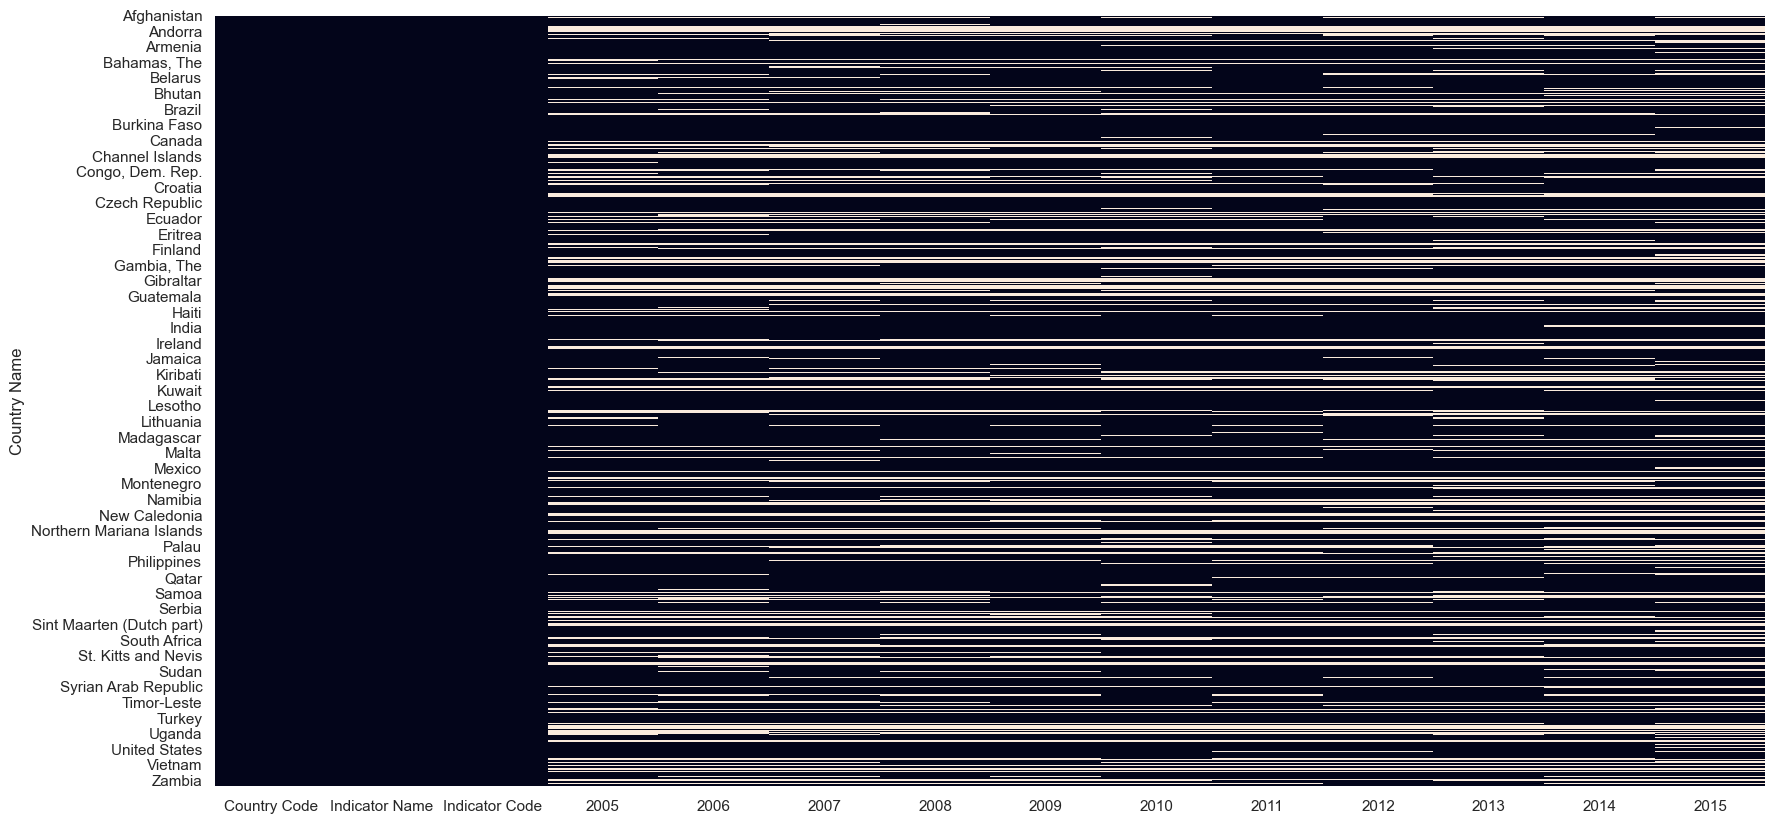

In [116]:
#Représentation des variables
plt.figure(figsize=(20,10))
df_tmp=dfCopy.set_index('Country Name')
sns.heatmap(df_tmp.isna(), cbar=False)
plt.show()  

**Les 3 premieres variables(Country Code, Indicator Name, Indicator Code) sont 100% renseignés** 

In [117]:
#Desciptions des valeurs quantitatives 
dfCopy.describe().T

count          mean           std       min        25%         50%   
2005  857.0  1.363240e+06  1.112927e+07  0.000000  27.000000   95.181824  \
2006  845.0  1.398956e+06  1.135925e+07  0.000000  29.400000   95.909431   
2007  850.0  1.404197e+06  1.144928e+07  0.000000  32.067403   94.968021   
2008  847.0  1.419803e+06  1.156104e+07  0.000000  34.730000   95.246277   
2009  853.0  1.417364e+06  1.158070e+07  0.000000  36.600000   95.568558   
2010  852.0  1.424123e+06  1.161633e+07  0.000000  40.509688   95.970631   
2011  865.0  1.405001e+06  1.152577e+07  0.000000  41.378860   94.819687   
2012  851.0  1.427483e+06  1.158335e+07  0.000000  45.871792   94.980324   
2013  830.0  1.461231e+06  1.166892e+07  0.900000  50.110503   99.907269   
2014  821.0  1.474099e+06  1.166412e+07  0.990000  53.192810  100.586227   
2015  784.0  1.540756e+06  1.186261e+07  1.083733  55.624874  102.685429   

               75%          max  
2005  26761.230462  218738389.0  
2006  32300.737142  222224219.0  
2007  31817.354008  225700990.0  
2008  32247.829063  229076220.0  
2009  30403.810016  232225988.0  
2010  30579.305376  235056806.0  
2011  30558.391279  237548472.0  
2012  31181.988099  239713636.0  
2013  33564.909579  241535030.0  
2014  33945.843878  243002731.0  
2015  41960.797398  244120201.0

In [118]:
#Moyennes des valeurs manquantes
dfCopy.isna().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2005              0.210138
2006              0.221198
2007              0.216590
2008              0.219355
2009              0.213825
2010              0.214747
2011              0.202765
2012              0.215668
2013              0.235023
2014              0.243318
2015              0.277419
dtype: float64

In [119]:
#dataframe final de dataCountry 
df_country_final.head()

Country Code                     Region          Income Group
0          ABW  Latin America & Caribbean  High income: nonOECD
1          AFG                 South Asia            Low income
2          AGO         Sub-Saharan Africa   Upper middle income
3          ALB      Europe & Central Asia   Upper middle income
4          AND      Europe & Central Asia  High income: nonOECD

In [120]:
#Fusion de df_country_final et le dfCopy
df_final = pd.merge(dfCopy,df_country_final, left_on='Country Code', right_on='Country Code', how='left')
df_final.drop(columns=['Country Code'],inplace=True)
df_final.columns

Index(['Country Name', 'Indicator Name', 'Indicator Code', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       'Region', 'Income Group'],
      dtype='object')

In [121]:
#Le nombre de lignes et de colonnes
df_final.shape

(1085, 16)

In [122]:
#Afficher les lignes dont les régions sont manquantes
df_final[df_final['Region'].isna()]

Country Name   
135  British Virgin Islands  \
136  British Virgin Islands   
137  British Virgin Islands   
138  British Virgin Islands   
139  British Virgin Islands   

                                        Indicator Name     Indicator Code   
135  GDP per capita, PPP (constant 2011 internation...  NY.GDP.PCAP.PP.KD  \
136   Gross enrolment ratio, secondary, both sexes (%)        SE.SEC.ENRR   
137    Gross enrolment ratio, tertiary, both sexes (%)        SE.TER.ENRR   
138                    Internet users (per 100 people)     IT.NET.USER.P2   
139                      Population, ages 15-24, total  SP.POP.1524.TO.UN   

           2005        2006        2007  2008       2009        2010   
135         NaN         NaN         NaN   NaN        NaN         NaN  \
136  106.689339  108.052948  103.224068   NaN  97.002998  101.602402   
137         NaN         NaN         NaN   NaN  62.487099         NaN   
138         NaN         NaN         NaN   NaN        NaN         NaN   
139         NaN         NaN         NaN   NaN        NaN         NaN   

          2011       2012       2013       2014       2015 Region Income Group  
135        NaN        NaN        NaN        NaN        NaN    NaN          NaN  
136  96.246246  97.603592  98.309303  97.737328  98.733559    NaN          NaN  
137        NaN        NaN        NaN        NaN  41.641491    NaN          NaN  
138        NaN        NaN        NaN        NaN        NaN    NaN          NaN  
139        NaN        NaN        NaN        NaN        NaN    NaN          NaN

Il y'a le pays **British Virgin Islands** qui n'a pas été rensigné dans **'EdStstCountry.csv'** d'ou les **Nan** pour les variables non renseignés. Ce pays se trouve en Amérique du Nord mais précisemment en 'Latin America & Caribbean'

In [123]:
# Le pays British Virgin Islands appartient à la région 'Latin America & Caribbean'
df_final.loc[[135,136,137,138,139], 'Region'] = ['Latin America & Caribbean','Latin America & Caribbean','Latin America & Caribbean','Latin America & Caribbean','Latin America & Caribbean']

In [124]:
#Groupes de revenus nan
df_final['Income Group'].unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD', nan], dtype=object)

In [125]:
#Recherche du groupe de revenu de British Virgin Islands
df_final[df_final['Region']=='Latin America & Caribbean' ]

Country Name   
30               Antigua and Barbuda  \
31               Antigua and Barbuda   
32               Antigua and Barbuda   
33               Antigua and Barbuda   
34               Antigua and Barbuda   
35                         Argentina   
36                         Argentina   
37                         Argentina   
38                         Argentina   
39                         Argentina   
45                             Aruba   
46                             Aruba   
47                             Aruba   
48                             Aruba   
49                             Aruba   
65                      Bahamas, The   
66                      Bahamas, The   
67                      Bahamas, The   
68                      Bahamas, The   
69                      Bahamas, The   
80                          Barbados   
81                          Barbados   
82                          Barbados   
83                          Barbados   
84                          Barbados   
95                            Belize   
96                            Belize   
97                            Belize   
98                            Belize   
99                            Belize   
115                          Bolivia   
116                          Bolivia   
117                          Bolivia   
118                          Bolivia   
119                          Bolivia   
130                           Brazil   
131                           Brazil   
132                           Brazil   
133                           Brazil   
134                           Brazil   
135           British Virgin Islands   
136           British Virgin Islands   
137           British Virgin Islands   
138           British Virgin Islands   
139           British Virgin Islands   
180                   Cayman Islands   
181                   Cayman Islands   
182                   Cayman Islands   
183                   Cayman Islands   
184                   Cayman Islands   
200                            Chile   
201                            Chile   
202                            Chile   
203                            Chile   
204                            Chile   
210                         Colombia   
211                         Colombia   
212                         Colombia   
213                         Colombia   
214                         Colombia   
230                       Costa Rica   
231                       Costa Rica   
232                       Costa Rica   
233                       Costa Rica   
234                       Costa Rica   
245                             Cuba   
246                             Cuba   
247                             Cuba   
248                             Cuba   
249                             Cuba   
250                          Curacao   
251                          Curacao   
252                          Curacao   
253                          Curacao   
254                          Curacao   
275                         Dominica   
276                         Dominica   
277                         Dominica   
278                         Dominica   
279                         Dominica   
280               Dominican Republic   
281               Dominican Republic   
282               Dominican Republic   
283               Dominican Republic   
284               Dominican Republic   
285                          Ecuador   
286                          Ecuador   
287                          Ecuador   
288                          Ecuador   
289                          Ecuador   
295                      El Salvador   
296                      El Salvador   
297                      El Salvador   
298                      El Salvador   
299                      El Salvador   
385                          Grenada   
386                          Grenada   
387                          Grenada   
388                          Grenada   
389                     

In [126]:
# Le pays British Virgin Islands appartient à la région 'Latin America & Caribbean' et groupe revenu est 'High income: nonOECD'
df_final.loc[[135,136,137,138,139], 'Income Group'] = ['High income: nonOECD', 'High income: nonOECD','High income: nonOECD','High income: nonOECD','High income: nonOECD']

In [127]:
#Recherche des groupes de revenus non-renseignés 
df_final.loc[df_final['Income Group'].isna()]

Country Name                                     Indicator Name   
370    Gibraltar  GDP per capita, PPP (constant 2011 internation...  \
371    Gibraltar   Gross enrolment ratio, secondary, both sexes (%)   
372    Gibraltar    Gross enrolment ratio, tertiary, both sexes (%)   
373    Gibraltar                    Internet users (per 100 people)   
374    Gibraltar                      Population, ages 15-24, total   
685        Nauru  GDP per capita, PPP (constant 2011 internation...   
686        Nauru   Gross enrolment ratio, secondary, both sexes (%)   
687        Nauru    Gross enrolment ratio, tertiary, both sexes (%)   
688        Nauru                    Internet users (per 100 people)   
689        Nauru                      Population, ages 15-24, total   

        Indicator Code       2005       2006       2007       2008   2009   
370  NY.GDP.PCAP.PP.KD        NaN        NaN        NaN        NaN    NaN  \
371        SE.SEC.ENRR        NaN        NaN        NaN        NaN    NaN   
372        SE.TER.ENRR        NaN        NaN        NaN        NaN    NaN   
373     IT.NET.USER.P2  39.070131  45.298648  51.610000  58.000000  65.07   
374  SP.POP.1524.TO.UN        NaN        NaN        NaN        NaN    NaN   
685  NY.GDP.PCAP.PP.KD        NaN        NaN        NaN        NaN    NaN   
686        SE.SEC.ENRR  47.244091  63.622169  53.535351  62.865952    NaN   
687        SE.TER.ENRR        NaN        NaN        NaN        NaN    NaN   
688     IT.NET.USER.P2        NaN        NaN        NaN        NaN    NaN   
689  SP.POP.1524.TO.UN        NaN        NaN        NaN        NaN    NaN   

     2010  2011       2012  2013       2014  2015  Region Income Group  
370   NaN   NaN        NaN   NaN        NaN   NaN  Autres          NaN  
371   NaN   NaN        NaN   NaN        NaN   NaN  Autres          NaN  
372   NaN   NaN        NaN   NaN        NaN   NaN  Autres          NaN  
373  65.0  65.0  65.017000   NaN        NaN   NaN  Autres          NaN  
374   NaN   NaN        NaN   NaN        NaN   NaN  Autres          NaN  
685   NaN   NaN        NaN   NaN        NaN   NaN  Autres          NaN  
686   NaN   NaN  79.278519   NaN  82.636658   NaN  Autres          NaN  
687   NaN   NaN        NaN   NaN        NaN   NaN  Autres          NaN  
688   NaN   NaN        NaN   NaN        NaN   NaN  Autres          NaN  
689   NaN   NaN        NaN   NaN        NaN   NaN  Autres          NaN

**Remarque** : Le pays **Gibraltar** appartient à la région **'Europe & Central Asia'** mais on est pas capable de savoir son **'Income Group'** selon nos recherches et nous remarquons aussi que les indicateurs sont quasiment non remplis. Ceci est valable aussi pour le pays **Nauru**, par conséquent, nous allons procéder  leurs suppréssions.

In [128]:
#Supprésssions des lignes
df_final.drop([370,371,372,373,374,685,686,687,688,689],axis=0, inplace=True)

In [142]:
#Affihcer les nombre de lignes et de colonnes restantes
df_final.shape

(1075, 16)

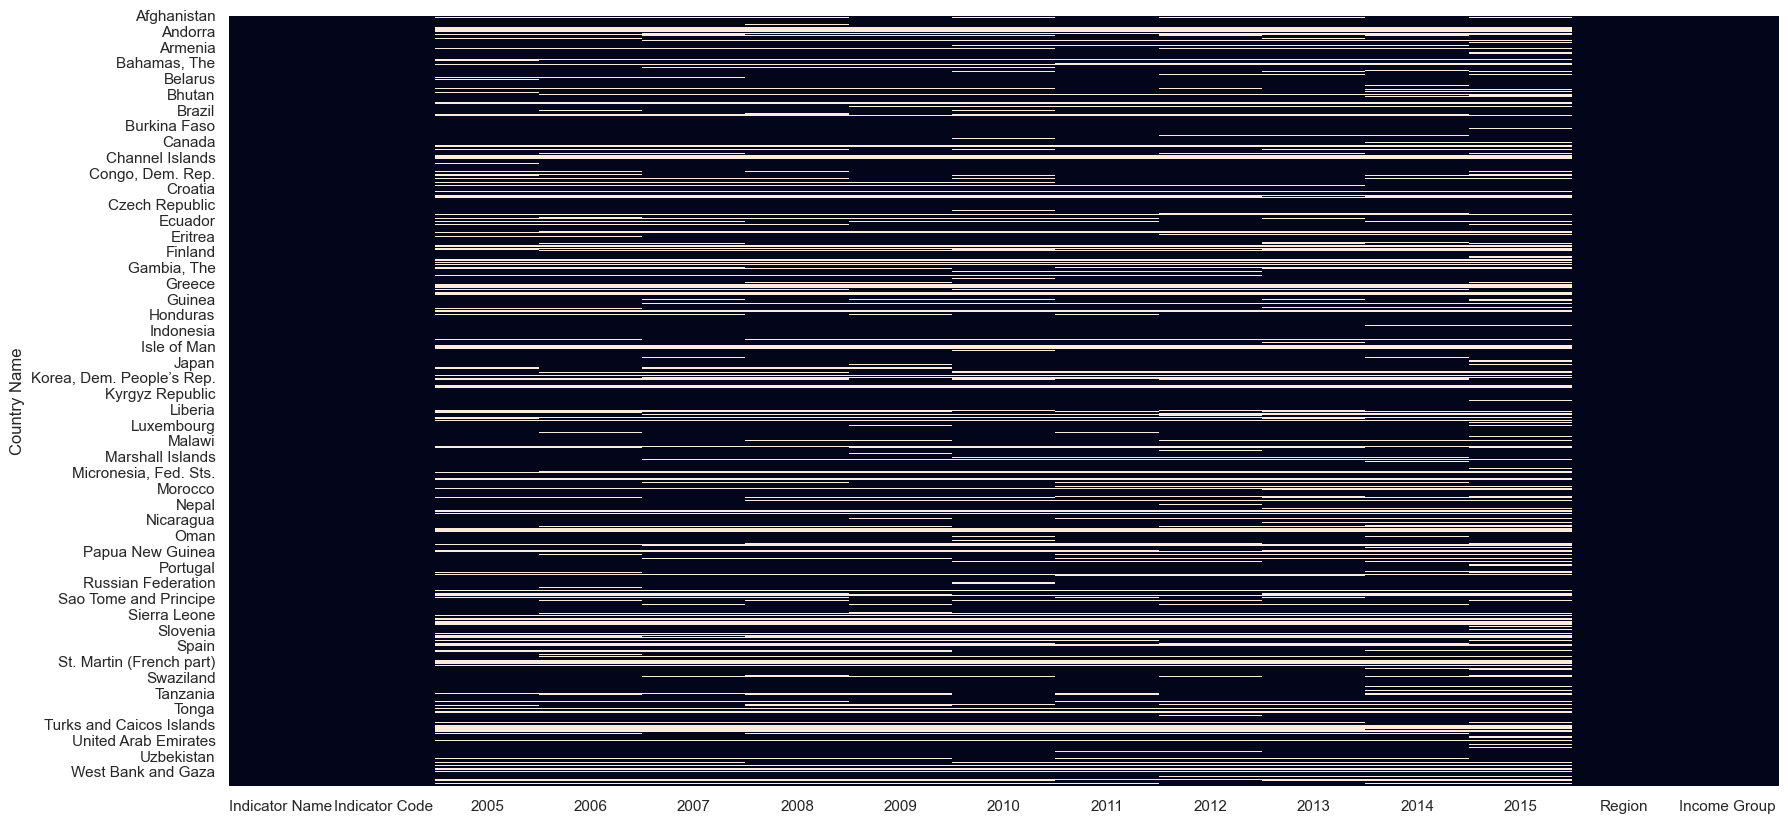

In [129]:
#Répartition des variables
plt.figure(figsize=(20,10))
df_tmp=df_final.set_index('Country Name')
sns.heatmap(df_tmp.isna(), cbar=False)
plt.show()

In [130]:
#Varaibles qualitatives
df_final.describe(include = 'O').T

count unique   
Country Name    1075    215  \
Indicator Name  1075      5   
Indicator Code  1075      5   
Region          1075      7   
Income Group    1075      5   

                                                              top freq  
Country Name                                          Afghanistan    5  
Indicator Name  GDP per capita, PPP (constant 2011 internation...  215  
Indicator Code                                  NY.GDP.PCAP.PP.KD  215  
Region                                      Europe & Central Asia  285  
Income Group                                  Upper middle income  275

**Nombre de pays 215**

## <span style='background:#c29c31'>7. Analyse des indicateurs retenus</span>

In [131]:
# Propagation des valeurs non nulles de 2005 vers 2015 pour travailler sur dernière valeur connue non nulle la plus récente en 2015
df_final_fillna=df_final.copy()
cols_to_interpolate=df_final_fillna.columns[4:-2].tolist()
#  Variables quantitatives
df_numeric = df_final_fillna[cols_to_interpolate]
# Variables qualitatives
df_categ = df_final_fillna.loc[:, ['Country Name', 'Indicator Name', 'Indicator Code', 'Income Group', 'Region']]
df_numeric.fillna(method='ffill', axis=1, inplace=True)
df_pays_fillna = pd.concat([df_categ, df_numeric], axis=1)
nb_pays=df_final_fillna['Country Name'].nunique()
# On ne conserve que la dernière année totalement remplie : 2015
df_final_2015=df_final_fillna[['Country Name','Indicator Name','Indicator Code', 'Region', 
                       'Income Group','2015']]
# # Dernière colonne remplie renommée en 'Last info'
df_final_2015.rename(columns={'2015': 'Last info'}, inplace=True)
# # La méthode fillna transforme tous les types en object ==> retransformer la dernière colonne en numérique
df_final_2015=df_final_2015.astype({'Last info': 'float64'})
df_final_2015.head()

Country Name                                     Indicator Name   
0  Afghanistan  GDP per capita, PPP (constant 2011 internation...  \
1  Afghanistan   Gross enrolment ratio, secondary, both sexes (%)   
2  Afghanistan    Gross enrolment ratio, tertiary, both sexes (%)   
3  Afghanistan                    Internet users (per 100 people)   
4  Afghanistan                      Population, ages 15-24, total   

      Indicator Code      Region Income Group     Last info  
0  NY.GDP.PCAP.PP.KD  South Asia   Low income  1.747978e+03  
1        SE.SEC.ENRR  South Asia   Low income  5.564441e+01  
2        SE.TER.ENRR  South Asia   Low income           NaN  
3     IT.NET.USER.P2  South Asia   Low income  8.260000e+00  
4  SP.POP.1524.TO.UN  South Asia   Low income  7.252785e+06

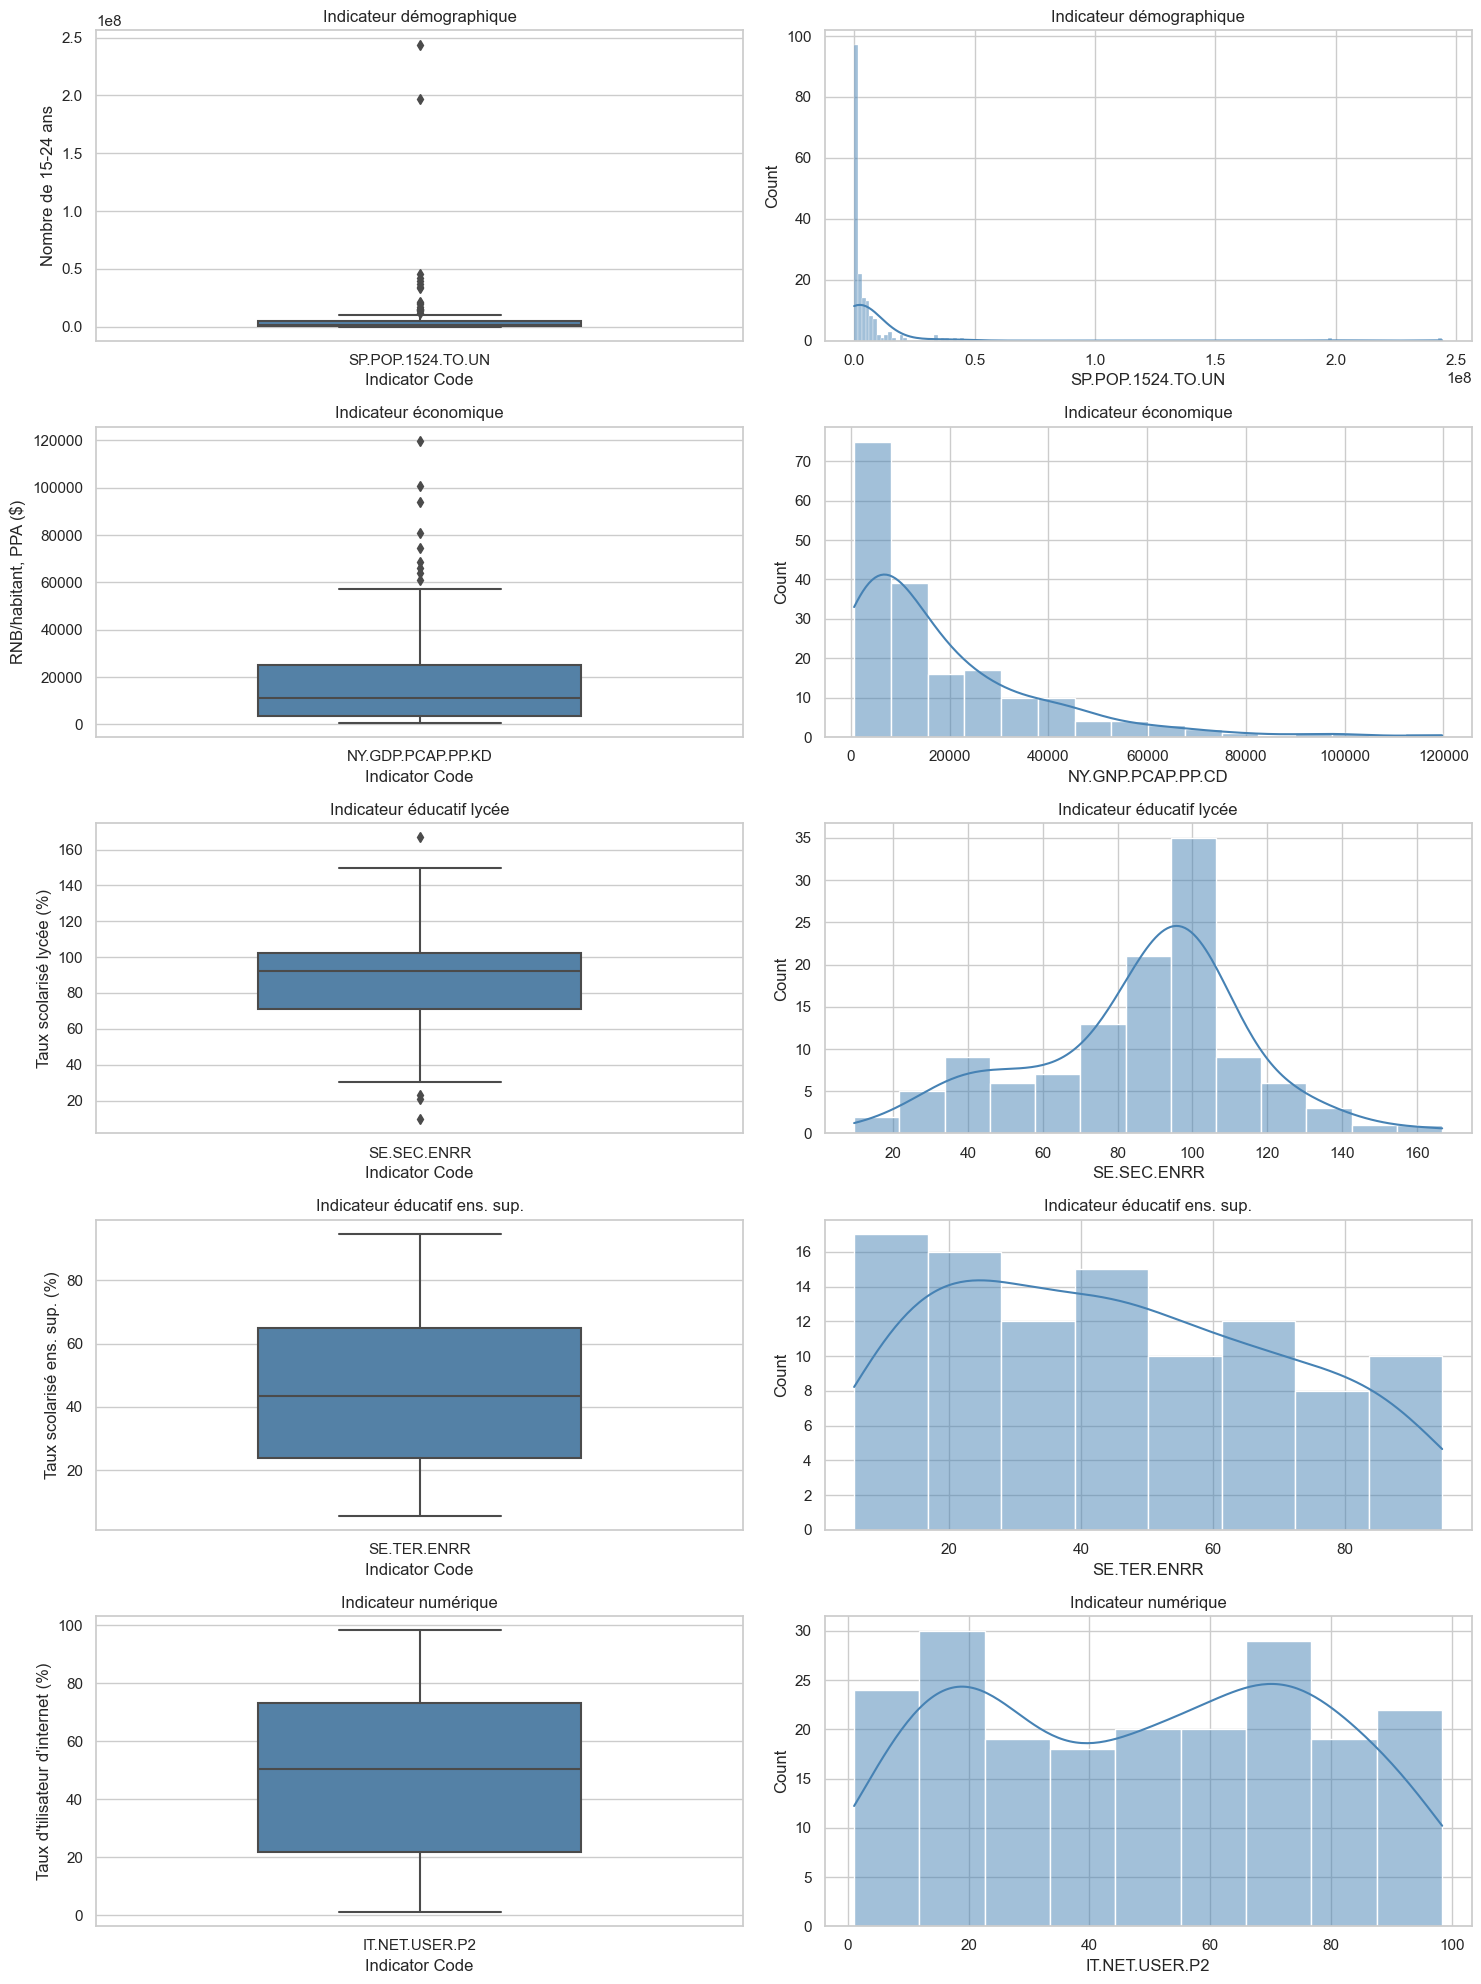

In [132]:
#Graphiques statistiques sur les 3 indicateurs  
plt.figure(figsize = (15, 20))

# ------------------------------------------------------------------------------------
# Indicateur démographique : SP.POP.1524.TO.UN
# ------------------------------------------------------------------------------------
df_pop=df_final_2015[df_final_2015['Indicator Code'] == 'SP.POP.1524.TO.UN']

plt.subplot(5,2,1)
sns.boxplot( x=df_pop['Indicator Code'], y=df_pop['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur démographique')
plt.ylabel('Nombre de 15-24 ans')

plt.subplot(5,2,2)
sns.histplot(df_pop['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur démographique')
plt.xlabel('SP.POP.1524.TO.UN')

# ------------------------------------------------------------------------------------
# Indicateur économique : NY.GDP.PCAP.PP.KD
# ------------------------------------------------------------------------------------
df_eco=df_final_2015[df_final_2015['Indicator Code'] == 'NY.GDP.PCAP.PP.KD']

plt.subplot(5,2,3)
sns.boxplot( x=df_eco['Indicator Code'], y=df_eco['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur économique')
plt.ylabel('RNB/habitant, PPA ($)')

plt.subplot(5,2,4)
sns.histplot(df_eco['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur économique')
plt.xlabel('NY.GNP.PCAP.PP.CD')

# ------------------------------------------------------------------------------------
# Indicateur éducatif lycée : SE.SEC.ENRR
# ------------------------------------------------------------------------------------
df_edu_sec=df_final_2015[df_final_2015['Indicator Code'] == 'SE.SEC.ENRR']

plt.subplot(5,2,5)
sns.boxplot( x=df_edu_sec['Indicator Code'], y=df_edu_sec['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.ylabel('Taux scolarisé lycée (%)')

plt.subplot(5,2,6)
sns.histplot(df_edu_sec['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.xlabel('SE.SEC.ENRR')

# ------------------------------------------------------------------------------------
# Indicateur éducatif lycée : SE.TER.ENRR
# ------------------------------------------------------------------------------------
df_edu_ter=df_final_2015[df_final_2015['Indicator Code'] == 'SE.TER.ENRR']

plt.subplot(5,2,7)
sns.boxplot( x=df_edu_ter['Indicator Code'], y=df_edu_ter['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur éducatif ens. sup.')
plt.ylabel('Taux scolarisé ens. sup. (%)')

plt.subplot(5,2,8)
sns.histplot(df_edu_ter['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur éducatif ens. sup.')
plt.xlabel('SE.TER.ENRR')

# ------------------------------------------------------------------------------------
# Indicateur numérique : SE.TER.ENRR
# ------------------------------------------------------------------------------------
df_num=df_final_2015[df_final_2015['Indicator Code'] == 'IT.NET.USER.P2']

plt.subplot(5,2,9)
sns.boxplot( x=df_num['Indicator Code'], y=df_num['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur numérique')
plt.ylabel('Taux d\'tilisateur d\'internet (%)')

plt.subplot(5,2,10)
sns.histplot(df_num['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur numérique')
plt.xlabel('IT.NET.USER.P2')

plt.tight_layout()

## <span style='background:#c29c31'>8. Scoring</span>

In [133]:
# Interpolation des valeurs par régression linéaire
df_interpolna=df_final.copy()
cols_to_interpolate=df_interpolna.columns[3:-2].tolist()
#  Variables quantitatives
df_numeric = df_interpolna[cols_to_interpolate]
# Variables qualitatives
df_categ = df_interpolna.loc[:, ['Country Name', 'Indicator Name', 'Indicator Code', 'Income Group', 'Region']]
df_numeric.interpolate(method='linear', axis=1, inplace=True)
df_final_all = pd.concat([df_categ, df_numeric], axis=1)
df_final_all.head()

Country Name                                     Indicator Name   
0  Afghanistan  GDP per capita, PPP (constant 2011 internation...  \
1  Afghanistan   Gross enrolment ratio, secondary, both sexes (%)   
2  Afghanistan    Gross enrolment ratio, tertiary, both sexes (%)   
3  Afghanistan                    Internet users (per 100 people)   
4  Afghanistan                      Population, ages 15-24, total   

      Indicator Code Income Group      Region          2005          2006   
0  NY.GDP.PCAP.PP.KD   Low income  South Asia  1.136123e+03  1.161125e+03  \
1        SE.SEC.ENRR   Low income  South Asia  1.978370e+01  2.993046e+01   
2        SE.TER.ENRR   Low income  South Asia           NaN           NaN   
3     IT.NET.USER.P2   Low income  South Asia  1.224148e+00  2.107124e+00   
4  SP.POP.1524.TO.UN   Low income  South Asia  4.910340e+06  5.134377e+06   

           2007          2008          2009          2010          2011   
0  1.284775e+03  1.298143e+03  1.531174e+03  1.614255e+03  1.660740e+03  \
1  3.008316e+01  4.022338e+01  4.673276e+01  5.324683e+01  5.461618e+01   
2           NaN           NaN  3.903390e+00  3.829685e+00  3.755980e+00   
3  1.900000e+00  1.840000e+00  3.550000e+00  4.000000e+00  5.000000e+00   
4  5.367499e+06  5.606736e+06  5.848604e+06  6.090239e+06  6.330684e+06   

           2012          2013          2014          2015  
0  1.839274e+03  1.814156e+03  1.780382e+03  1.747978e+03  
1  5.667734e+01  5.668866e+01  5.565616e+01  5.564441e+01  
2  5.391587e+00  7.027193e+00  8.662800e+00  8.662800e+00  
3  5.454545e+00  5.900000e+00  7.000000e+00  8.260000e+00  
4  6.569239e+06  6.803785e+06  7.032072e+06  7.252785e+06

In [134]:
#Création du dataframe pour le score , sur l'année 2015
dfFinalAll = df_final_all.copy()
df_score = dfFinalAll.pivot(index= 'Country Name', columns = 'Indicator Code')['2015']
df_score

Indicator Code                  IT.NET.USER.P2  NY.GDP.PCAP.PP.KD   
Country Name                                                        
Afghanistan                           8.260000        1747.978457  \
Albania                              63.252933       10971.223704   
Algeria                              38.200000       13724.723853   
American Samoa                             NaN                NaN   
Andorra                              96.910000                NaN   
Angola                               12.400000        6231.067992   
Antigua and Barbuda                  70.000000       20154.947488   
Argentina                            68.043064       19101.297392   
Armenia                              59.102378        8195.933650   
Aruba                                88.661227       35973.780510   
Australia                            84.560519       43832.426221   
Austria                              83.940142       44288.928746   
Azerbaijan                           77.000000       16698.863653   
Bahamas, The                         78.000000       21081.112400   
Bahrain                              93.478301       43926.474036   
Bangladesh                           14.400000        3132.567540   
Barbados                             76.110000       16460.154113   
Belarus                              67.300000       17229.555190   
Belgium                              85.052900       41722.921863   
Belize                               41.590000        8061.331831   
Benin                                11.254988        1987.167146   
Bermuda                              98.323610       50669.314770   
Bhutan                               39.800000        7743.337996   
Bolivia                              35.562271        6531.519398   
Bosnia and Herzegovina               65.065503       10931.976105   
Botswana                             37.312050       15356.457617   
Brazil                               58.327952       14666.018168   
British Virgin Islands                     NaN                NaN   
Brunei Darussalam                    71.200000       74600.164297   
Bulgaria                             56.656300       17000.068662   
Burkina Faso                         11.387646        1596.334538   
Burundi                               4.866224         748.415271   
Cabo Verde                           47.961624        5918.588450   
Cambodia                             19.000000        3290.952454   
Cameroon                             20.680148        3289.064546   
Canada                               88.470000       42983.100056   
Cayman Islands                       77.000000       49903.028540   
Central African Republic              3.800000         626.410873   
Chad                                  3.500000        2047.637179   
Channel Islands                            NaN                NaN   
Chile                                64.289000       22536.617688   
China                                50.300000       13569.891527   
Colombia                             55.904973       12985.383135   
Comoros                               7.459161        1413.059277   
Congo, Dem. Rep.                      3.800000         750.497342   
Congo, Rep.                           7.615975        5542.892982   
Costa Rica                           59.762950       14914.206746   
Cote d'Ivoire                        21.885208        3241.612056   
Croatia                              69.803100       20758.919322   
Cuba                                 37.305097                NaN   
Curacao                                    NaN                NaN   
Cyprus                               71.715900       30382.556027   
Czech Republic                       75.668839       30605.420521   
Denmark                              96.330500       45458.697149   
Djibouti                             11.922431        3139.273535   
Dominica                             65.000000        9941.894818  

In [135]:
#Afficher les colonnes
df_score.columns

Index(['IT.NET.USER.P2', 'NY.GDP.PCAP.PP.KD', 'SE.SEC.ENRR', 'SE.TER.ENRR',
       'SP.POP.1524.TO.UN'],
      dtype='object', name='Indicator Code')

<Axes: xlabel='Indicator Code', ylabel='Country Name'>

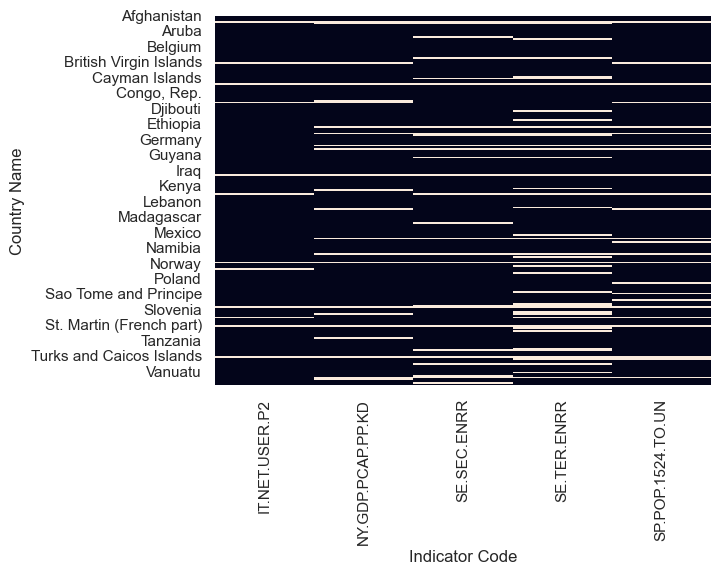

In [136]:
#Représentations des valeurs manquantes
sns.heatmap(df_score.isna(), cbar=False) 

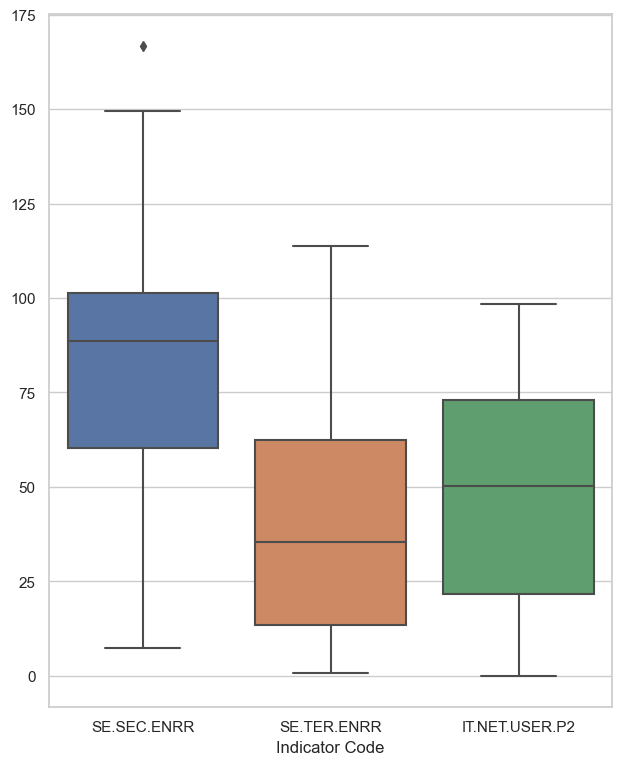

In [137]:
plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(121)
sns.boxplot(data = df_score.loc[:,['SE.SEC.ENRR', 'SE.TER.ENRR','IT.NET.USER.P2']])
plt.show()

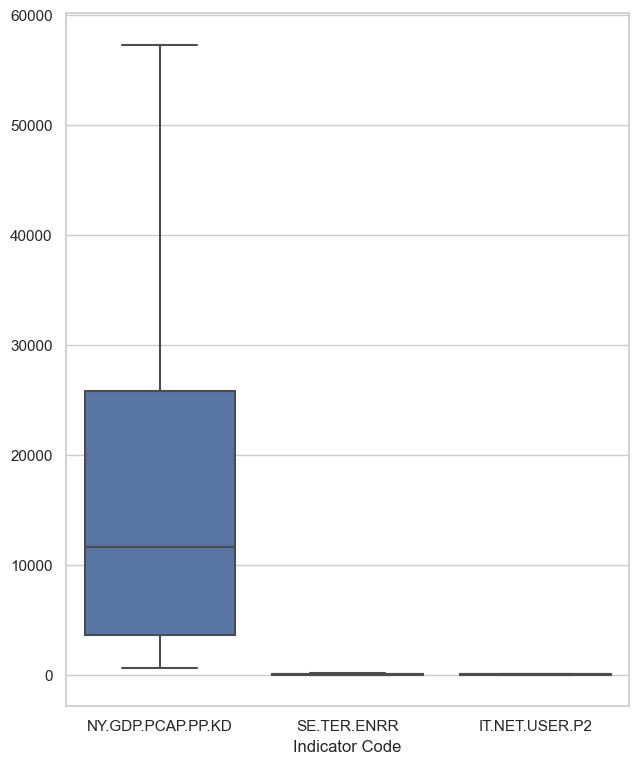

In [138]:
plt.rcParams["figure.figsize"] = [16,9]
plt.subplot(121)
sns.boxplot(data = df_score.loc[:,['NY.GDP.PCAP.PP.KD', 'SE.TER.ENRR','IT.NET.USER.P2']],showfliers=False)
plt.show()

In [139]:
# Liste des pays avec au moins un indicateur manquant
s_pays_indic_manquant=df_score.notnull().sum(axis=1)
i_pays_indic_manquant=s_pays_indic_manquant[s_pays_indic_manquant<5].index
print(f'Nombre de pays à retirer : {len(i_pays_indic_manquant)}')
df_pays_retires=df_score.loc[i_pays_indic_manquant, :].sort_values(by='SP.POP.1524.TO.UN', ascending=False)
df_pays_retires

Nombre de pays à retirer : 59


Indicator Code                  IT.NET.USER.P2  NY.GDP.PCAP.PP.KD   
Country Name                                                        
Vietnam                              43.500000        5667.408901  \
Syrian Arab Republic                 29.979797                NaN   
Canada                               88.470000       42983.100056   
Korea, Dem. People’s Rep.             0.000000                NaN   
Zambia                               21.000000        3627.202041   
Haiti                                12.197700        1651.228445   
Somalia                               1.760000                NaN   
Azerbaijan                           77.000000       16698.863653   
Papua New Guinea                      7.900000        3866.513529   
Cuba                                 37.305097                NaN   
Sierra Leone                          6.344422        1315.973533   
Nicaragua                            19.704292        4960.912412   
Libya                                19.016080       11192.790639   
West Bank and Gaza                   57.424192                NaN   
United Arab Emirates                 90.500000       65975.375547   
Singapore                            79.012957       80892.064838   
Oman                                 66.133811       40138.951725   
Bosnia and Herzegovina               65.065503       10931.976105   
Gabon                                45.784537       16836.605906   
Trinidad and Tobago                  69.198471       31283.458015   
Equatorial Guinea                    21.320000       27572.587507   
Solomon Islands                      10.000465        2053.438806   
Suriname                             42.763828       14766.799180   
Maldives                             54.461955       14014.501168   
Bahamas, The                         78.000000       21081.112400   
Vanuatu                              22.351405        2806.789686   
Samoa                                25.407010        5558.791879   
Micronesia, Fed. Sts.                31.501081        3271.267021   
Tonga                                38.651272        5189.842453   
St. Vincent and the Grenadines       51.770000       10447.528389   
Kiribati                             12.997484        1967.301514   
Dominica                             65.000000        9941.894818   
Andorra                              96.910000                NaN   
Cayman Islands                       77.000000       49903.028540   
Palau                                      NaN       14982.407538   
American Samoa                             NaN                NaN   
British Virgin Islands                     NaN                NaN   
Channel Islands                            NaN                NaN   
Curacao                                    NaN                NaN   
Faroe Islands                        94.200000                NaN   
French Polynesia                     64.560210                NaN   
Greenland                            67.600443                NaN   
Guam                                 73.140000                NaN   
Isle of Man                                NaN                NaN   
Kosovo                                     NaN        9097.136991   
Liechtenstein                        96.641195                NaN   
Monaco                               93.363302                NaN   
Montenegro                           68.119581       15289.633611   
New Caledonia                        74.001753                NaN   
Northern Mariana Islands                   NaN                NaN   
Puerto Rico                          79.468769       33843.624082   
San Marino                           49.600000       56372.362423   
Serbia                               65.317025       13277.706646   
Sint Maarten (Dutch part)                  NaN                NaN   
South Sudan                                NaN        1964.634640   
St. Martin (French part)                   NaN                NaN  

**Remarque** : Le Canada est écarté a cause de l'indicateur sur le niveau universitaire qui n'a pas été renseigné alors qu'il est trés bien sur les autres indicateurs.
    

In [140]:
# On ne conserve que les pays avec les 5 indicateurs renseignés
df_score.dropna(thresh = 5, inplace=True)
print(f'Nombre de pays restant : {df_score.shape[0]}')

Nombre de pays restant : 156


In [141]:
#Variables quantitatives
df_score.describe().T

count          mean           std          min   
Indicator Code                                                      
IT.NET.USER.P2     156.0  4.786253e+01  2.866259e+01     1.083733  \
NY.GDP.PCAP.PP.KD  156.0  1.872463e+04  2.039199e+04   626.410873   
SE.SEC.ENRR        156.0  8.293319e+01  2.937117e+01    17.378010   
SE.TER.ENRR        156.0  3.870202e+01  2.870435e+01     0.797730   
SP.POP.1524.TO.UN  156.0  7.401479e+06  2.579392e+07  7102.000000   

                             25%           50%           75%           max  
Indicator Code                                                              
IT.NET.USER.P2         21.626706  4.891254e+01  7.285102e+01  9.832361e+01  
NY.GDP.PCAP.PP.KD    3649.435117  1.186094e+04  2.579567e+04  1.197494e+05  
SE.SEC.ENRR            60.411468  8.891774e+01  1.021638e+02  1.668085e+02  
SE.TER.ENRR            12.270108  3.484371e+01  6.361956e+01  1.138718e+02  
SP.POP.1524.TO.UN  499407.500000  1.452669e+06  5.526680e+06  2.441202e+08

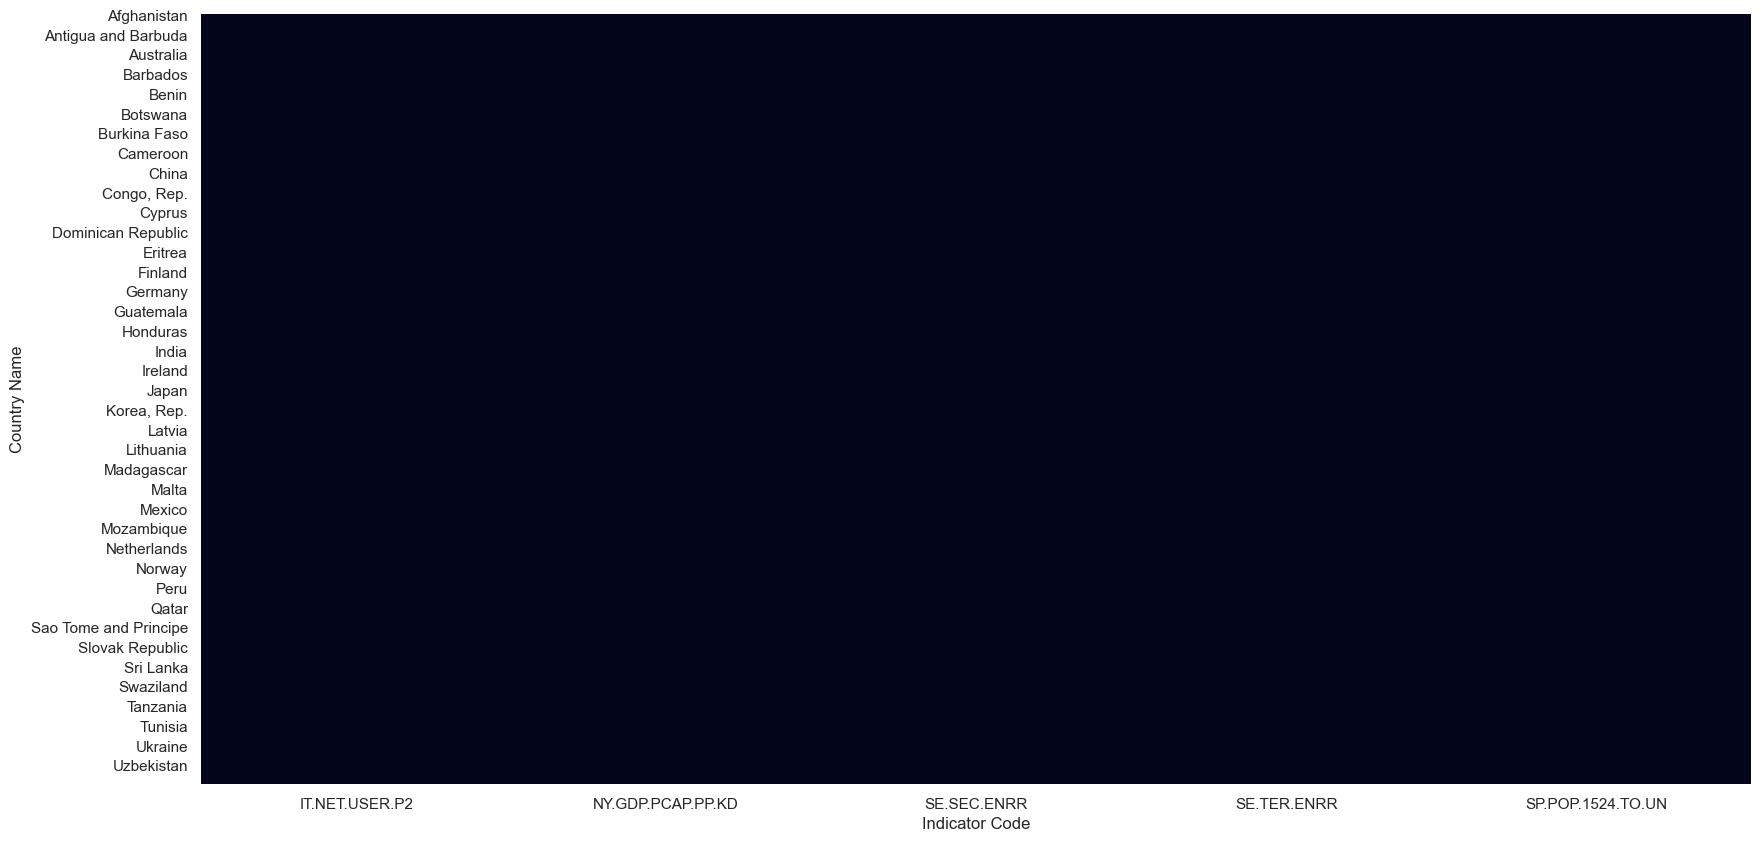

In [142]:
#Représentation des variables
plt.figure(figsize=(20,10))
sns.heatmap(df_score.isna(), cbar=False)
plt.show()

**Répartition des 5 indicateurs sur les 15 premiers pays** 

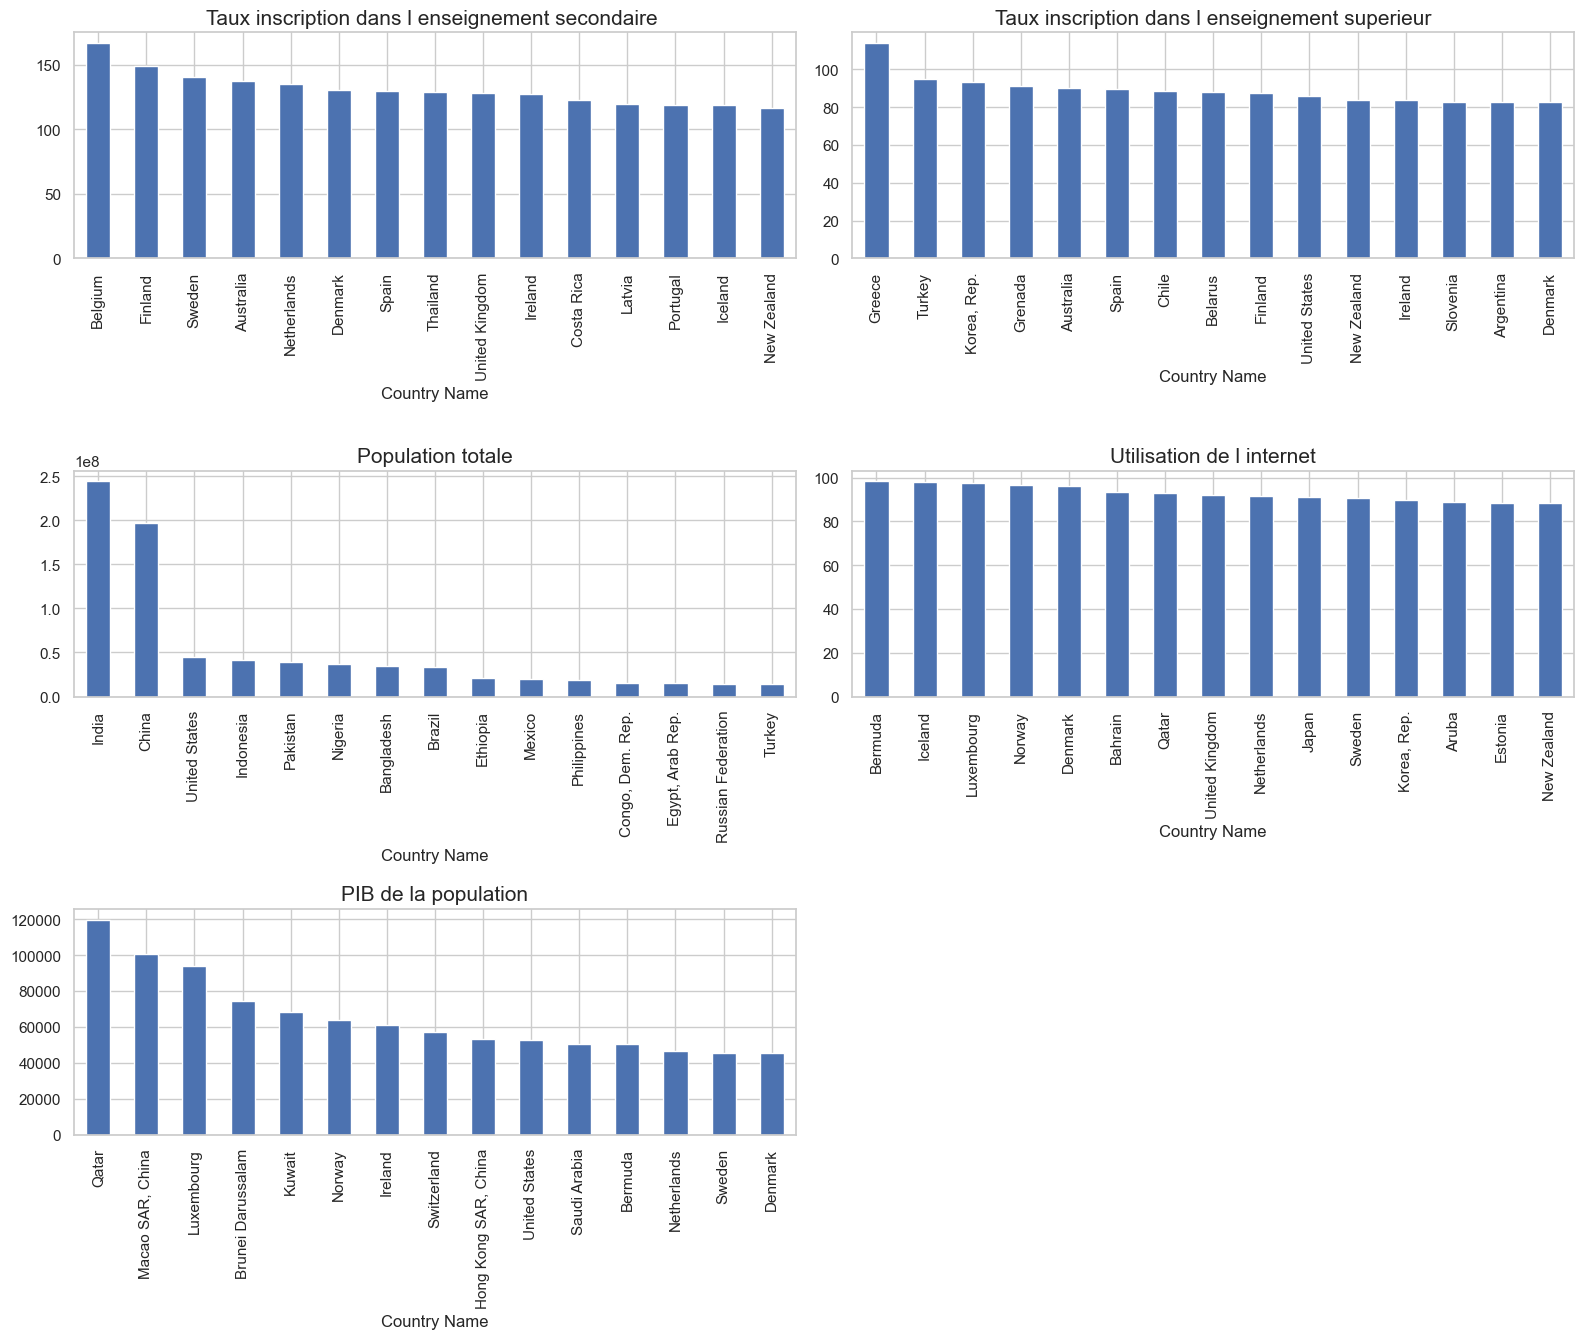

In [143]:
plt.rcParams["figure.figsize"] = [16, 16]
plt.tick_params(axis = 'both', labelsize = 15)
plt.subplot(4,2,1)
plt.title('Taux inscription dans l enseignement secondaire ').set_fontsize(15)
EdStatsData_indicateur_global = df_score.sort_values(by = 'SE.SEC.ENRR', ascending = False).head(15)
EdStatsData_indicateur_global['SE.SEC.ENRR'].plot( kind = 'bar')
plt.subplot(4,2,2)
plt.title('Taux inscription dans l enseignement superieur').set_fontsize(15)
EdStatsData_indicateur_global = df_score.sort_values(by = 'SE.TER.ENRR', ascending = False).head(15)
EdStatsData_indicateur_global['SE.TER.ENRR'].plot( kind = 'bar')
plt.subplot(4,2,3)
plt.title('Population totale').set_fontsize(15)
EdStatsData_indicateur_global = df_score.sort_values(by = 'SP.POP.1524.TO.UN', ascending = False).head(15)
EdStatsData_indicateur_global['SP.POP.1524.TO.UN'].plot( kind = 'bar')
plt.subplot(4,2,4)
plt.title('Utilisation de l internet').set_fontsize(15)
EdStatsData_indicateur_global = df_score.sort_values(by = 'IT.NET.USER.P2', ascending = False).head(15)
EdStatsData_indicateur_global['IT.NET.USER.P2'].plot( kind = 'bar')
plt.subplot(4,2,5)     
plt.title('PIB de la population').set_fontsize(15)
EdStatsData_indicateur_global = df_score.sort_values(by = 'NY.GDP.PCAP.PP.KD', ascending = False).head(15)
EdStatsData_indicateur_global['NY.GDP.PCAP.PP.KD'].plot( kind = 'bar')
plt.tight_layout()
plt.savefig('EdStatsData_indicateur_global.png')
plt.draw()

### <span style='colour:#20185e'>8.1. Normalisation des données</span>

In [144]:
#Les indicateurs retenus
indicateurs

['SP.POP.1524.TO.UN',
 'SE.SEC.ENRR',
 'SE.TER.ENRR',
 'IT.NET.USER.P2',
 'NY.GDP.PCAP.PP.KD']

**RobustScaler()**

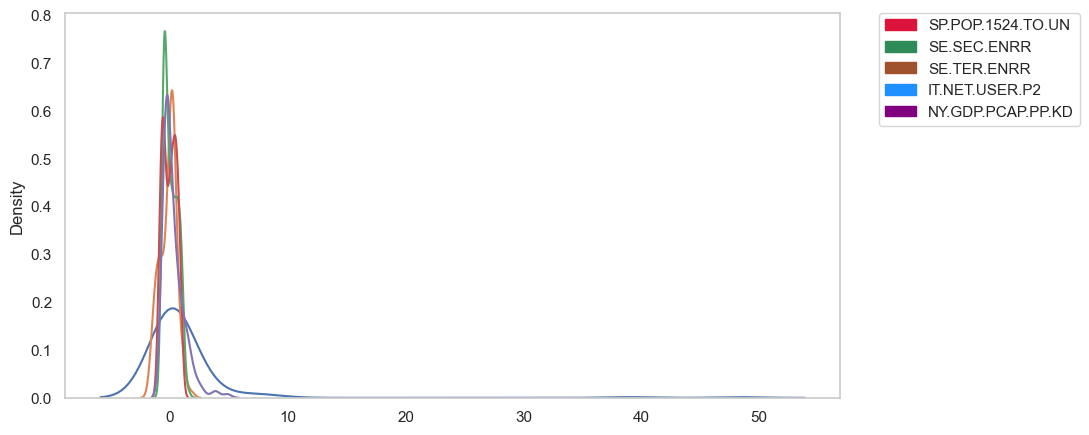

In [145]:
robust_scaler = RobustScaler()
robust_scaler_df = robust_scaler.fit_transform(df_score[indicateurs])
robust_scaler_df = pd.DataFrame(robust_scaler_df, columns=indicateurs)
plt.figure(figsize=(10,5))
axes = plt.axes()
label_patches = []
colors=['Crimson','SeaGreen','Sienna','DodgerBlue','Purple']
i=0
for col in robust_scaler_df.columns:
    label=col
    sns.kdeplot(robust_scaler_df[col])
    label_patch = mpatches.Patch(
        color=colors[i],
        label=label)
    label_patches.append(label_patch)
    i+=1
plt.xlabel('')
plt.legend(handles=label_patches, bbox_to_anchor=(1.05, 1)
           , loc=2, borderaxespad=0., facecolor='white')
plt.grid(False)
axes.set_facecolor('white')
plt.show()

**MinMaxScaler()**

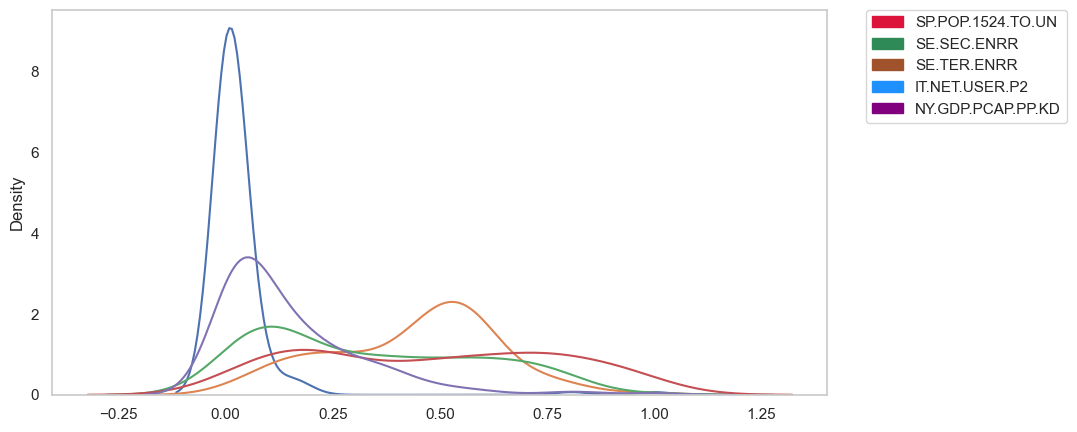

In [146]:
minmax_scaler = MinMaxScaler()
minmax_scaler_df = minmax_scaler.fit_transform(df_score[indicateurs])
minmax_scaler_df = pd.DataFrame(minmax_scaler_df, columns=indicateurs)
plt.figure(figsize=(10,5))
axes = plt.axes()
label_patches = []
colors=['Crimson','SeaGreen','Sienna','DodgerBlue','Purple']
i=0
for col in minmax_scaler_df.columns:
    label=col
    sns.kdeplot(minmax_scaler_df[col])
    label_patch = mpatches.Patch(
        color=colors[i],
        label=label)
    label_patches.append(label_patch)
    i+=1
plt.xlabel('')
plt.legend(handles=label_patches, bbox_to_anchor=(1.05, 1)
           , loc=2, borderaxespad=0., facecolor='white')
plt.grid(False)
axes.set_facecolor('white')
plt.show()

**MaxAbsScaler()**

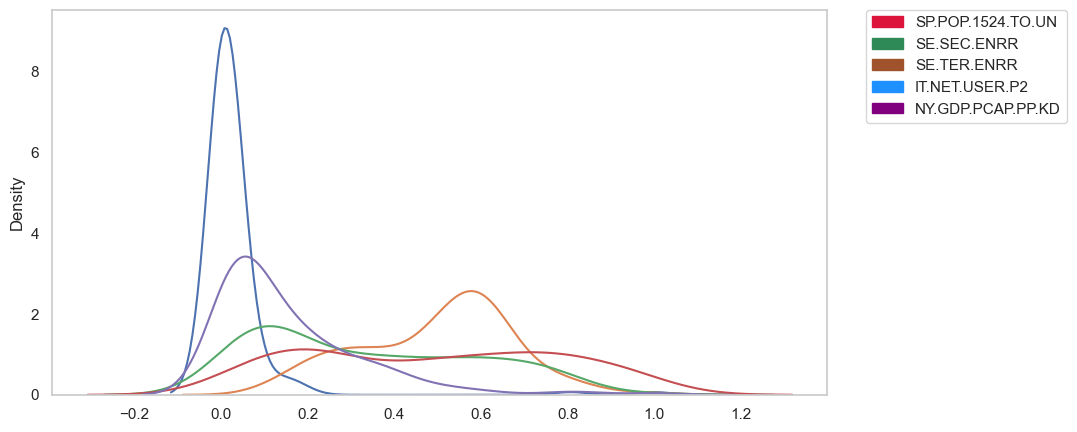

In [147]:
MaxAbs_scaler = MaxAbsScaler()
MaxAbs_scaler_df = MaxAbs_scaler.fit_transform(df_score[indicateurs])
MaxAbs_scaler_df = pd.DataFrame(MaxAbs_scaler_df, columns=indicateurs)
plt.figure(figsize=(10,5))
axes = plt.axes()
label_patches = []
colors=['Crimson','SeaGreen','Sienna','DodgerBlue','Purple']
i=0
for col in MaxAbs_scaler_df.columns:
    label=col
    sns.kdeplot(MaxAbs_scaler_df[col])
    label_patch = mpatches.Patch(
        color=colors[i],
        label=label)
    label_patches.append(label_patch)
    i+=1
plt.xlabel('')
plt.legend(handles=label_patches, bbox_to_anchor=(1.05, 1)
           , loc=2, borderaxespad=0., facecolor='white')
plt.grid(False)
axes.set_facecolor('white')
plt.show()

**PowerTransformer()**

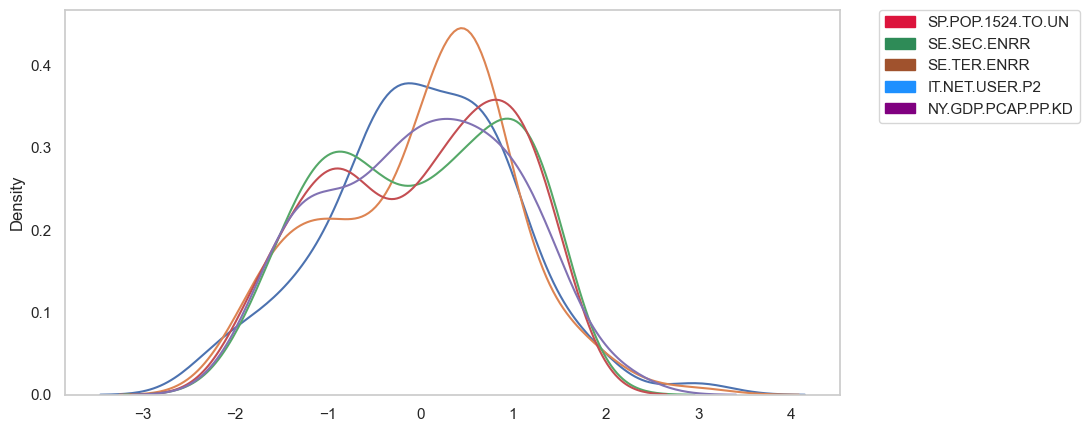

In [148]:
PowerTransformer_scaler = PowerTransformer()
PowerTransformer_scaler_df = PowerTransformer_scaler.fit_transform(df_score[indicateurs])
PowerTransformer_scaler_df = pd.DataFrame(PowerTransformer_scaler_df, columns=indicateurs)
plt.figure(figsize=(10,5))
axes = plt.axes()
label_patches = []
colors=['Crimson','SeaGreen','Sienna','DodgerBlue','Purple']
i=0
for col in PowerTransformer_scaler_df.columns:
    label=col
    sns.kdeplot(PowerTransformer_scaler_df[col])
    label_patch = mpatches.Patch(
        color=colors[i],
        label=label)
    label_patches.append(label_patch)
    i+=1
plt.xlabel('')
plt.legend(handles=label_patches, bbox_to_anchor=(1.05, 1)
           , loc=2, borderaxespad=0., facecolor='white')
plt.grid(False)
axes.set_facecolor('white')
plt.show()

Pour la mise a l'echelle des données nous choisirons le **PowerTransformer** car les données ne sont pas en répartition normale et il tient compte des outliers.

### <span style='colour:#20185e'>8.2. Calcul du score</span>



On divise chaque valeur par le maximum de sa colonne de façon à avoir des valeurs entre 0 et 1.
On va ensuite calculer la somme pondérée des colonnes pour avoir le score du pays.


In [149]:
#Fonction qui va calculer le score en fonction de l'année 
def Scoring(year):
    dfFinalAll = df_final_all.copy()
    nom_score = "Score"
    df_score = dfFinalAll.pivot(index= 'Country Name', columns = 'Indicator Code')[year]
    # Liste des pays avec au moins avec un indicateur manquant
    s_pays_indic_manquant=df_score.notnull().sum(axis=1)
    i_pays_indic_manquant=s_pays_indic_manquant[s_pays_indic_manquant<5].index
    print(f'Nombre de pays à retirer : {len(i_pays_indic_manquant)}')
    df_pays_retires=df_score.loc[i_pays_indic_manquant, :].sort_values(by='SP.POP.1524.TO.UN', ascending=False)
    # On ne conserve que les pays avec les 5 indicateurs renseignés
    df_score.dropna(thresh = 5, inplace=True)
    print(f'Nombre de pays restant : {df_score.shape[0]}')
    PowerTransformer_scaler = PowerTransformer()
    PowerTransformer_scaler_df = PowerTransformer_scaler.fit_transform(df_score[indicateurs])
    PowerTransformer_scaler_df = pd.DataFrame(PowerTransformer_scaler_df, columns=indicateurs)
    #Ajouter la variable 'Country Name'
    PowerTransformer_scaler_df['Country Name'] = df_score.index
    #création de score 
    # Diviser toutes les colonnes par leur valeur maximale pour obtenir des valeurs [0;1].
    PowerTransformer_scaler_df.iloc[:,:-1] = PowerTransformer_scaler_df.iloc[:,:-1].apply(lambda x: x / x.max())
    PowerTransformer_scaler_df[nom_score] = [(row[0] + row[1] + row[2] + row[3] + row[4]) for row in zip(PowerTransformer_scaler_df['IT.NET.USER.P2'], PowerTransformer_scaler_df['NY.GDP.PCAP.PP.KD'], PowerTransformer_scaler_df['SE.SEC.ENRR'], PowerTransformer_scaler_df['SE.TER.ENRR'], PowerTransformer_scaler_df['SP.POP.1524.TO.UN'])]

    return PowerTransformer_scaler_df

In [150]:
#Score pays pour l'année 2005
ref_score = Scoring('2005').sort_values(by='Score',ascending=False).head(15)
ref_score

Nombre de pays à retirer : 108
Nombre de pays restant : 107


SP.POP.1524.TO.UN  SE.SEC.ENRR  SE.TER.ENRR  IT.NET.USER.P2   
103           0.673169     0.223590     0.885496        0.850674  \
4             0.114672     1.000000     0.761937        0.805895   
25           -0.210542     0.629016     0.865182        0.969172   
75           -0.219945     0.478239     0.841983        0.963606   
50            0.302461     0.190492     0.982488        0.897392   
71            0.038410     0.557474     0.588162        0.956193   
30           -0.191438     0.450872     1.000000        0.905356   
95           -0.078667     0.339693     0.884162        0.984461   
102           0.327241     0.357558     0.577092        0.868195   
47            0.447797     0.296472     0.516219        0.841473   
91            0.244969     0.530930     0.695108        0.648369   
72           -0.214159     0.568806     0.867864        0.803285   
31            0.325854     0.455210     0.523419        0.586848   
8            -0.053791     0.399364     0.612223        0.735598   
45            0.270643     0.259226     0.650464        0.476792   

     NY.GDP.PCAP.PP.KD    Country Name     Score  
103           0.620918   United States  3.253847  
4             0.510853       Australia  3.193356  
25            0.571401         Denmark  2.824230  
75            0.728490          Norway  2.792373  
50            0.332414     Korea, Rep.  2.705246  
71            0.560685     Netherlands  2.700923  
30            0.513780         Finland  2.678569  
95            0.536868          Sweden  2.666518  
102           0.491418  United Kingdom  2.621503  
47            0.473553           Japan  2.575514  
91            0.439012           Spain  2.558388  
72            0.428024     New Zealand  2.453821  
31            0.483908          France  2.375239  
8             0.521409         Belgium  2.214804  
45            0.496587           Italy  2.153712

Text(0, 0.5, 'Score du pays 2005')

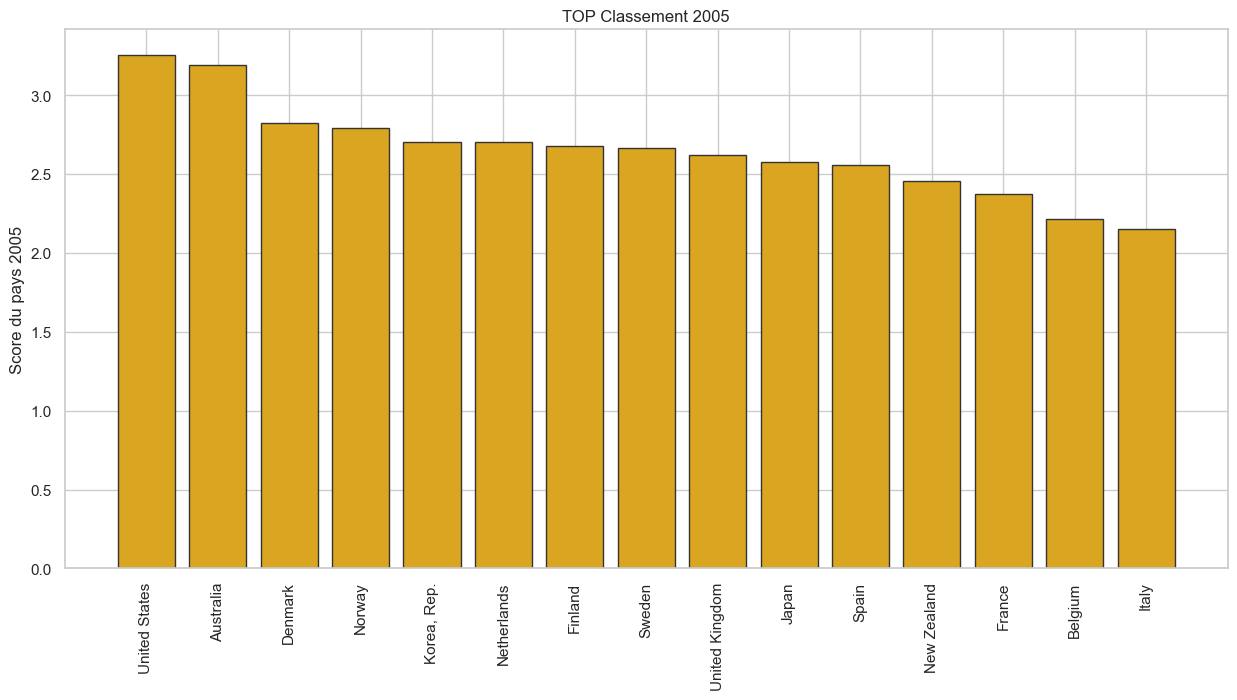

In [151]:
fig8 = plt.figure(figsize=(15,7))

plt.xticks(rotation = 90)
plt.bar(ref_score["Country Name"], ref_score["Score"], color="goldenrod", edgecolor="#333333")
plt.title("TOP Classement 2005")
plt.ylabel("Score du pays 2005")

In [152]:
#Score pays pour l'année 2010
ref_score = Scoring('2010').sort_values(by='Score',ascending=False).head(15)
ref_score

Nombre de pays à retirer : 74
Nombre de pays restant : 141


SP.POP.1524.TO.UN  SE.SEC.ENRR  SE.TER.ENRR  IT.NET.USER.P2   
7             0.107228     1.000000     0.772521        0.804163  \
136           0.642672     0.246062     0.915274        0.751327   
97            0.038638     0.804467     0.583220        0.971525   
118           0.192020     0.830322     0.747018        0.675779   
101          -0.164500     0.604581     0.679226        1.000000   
72            0.260381     0.278215     0.969925        0.894036   
36           -0.152758     0.731616     0.687995        0.949846   
45           -0.156419     0.488279     0.914159        0.929738   
46            0.287640     0.567090     0.475664        0.819489   
98           -0.165299     0.719089     0.790420        0.856883   
135           0.297430     0.386216     0.502456        0.908687   
68            0.385316     0.380595     0.488828        0.830524   
124          -0.047614     0.316969     0.700638        0.963755   
64           -0.171935     0.811285     0.555870        0.728161   
13           -0.042865     0.459736     0.615669        0.792076   

     NY.GDP.PCAP.PP.KD    Country Name     Score  
7             0.532198       Australia  3.216110  
136           0.603574   United States  3.158909  
97            0.570609     Netherlands  2.968459  
118           0.436447           Spain  2.881586  
101           0.699805          Norway  2.819112  
72            0.409642     Korea, Rep.  2.812198  
36            0.556831         Denmark  2.773529  
45            0.517048         Finland  2.692804  
46            0.486141          France  2.636024  
98            0.433371     New Zealand  2.634464  
135           0.480670  United Kingdom  2.575460  
68            0.473893           Japan  2.559157  
124           0.547043          Sweden  2.480791  
64            0.557124         Ireland  2.480505  
13            0.529291         Belgium  2.353907

Text(0, 0.5, 'Score du pays 2010')

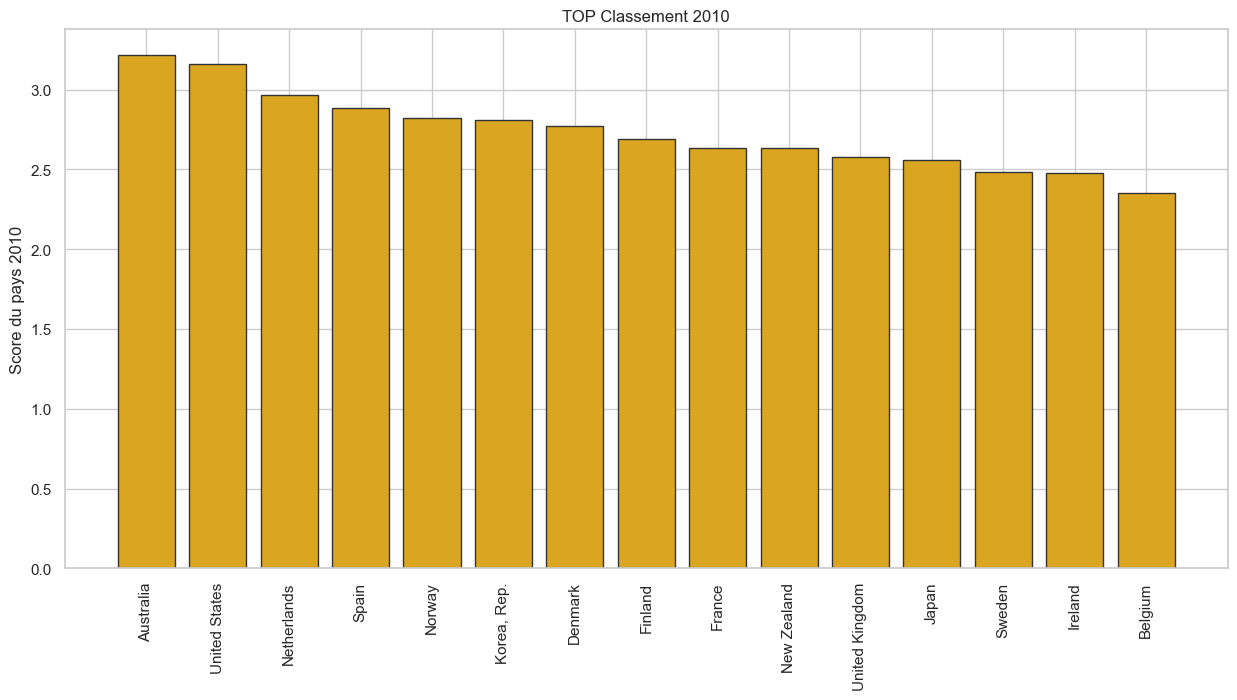

In [153]:
fig8 = plt.figure(figsize=(15,7))

plt.xticks(rotation = 90)
plt.bar(ref_score["Country Name"], ref_score["Score"], color="goldenrod", edgecolor="#333333")
plt.title("TOP Classement 2010")
plt.ylabel("Score du pays 2010")

In [157]:
#Score pays pour l'année 2015
ref_score = Scoring('2015').sort_values(by='Score',ascending=False).head(15)
ref_score

Nombre de pays à retirer : 59
Nombre de pays restant : 156


SP.POP.1524.TO.UN  SE.SEC.ENRR  SE.TER.ENRR  IT.NET.USER.P2   
14           -0.034128     1.000000     0.627389        0.777344  \
8             0.111453     0.641310     0.786069        0.768859   
108           0.046767     0.615943     0.665094        0.890675   
150           0.633104     0.163613     0.741121        0.592508   
52           -0.142363     0.786306     0.756173        0.800850   
42           -0.125567     0.559686     0.710287        0.967260   
149           0.287379     0.523330     0.403491        0.895304   
131           0.179748     0.547440     0.779817        0.666329   
80            0.254098     0.179067     0.813943        0.855733   
137          -0.049090     0.676484     0.478261        0.871956   
112          -0.140482     0.345820     0.645588        0.975162   
72           -0.157791     0.519362     0.720520        0.691590   
56            0.308993     0.223562     0.550326        0.820793   
76            0.372584     0.212729     0.491404        0.879491   
53            0.283409     0.317943     0.503993        0.771170   

     NY.GDP.PCAP.PP.KD    Country Name     Score  
14            0.522412         Belgium  2.893017  
8             0.543407       Australia  2.851098  
108           0.568670     Netherlands  2.787149  
150           0.624837   United States  2.755184  
52            0.492655         Finland  2.693621  
42            0.558996         Denmark  2.670662  
149           0.492149  United Kingdom  2.601654  
131           0.415321           Spain  2.588654  
80            0.438780     Korea, Rep.  2.541621  
137           0.561073          Sweden  2.538684  
112           0.709012          Norway  2.535101  
72            0.688461         Ireland  2.462142  
56            0.544434         Germany  2.448108  
76            0.480960           Japan  2.437168  
53            0.480379          France  2.356894

Text(0, 0.5, 'Score du pays 2015')

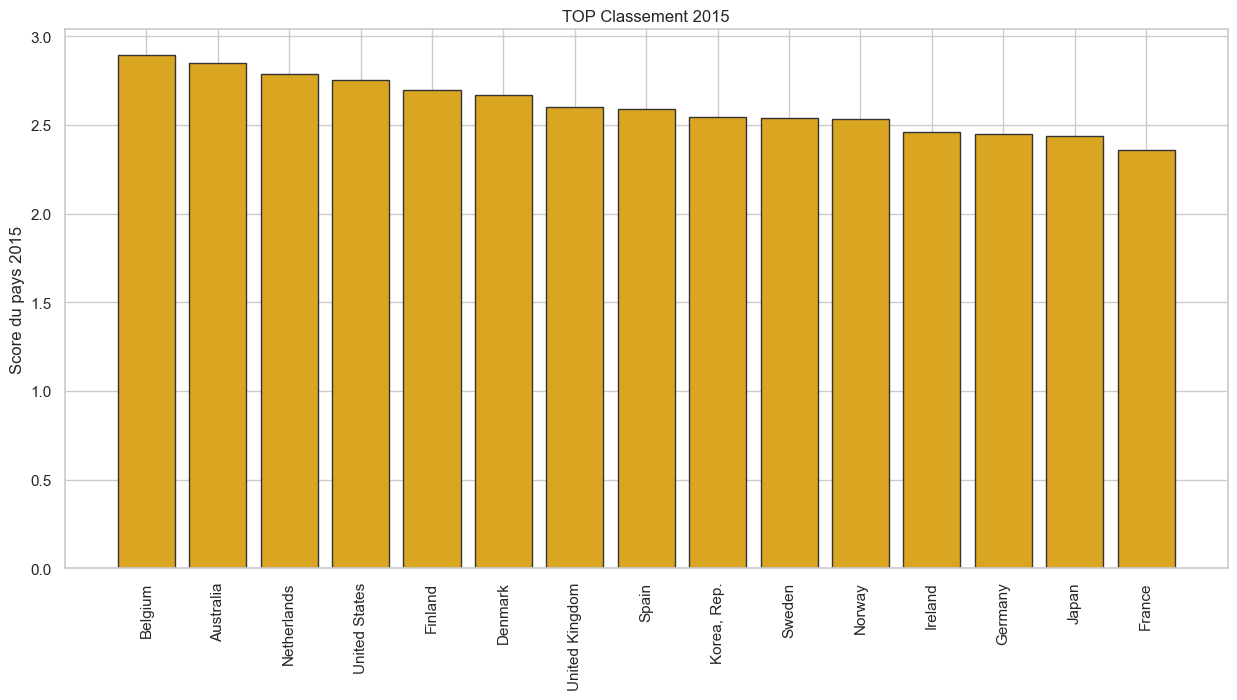

In [158]:
fig8 = plt.figure(figsize=(15,7))

plt.xticks(rotation = 90)
plt.bar(ref_score["Country Name"], ref_score["Score"], color="goldenrod", edgecolor="#333333")
plt.title("TOP Classement 2015")
plt.ylabel("Score du pays 2015")

Nous travaillons sur les données scorées de 2015 car il y'a plus de régions restantes et plus de données sur lequelles on pourrait travailler

In [159]:
ref_score_2015= Scoring('2015')
# Ajout de la région et du groupe de revenus
df = pd.DataFrame({'Country_Name' : df_final['Country Name'], 
                                 'Region' : df_final['Region'], 
                                 'Income Group' : df_final['Income Group']})
df_region = pd.merge(ref_score_2015, df, left_on='Country Name', right_on='Country_Name', how='inner')
df_region.drop(columns=['Country_Name'],inplace=True)
df_region.drop_duplicates(inplace=True)

# Constitution du dataframe de visualisation du regroupement par pays
df_region_score = df_region.groupby(['Region'])[['Score','NY.GDP.PCAP.PP.KD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN','IT.NET.USER.P2']].mean()

df_region_score=df_region_score.rename(columns = {'NY.GDP.PCAP.PP.KD': 'PIB',
                                       'SE.SEC.ENRR': 'Secondaire',
                                       'SE.TER.ENRR': 'Universitaire',
                                       'SP.POP.1524.TO.UN':'Pop',
                                       'IT.NET.USER.P2': 'Internet'})
df_region_score.sort_values(by='Score',ascending=False)

Nombre de pays à retirer : 59
Nombre de pays restant : 156


Score       PIB  Secondaire  Universitaire   
Region                                                                      
North America               1.655916  0.615341    0.013355       0.300483  \
Europe & Central Asia       1.492810  0.295117    0.294664       0.451286   
East Asia & Pacific         0.553561  0.138401    0.081726       0.172486   
Middle East & North Africa  0.418195  0.187012   -0.009321       0.030909   
Latin America & Caribbean   0.392096  0.061917    0.098532       0.176045   
South Asia                 -1.088458 -0.308636   -0.154066      -0.404614   
Sub-Saharan Africa         -2.113798 -0.459215   -0.378070      -0.618434   

                                 Pop  Internet  
Region                                          
North America              -0.069517  0.796254  
Europe & Central Asia      -0.052316  0.504058  
East Asia & Pacific         0.056982  0.103966  
Middle East & North Africa  0.006302  0.203294  
Latin America & Caribbean  -0.108668  0.164269  
South Asia                  0.352779 -0.573921  
Sub-Saharan Africa          0.038413 -0.696493

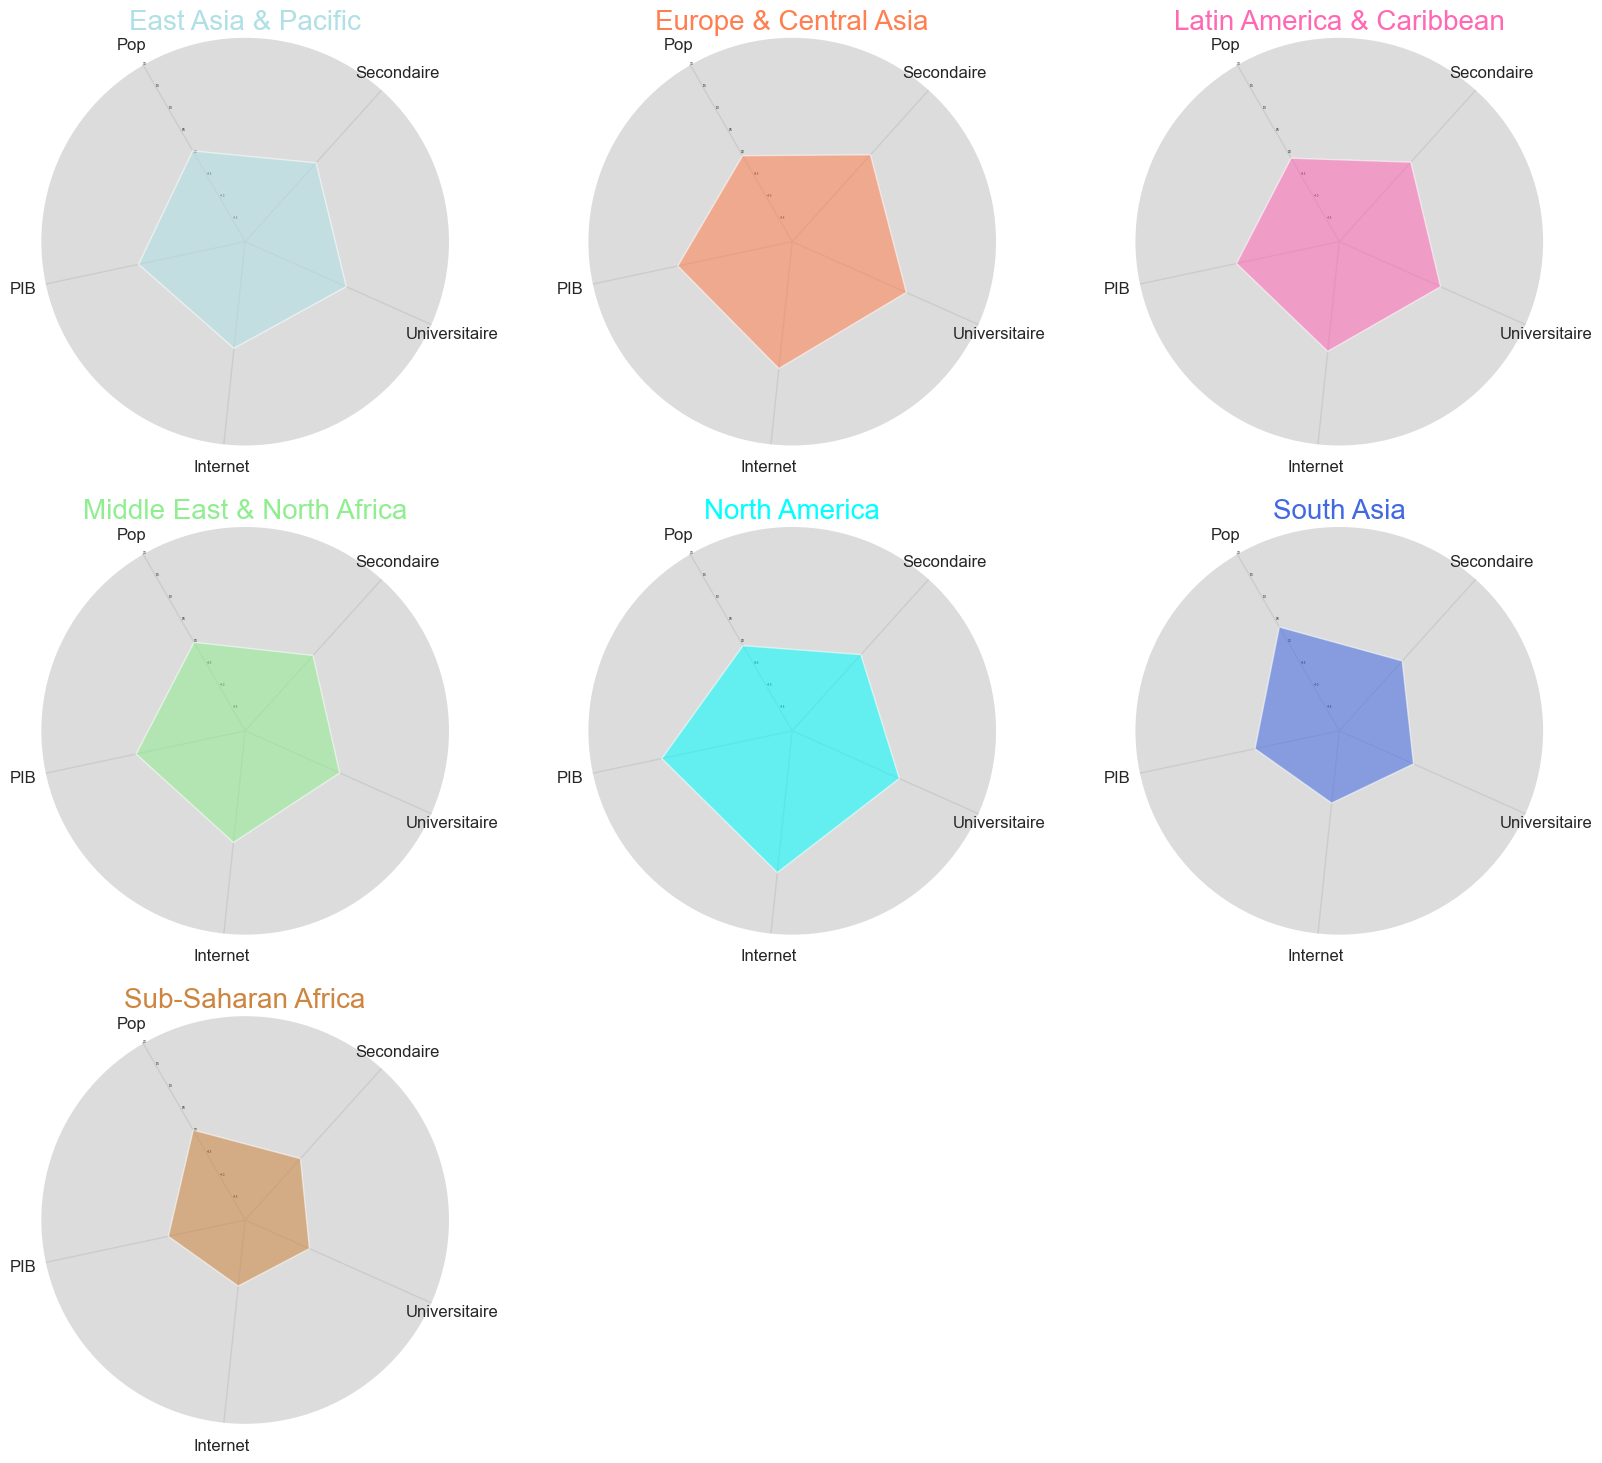

In [160]:
df_plot = df_region_score[['Pop','Secondaire','Universitaire','Internet','PIB',]]
plt.rc('axes', facecolor = 'Gainsboro')

# number of variable
categories=list(df_plot.columns)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]

 
fig = plt.figure(1, figsize=(20,18))
    
colors = ['PowderBlue', 'Coral', 'HotPink', 'LightGreen', 'Cyan', 'RoyalBlue','Peru']

for i, region in enumerate(df_plot.index) : 
    
    ax = fig.add_subplot(3,3,i+1, polar=True)

    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles, categories, size=8)
    plt.yticks(color="black", size=2)
    values=df_plot.iloc[i].values
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2,2)

plt.show()

4 régions se distinguent :

- 'North America', 
- 'Europe & Central Asia'
- 'East Asia & Pacific'.
- 'Latin America & Caribbean

Réprésentation sur une carte du monde

In [161]:
#Importation du dataset des pays du monde de geopandas

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 

# Dataset geopandas : code ISO-3166 alpha 3 et Nom court
df1=world.sort_values(by = ['iso_a3'])
df1=df1.loc[:,['iso_a3','name']]
df1=df1.rename(columns={'iso_a3':'ISO'})
df1=df1.set_index('ISO')

#  Dataset EdStatsCountry.csv : code ISO-3166 alpha 3 et Nom court
df2=dfCountry.sort_values(by = ['Country Code'])
df2=df2.loc[:,['Country Code','Short Name']]
df2=df2.rename(columns={'Country Code':'ISO'})
df2=df2.set_index('ISO')

# Fusion des 2 dataframes
df_comp_nom_pays= pd.merge(df1, df2, on='ISO', how='left')
df_comp_nom_pays.reset_index(inplace=True)

# Recherche des noms de pays différents entre geopandas et notre jeu de données
rows = df_comp_nom_pays[df_comp_nom_pays['name'] != df_comp_nom_pays['Short Name']]
rows.drop([0,7,8,39,50,56,144,163],inplace = True)

df_comp=rows[rows['Short Name'].notnull()].sort_values(by='ISO')
noms_a_changer=df_comp['Short Name'].tolist()
codes_iso=df_comp['ISO'].tolist()


# Récupération des index geopandas des noms de pays à changer
index_geo=world[world['iso_a3'].isin(codes_iso)].index
# Récupération des codes ISO 3 de geopandas
codes_isoa3=world.loc[index_geo,'iso_a3'].tolist()
# Parcours les codes ISO 3 pour avoir une liste de noms de pays dans l'ordre des index geopandas
noms_a_changer=[]
[noms_a_changer.append(df_comp[df_comp['ISO'] == iso]['Short Name'].tolist()[0]) for iso in codes_isoa3]
# Changement du libellé des noms courts des pays de geopandas par ceux de notre jeux de données
world.loc[world.index[index_geo.tolist()],'name']=noms_a_changer


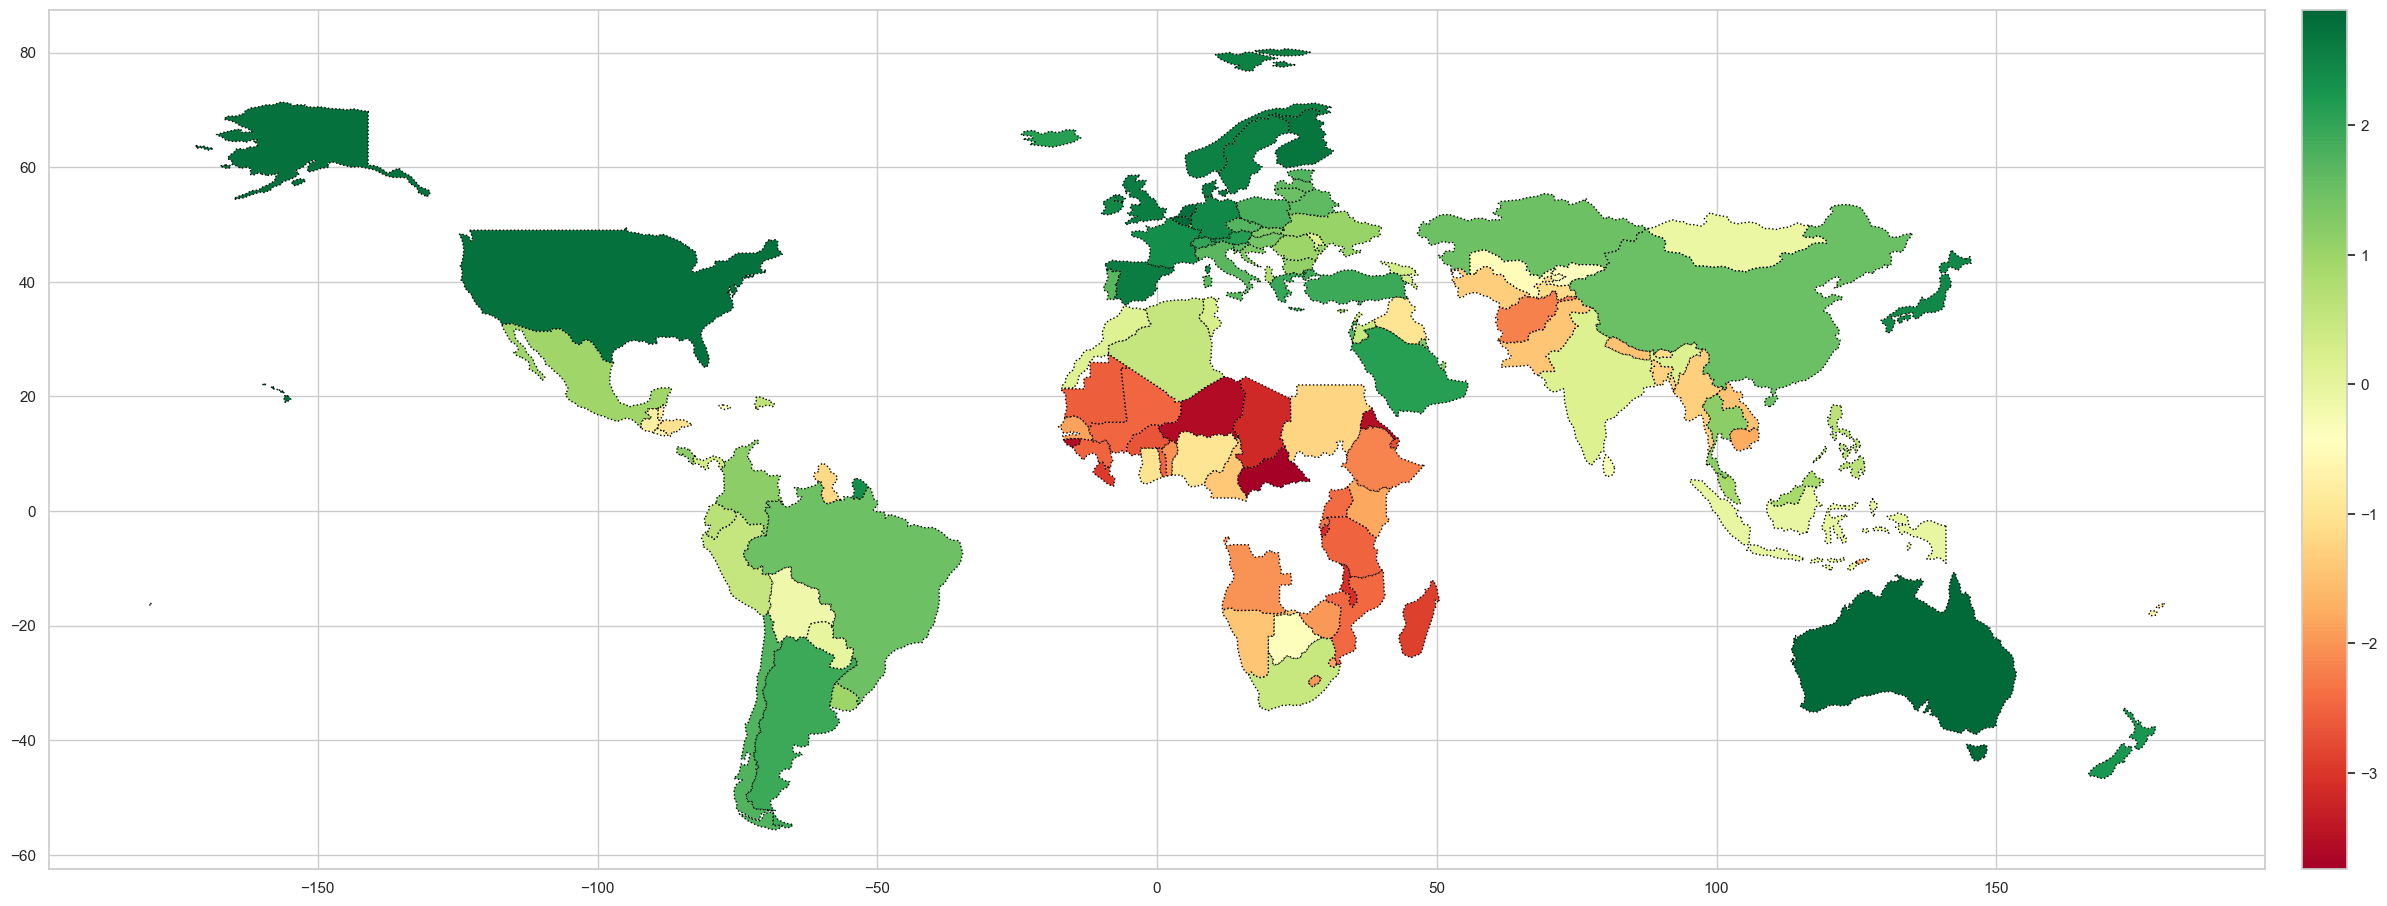

In [162]:
df_score_geo = world.merge(df_region, left_on = 'name', right_on = 'Country Name')[['geometry','Country Name','Score']]

fig, ax = plt.subplots()
fig.set_size_inches(30,18)

ax.set_facecolor('xkcd:white')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
df_score_geo.plot(column=df_score_geo['Score'], legend = True, ax=ax, cax=cax, cmap='RdYlGn',linestyle=":",edgecolor='black' )
plt.show()

**Bilan : Top 15 des pays attractifs**

In [163]:
ref_score_2015=ref_score_2015.rename(columns = {'NY.GDP.PCAP.PP.KD': 'PIB',
                                       'SE.SEC.ENRR': 'Secondaire',
                                       'SE.TER.ENRR': 'Universitaire',
                                       'SP.POP.1524.TO.UN':'Pop',
                                       'IT.NET.USER.P2': 'Internet'})
ref_score_2015.sort_values(by='Score',ascending=False).head(15)

Pop  Secondaire  Universitaire  Internet       PIB    Country Name   
14  -0.034128    1.000000       0.627389  0.777344  0.522412         Belgium  \
8    0.111453    0.641310       0.786069  0.768859  0.543407       Australia   
108  0.046767    0.615943       0.665094  0.890675  0.568670     Netherlands   
150  0.633104    0.163613       0.741121  0.592508  0.624837   United States   
52  -0.142363    0.786306       0.756173  0.800850  0.492655         Finland   
42  -0.125567    0.559686       0.710287  0.967260  0.558996         Denmark   
149  0.287379    0.523330       0.403491  0.895304  0.492149  United Kingdom   
131  0.179748    0.547440       0.779817  0.666329  0.415321           Spain   
80   0.254098    0.179067       0.813943  0.855733  0.438780     Korea, Rep.   
137 -0.049090    0.676484       0.478261  0.871956  0.561073          Sweden   
112 -0.140482    0.345820       0.645588  0.975162  0.709012          Norway   
72  -0.157791    0.519362       0.720520  0.691590  0.688461         Ireland   
56   0.308993    0.223562       0.550326  0.820793  0.544434         Germany   
76   0.372584    0.212729       0.491404  0.879491  0.480960           Japan   
53   0.283409    0.317943       0.503993  0.771170  0.480379          France   

        Score  
14   2.893017  
8    2.851098  
108  2.787149  
150  2.755184  
52   2.693621  
42   2.670662  
149  2.601654  
131  2.588654  
80   2.541621  
137  2.538684  
112  2.535101  
72   2.462142  
56   2.448108  
76   2.437168  
53   2.356894

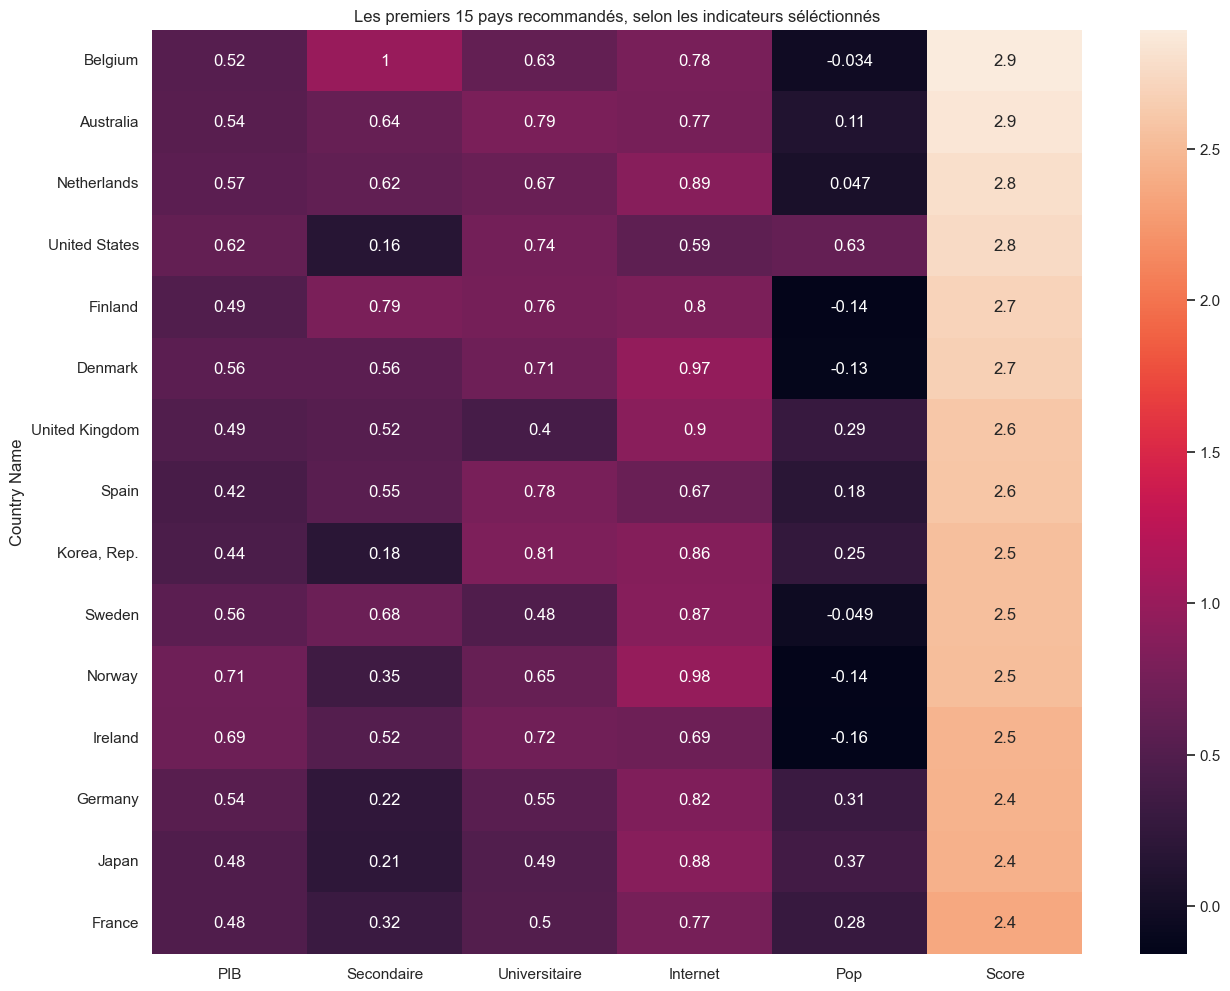

In [164]:
# Visualisons nos 15 meilleurs pays.
df_heatmap = ref_score_2015[['PIB','Secondaire','Universitaire','Internet','Pop','Score'
    ]].copy().set_index(ref_score_2015['Country Name']).sort_values(by='Score',ascending=False).head(15)

df_heatmap["sum"] = df_heatmap.sum(axis = 1)
df_heatmap = df_heatmap.sort_values(by = ['sum'], ascending = False)
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df_heatmap[0:15].drop(columns = ['sum']), annot = True)
plt.title("Les premiers 15 pays recommandés, selon les indicateurs séléctionnés")
plt.show()

## <span style='background:#c29c31'>9. Conclusion</span>

In [165]:
df_top15 = ref_score_2015[['Country Name','Score']].sort_values(by='Score',ascending=False).head(15)
df_top15['Priorité']=np.arange(1, 16, 1)
df_top15.rename(columns={'Country Name': 'Pays'}, inplace=True)
df_top15.set_index('Priorité')

Pays     Score
Priorité                          
1                Belgium  2.893017
2              Australia  2.851098
3            Netherlands  2.787149
4          United States  2.755184
5                Finland  2.693621
6                Denmark  2.670662
7         United Kingdom  2.601654
8                  Spain  2.588654
9            Korea, Rep.  2.541621
10                Sweden  2.538684
11                Norway  2.535101
12               Ireland  2.462142
13               Germany  2.448108
14                 Japan  2.437168
15                France  2.356894